In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library(repr)
library(reshape)
library(stringr)

corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [2]:
# allData = data.frame()

# for(i in seq(1, 320, 10)){
#           k <- readRDS(paste0("/home/beraslan/jovian-work/analysisSingle/ClusterInteractionsICAFactors/coefs_",i,"_",i+9,".rds"))
#           k$Leiden = rep(c("Leiden0", "Leiden1","Leiden2","Leiden3","Leiden4","Leiden5","Leiden6","Leiden7","Leiden8","Leiden9" ),
#                            each=24)
#           k$respGeneLeiden = paste0(k$respGene, "_", k$Leiden)

#           k <- k[grepl('*\\GENE_*', k$term),]
#           k = data.table(k)
#           k[,FDR:=p.adjust(p.value),by=respGene]
        
#          # for(elem in unique(k$respGene)){
#          #    k[k$respGene == elem, "FDR"] = k$FDR <- p.adjust(k[k$respGene == elem, "p.value"])
#          #  }
          
#           allData <- rbind(allData, k)
# }

# saveRDS(allData, "/home/beraslan/jovian-work/analysisSingle/ClusterInteractionsICAFactors/AllCoefsCombined_FDR.rds")

In [4]:
cGuides = data.frame(read.csv('/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_leiden_6_Modules.csv'),
                     stringsAsFactors = FALSE, row.names = 1)
#cGuides = cGuides[order(cGenes$GeneGroup),]
colnames(cGuides) <- c("KOGeneName", "GuideGroup","GuideColor")
cGuides$GuideGroup <- factor(cGuides$GuideGroup, levels=unique(cGuides$GuideGroup))

head(cGuides)

,KOGeneName,GuideGroup,GuideColor
,<fct>,<fct>,<fct>
Aamp,Aamp,4,#aa40fc
Bop1,Bop1,4,#aa40fc
Cirh1a,Cirh1a,4,#aa40fc
Dcaf13,Dcaf13,4,#aa40fc
Grb2,Grb2,4,#aa40fc
Myc,Myc,4,#aa40fc


In [5]:
unique(cGuides$GuideGroup)

[1] 4 0 1 5 3 2
Levels: 4 0 1 5 3 2

In [6]:
allData <- data.frame(readRDS("/home/beraslan/jovian-work/analysisSingle/ClusterInteractionsICAFactors/AllCoefsCombined_FDR.rds"))
allData <- unique(allData)
head(allData)

,term,estimate,std.error,statistic,p.value,respGene,Leiden,respGeneLeiden,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,GENE_Aamp_,-0.14142699,0.03875514,-3.6492445,2.650971e-04,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,3.101636e-02
2,GENE_Bop1_,-0.05902007,0.02522645,-2.3396109,1.933427e-02,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,1.000000e+00
3,GENE_Cirh1a_,-0.11158546,0.02839550,-3.9296885,8.594757e-05,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,1.063162e-02
4,GENE_Dcaf13_,-0.13150961,0.02564156,-5.1287675,3.001762e-07,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,4.262501e-05
5,GENE_Grb2_,-0.02353720,0.03176018,-0.7410916,4.586649e-01,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,1.000000e+00
6,GENE_Myc_,-0.29696762,0.03221565,-9.2181159,4.019658e-20,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,7.034401e-18


In [7]:
rownames(allData) = paste0(allData$term,"_",allData$respGeneLeiden)

In [8]:
head(allData)

,term,estimate,std.error,statistic,p.value,respGene,Leiden,respGeneLeiden,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
GENE_Aamp__Factor1genegroup1_Leiden0,GENE_Aamp_,-0.14142699,0.03875514,-3.6492445,2.650971e-04,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,3.101636e-02
GENE_Bop1__Factor1genegroup1_Leiden0,GENE_Bop1_,-0.05902007,0.02522645,-2.3396109,1.933427e-02,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,1.000000e+00
GENE_Cirh1a__Factor1genegroup1_Leiden0,GENE_Cirh1a_,-0.11158546,0.02839550,-3.9296885,8.594757e-05,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,1.063162e-02
GENE_Dcaf13__Factor1genegroup1_Leiden0,GENE_Dcaf13_,-0.13150961,0.02564156,-5.1287675,3.001762e-07,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,4.262501e-05
GENE_Grb2__Factor1genegroup1_Leiden0,GENE_Grb2_,-0.02353720,0.03176018,-0.7410916,4.586649e-01,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,1.000000e+00
GENE_Myc__Factor1genegroup1_Leiden0,GENE_Myc_,-0.29696762,0.03221565,-9.2181159,4.019658e-20,Factor1genegroup1,Leiden0,Factor1genegroup1_Leiden0,7.034401e-18


In [9]:
## Get the computed interaction terms
interactionTerms <- allData[grepl('*\\:Leiden*', allData$term),]
#interactionTerms <- interactionTerms[interactionTerms$FDR < 0.15,]
interactionTerms$KOGene <- sapply(interactionTerms$term, function(x){strsplit(x, ":")[[1]][1]})
interactionTerms$Cluster <- sapply(interactionTerms$term, function(x){strsplit(x, ":")[[1]][2]})


In [12]:
interactionTerms = interactionTerms[!is.na(interactionTerms$estimate),]
sgnInteractionTerms = interactionTerms[interactionTerms$p.value < 0.01,]

In [13]:
dim(sgnInteractionTerms)

[1] 2184   11

In [14]:
sgnInteractionTerms$GeneName = sapply(sgnInteractionTerms$KOGene, function(x){strsplit(x,"_")[[1]][2]})
sgnInteractionTerms$respGeneAn = sapply(sgnInteractionTerms$respGene, function(x){str_replace(x, "genegroup","_")})
sgnInteractionTerms$Factor = sapply(sgnInteractionTerms$respGeneAn, function(x){strsplit(x,"_")[[1]][1]})

In [ ]:
# options(repr.plot.width=20, repr.plot.height=10)

# sgnInteractionTermsSplitCluster = split(sgnInteractionTerms, f = sgnInteractionTerms$Cluster)

# for(i in 1:length(sgnInteractionTermsSplitCluster)){
#     elem = sgnInteractionTermsSplitCluster[[i]]

#     myDat = data.frame(matrix(0, ncol=length(unique(elem$GeneName)),
#                               nrow=length(unique(elem$respGeneAn))),
#                        stringsAsFactors = FALSE)

#     colnames(myDat) = unique(elem$GeneName)
#     rownames(myDat) = unique(elem$respGeneAn)

#     for(j in 1:nrow(elem)){
#         myDat[elem[j, "respGeneAn"],elem[j, "GeneName"]] = elem[j, "estimate"]

#     }

#     myDat[myDat > 0.2] = 0.2
#     myDat[myDat < -0.2] = -0.2

#     pheatmap(myDat, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(200),
#                  clustering_method = "ward.D", clsuter_rows=FALSE,treeheight_col = 0, treeheight_row = 0,fontsize = 15,
#                 main=names(sgnInteractionTermsSplitCluster)[[i]])



# }


In [ ]:
# options(repr.plot.width=20, repr.plot.height=10)

# sgnInteractionTermsSplitFactor = split(sgnInteractionTerms, f = sgnInteractionTerms$Factor)

# for(i in 1:length(sgnInteractionTermsSplitFactor)){
#     elem = sgnInteractionTermsSplitFactor[[i]]
    
#     elemSplitCluster = split(elem, f = elem$Cluster)

#     for(k in 1:length(elemSplitCluster)){
#         clusterElem = elemSplitCluster[[k]]
        
#         if(length(unique(clusterElem$GeneName)) > 4){
            
#             myDat = data.frame(matrix(0, ncol=length(unique(clusterElem$GeneName)),
#                               nrow=length(unique(clusterElem$respGeneAn))),
#             stringsAsFactors = FALSE)

#             colnames(myDat) = unique(clusterElem$GeneName)
#             rownames(myDat) = unique(clusterElem$respGeneAn)

#             for(j in 1:nrow(clusterElem)){
#                 myDat[clusterElem[j, "respGeneAn"],clusterElem[j, "GeneName"]] = clusterElem[j, "estimate"]

#             }

#             myDat[myDat > 0.15] = 0.15
#             myDat[myDat < -0.15] = -0.15

#             tryCatch(
#                 expr = {
#                        pheatmap(myDat, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(200),
#                          clustering_method = "ward.D", cluster_rows=FALSE,treeheight_col = 0, treeheight_row = 0,fontsize = 15,
#                         main=paste0(names(sgnInteractionTermsSplitFactor)[[i]], "  ", names(elemSplitCluster)[[k]]))
#                 },
#                 error = function(e){ 
#                     print(e)
#                 },
#                 finally = {
#                     # (Optional)
#                     # Do this at the end before quitting the tryCatch structure...
#                 }
#             ) 
            
#         }
    
#     }
 


# }

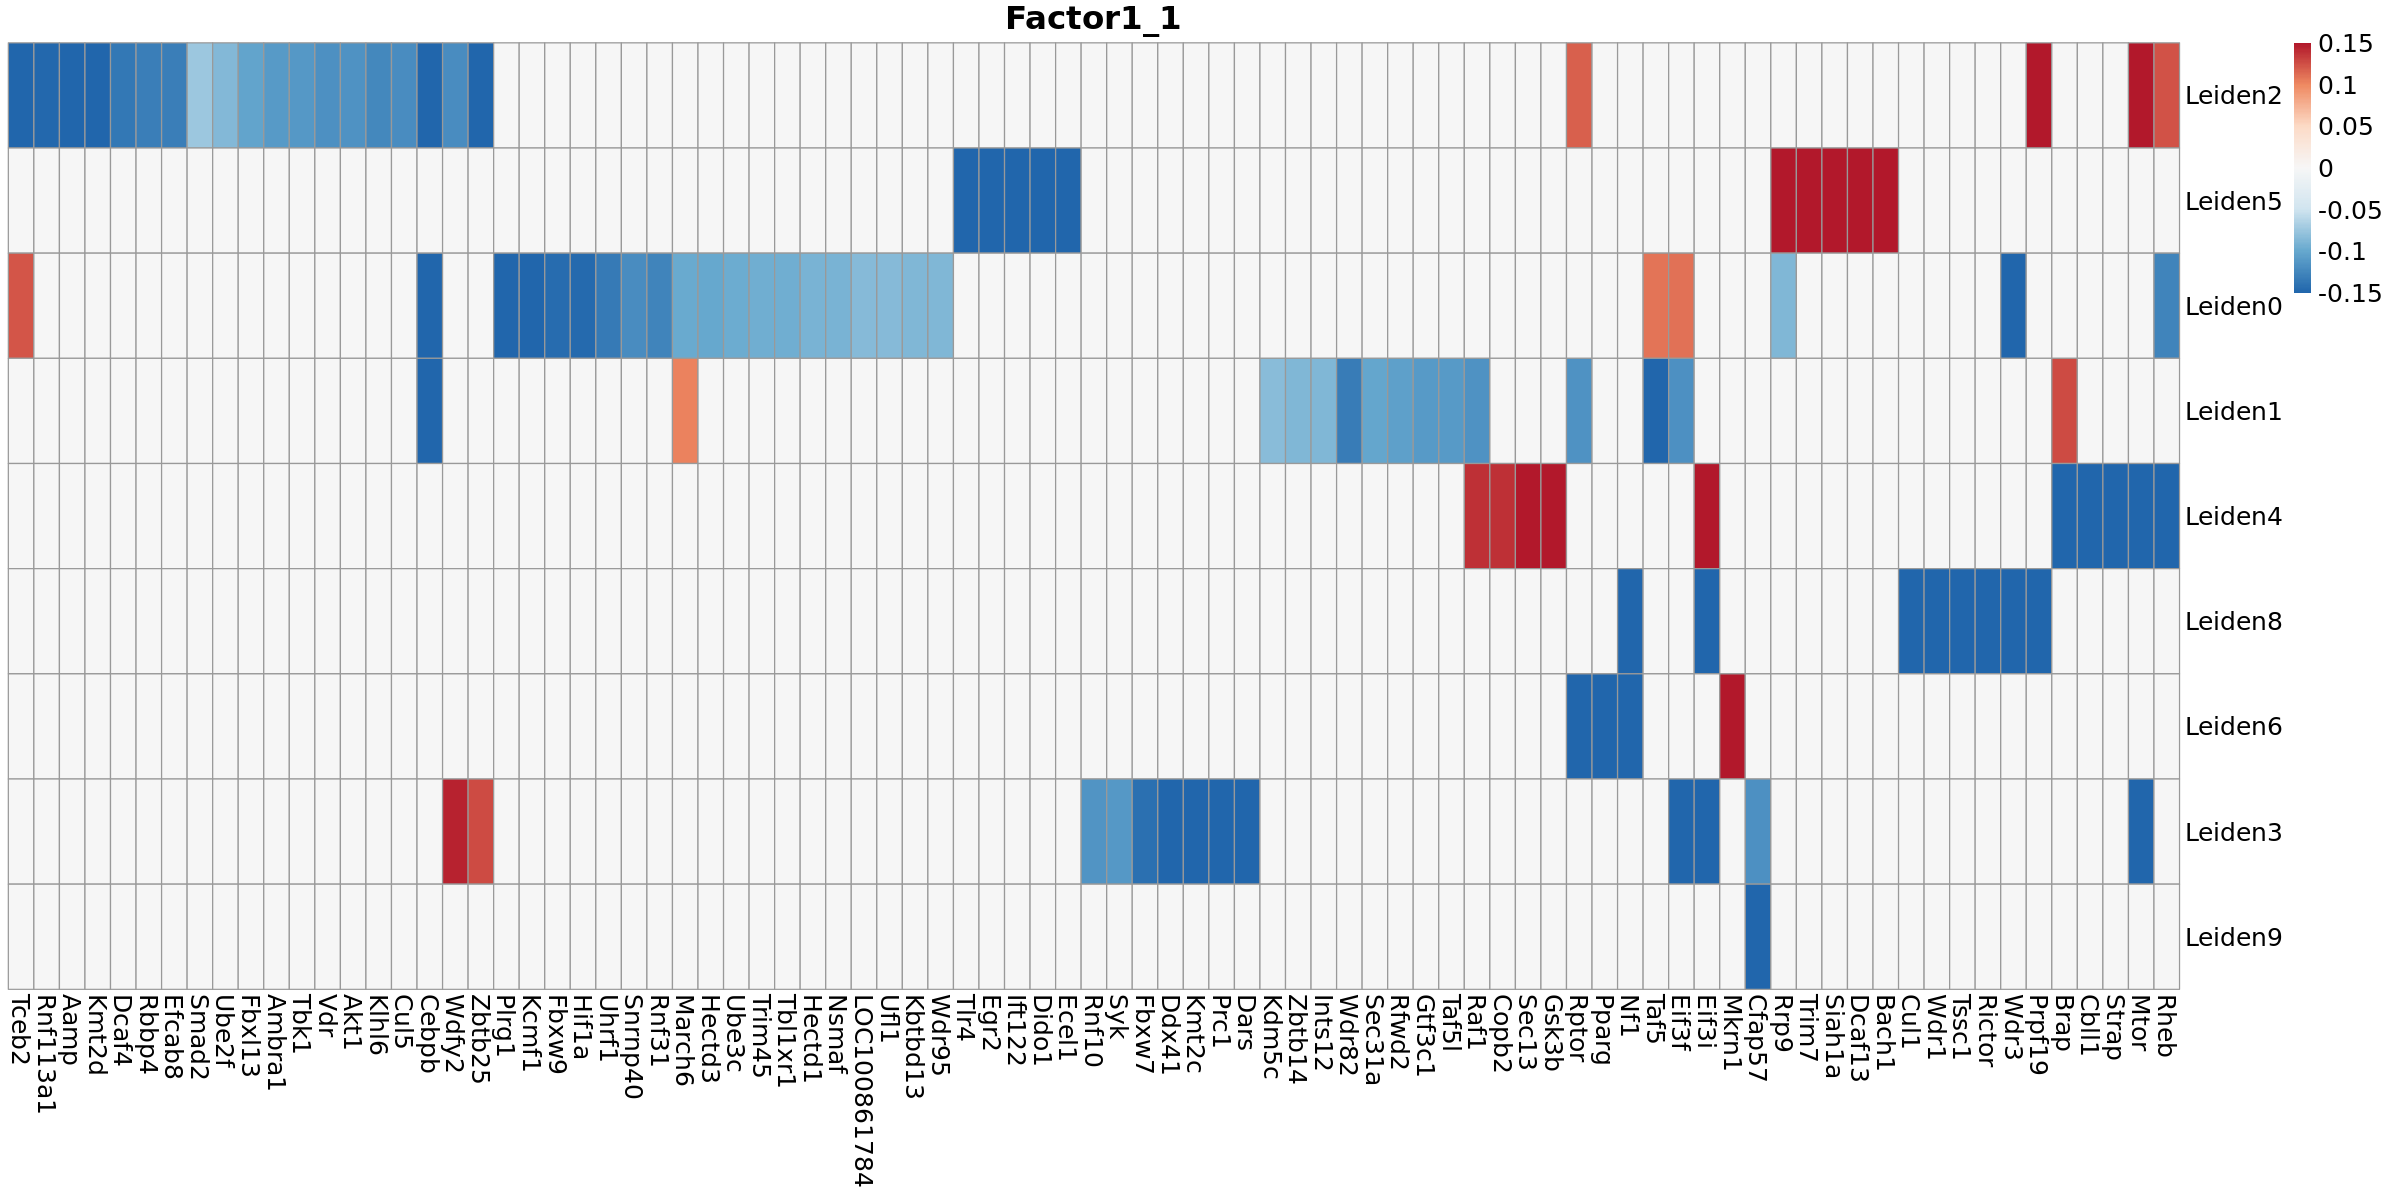

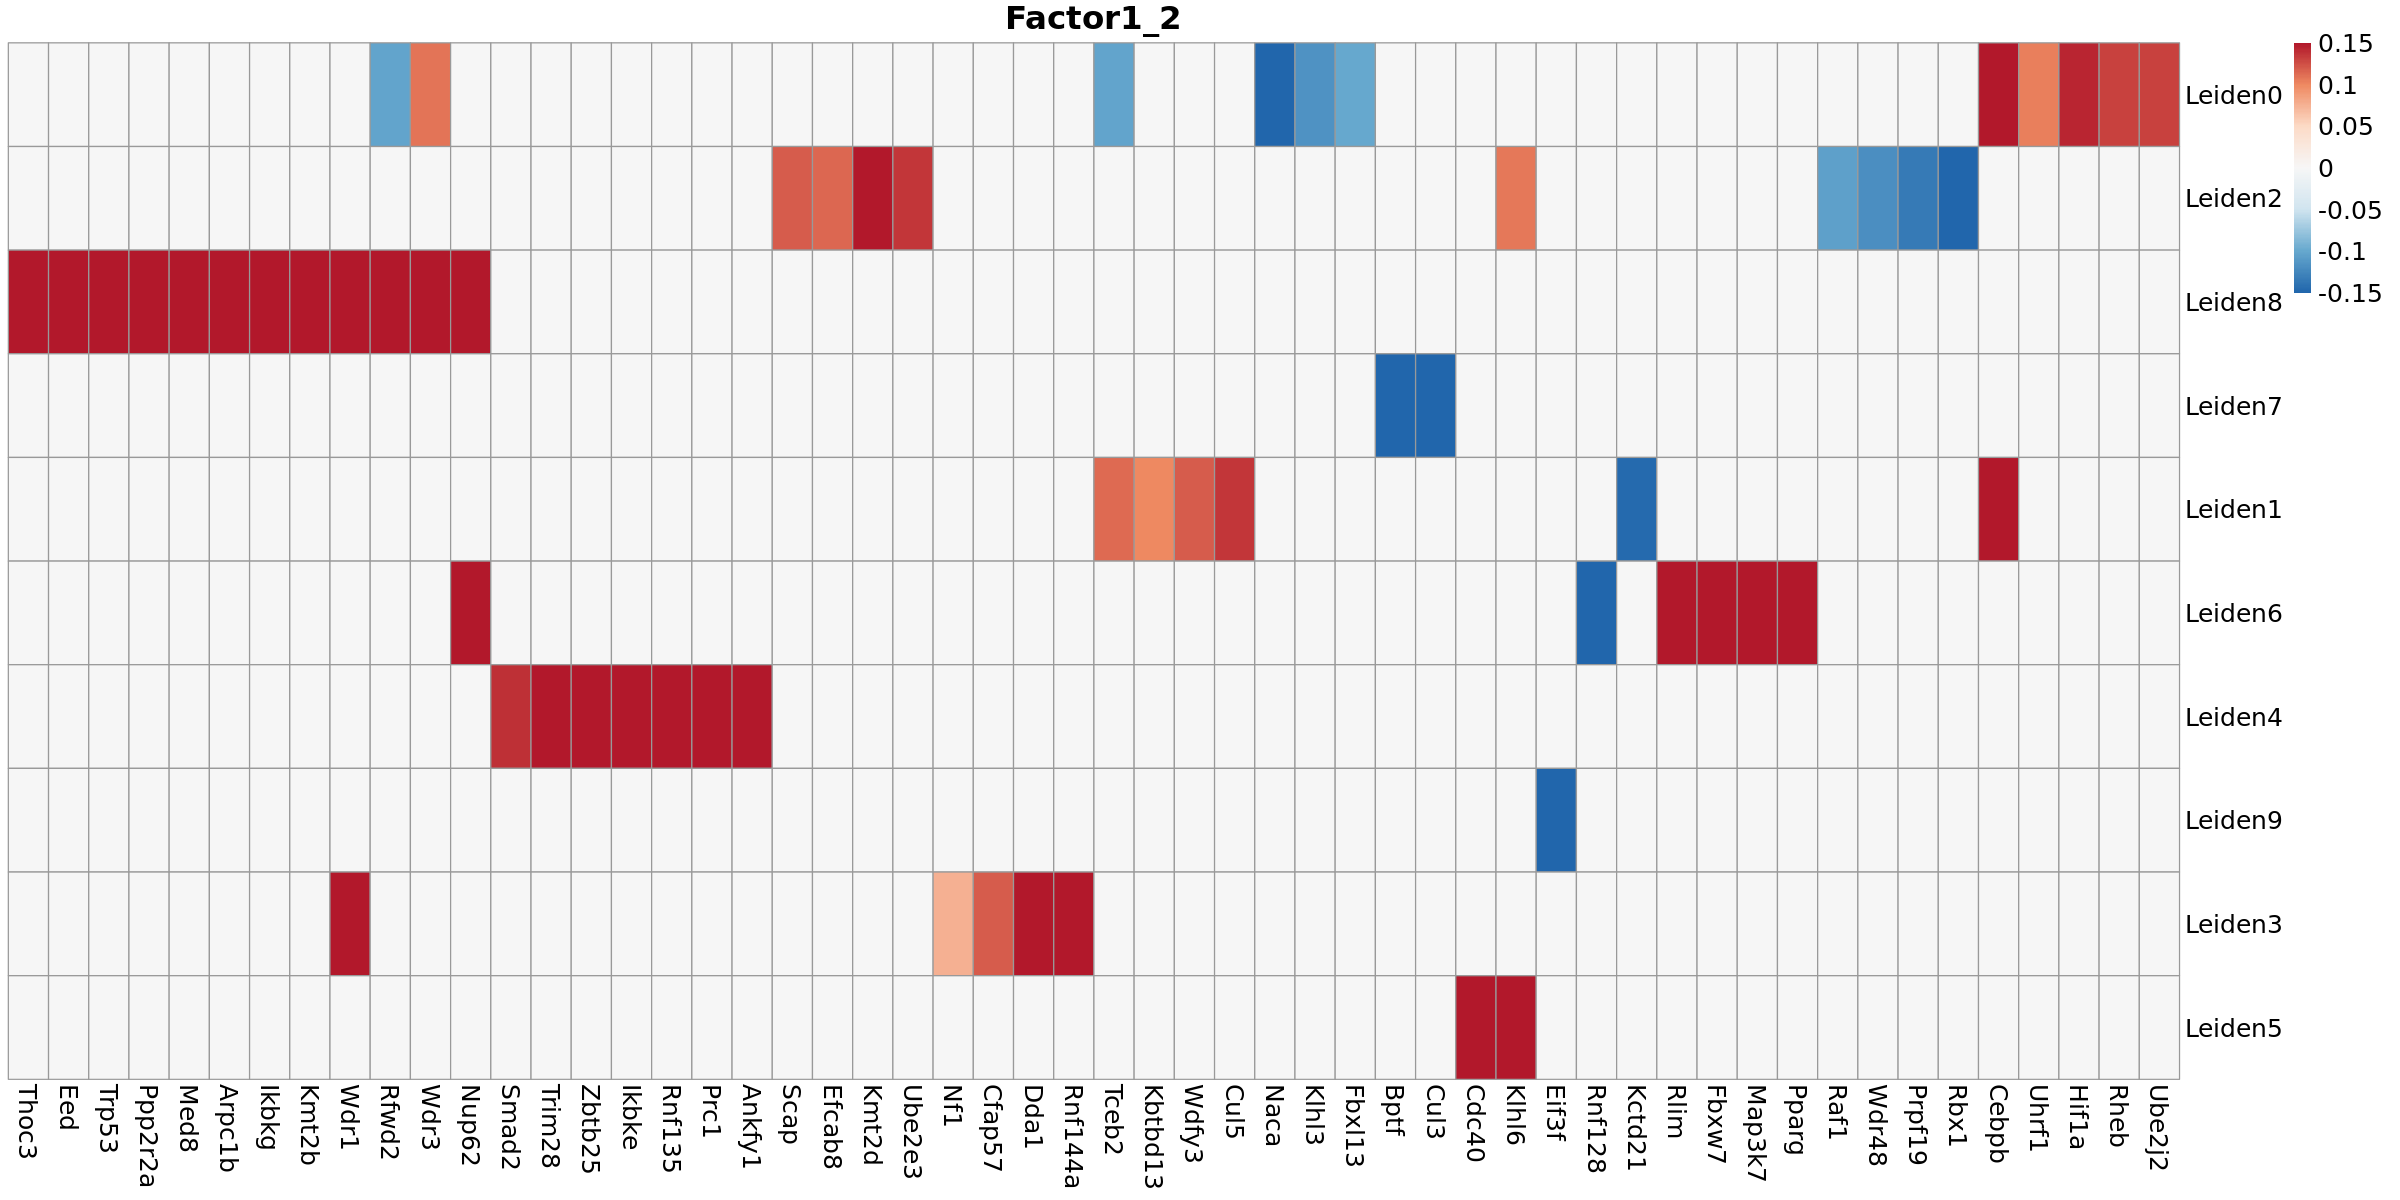

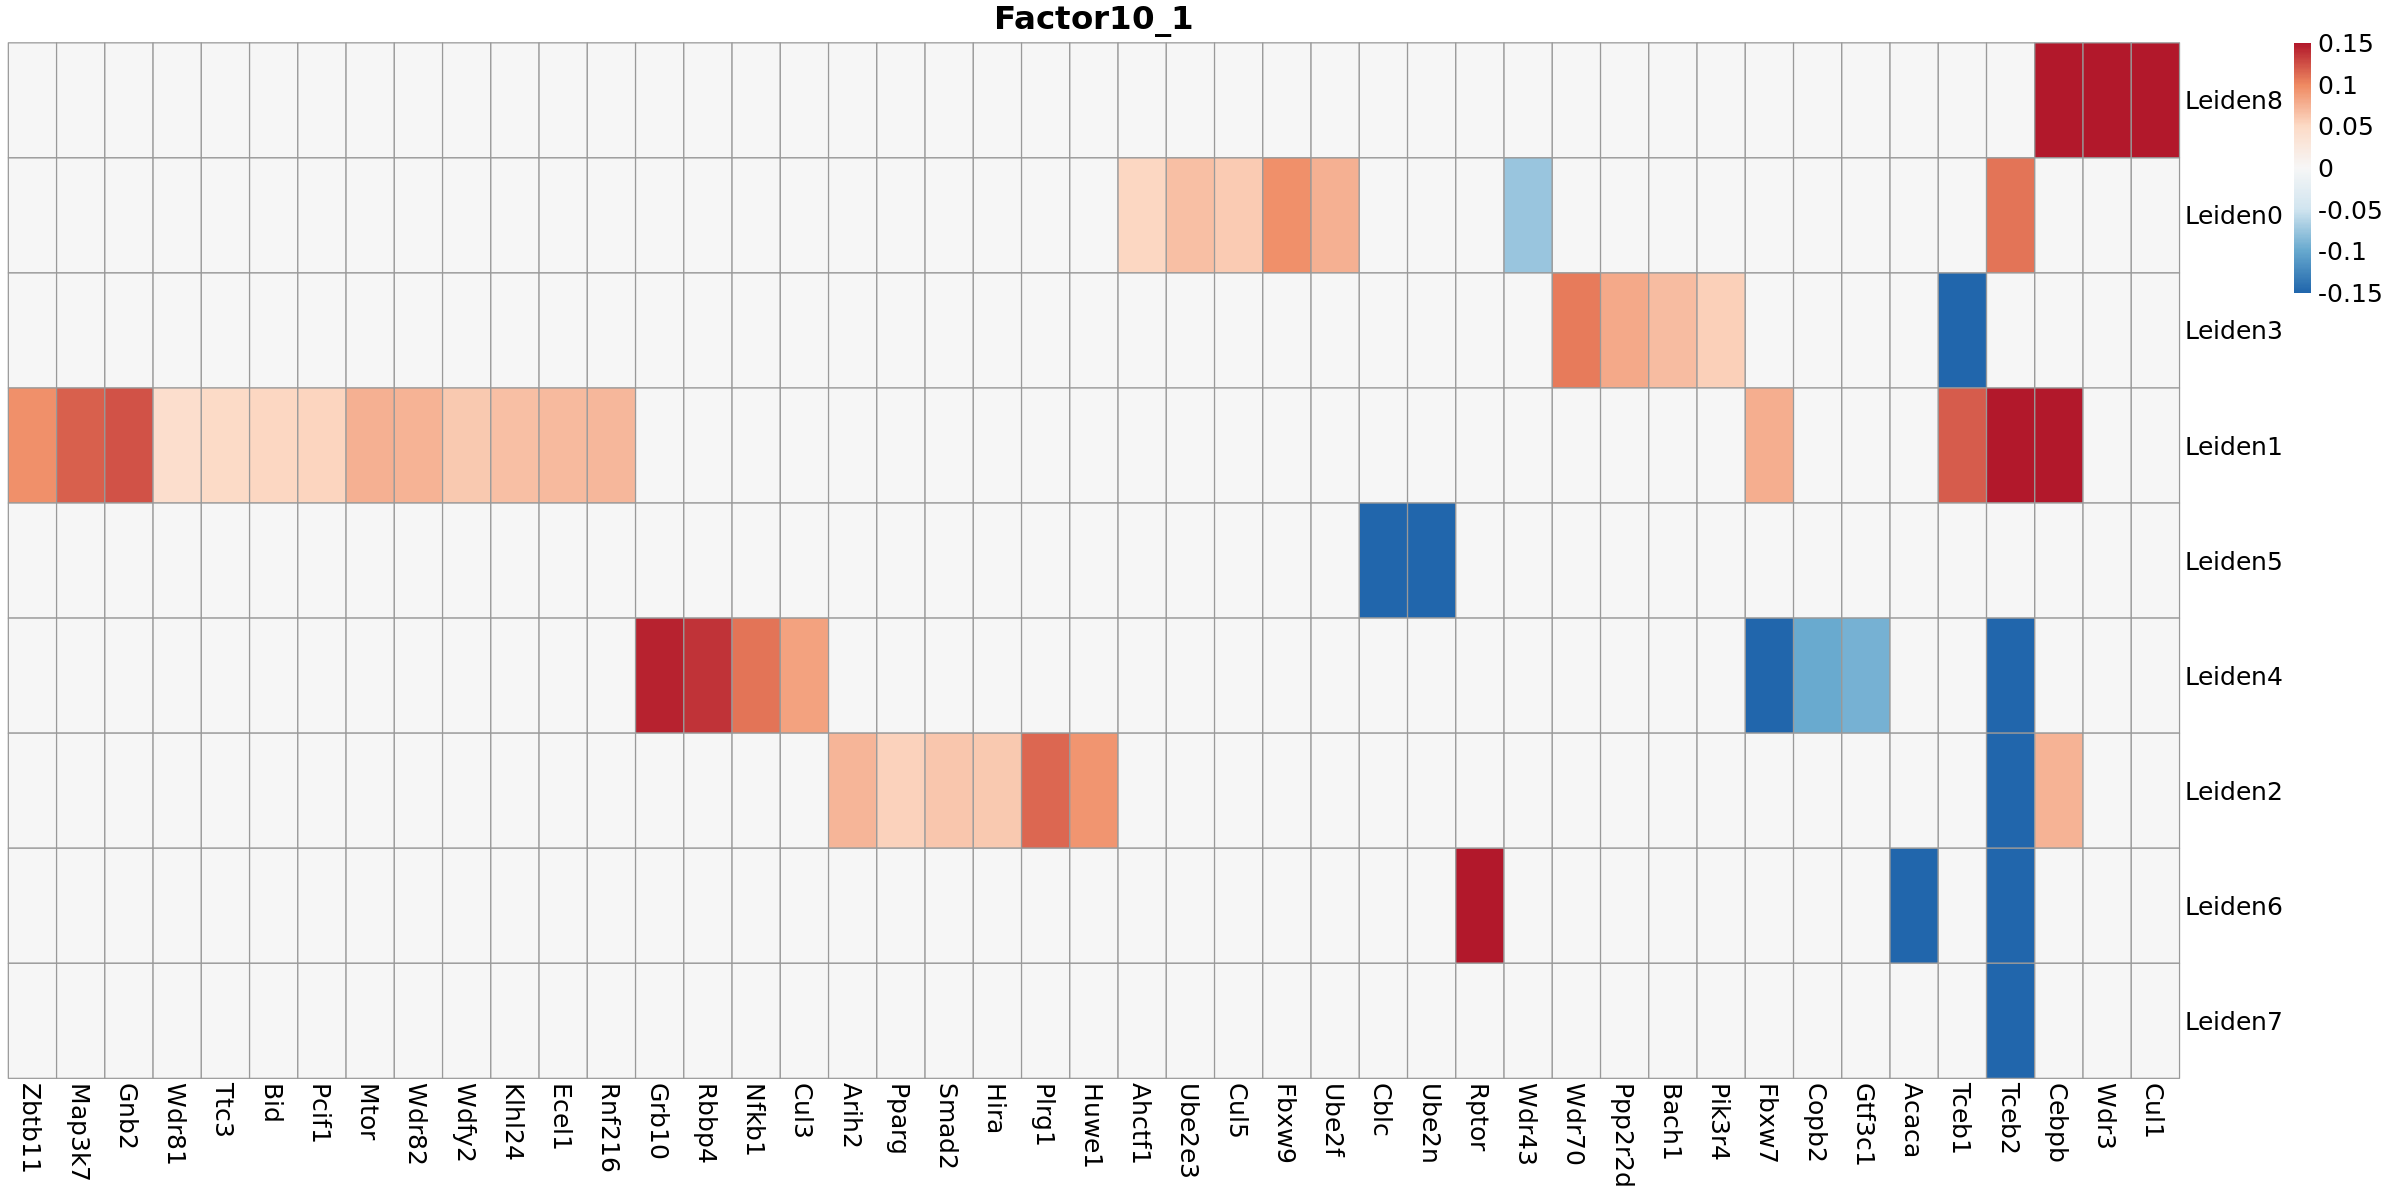

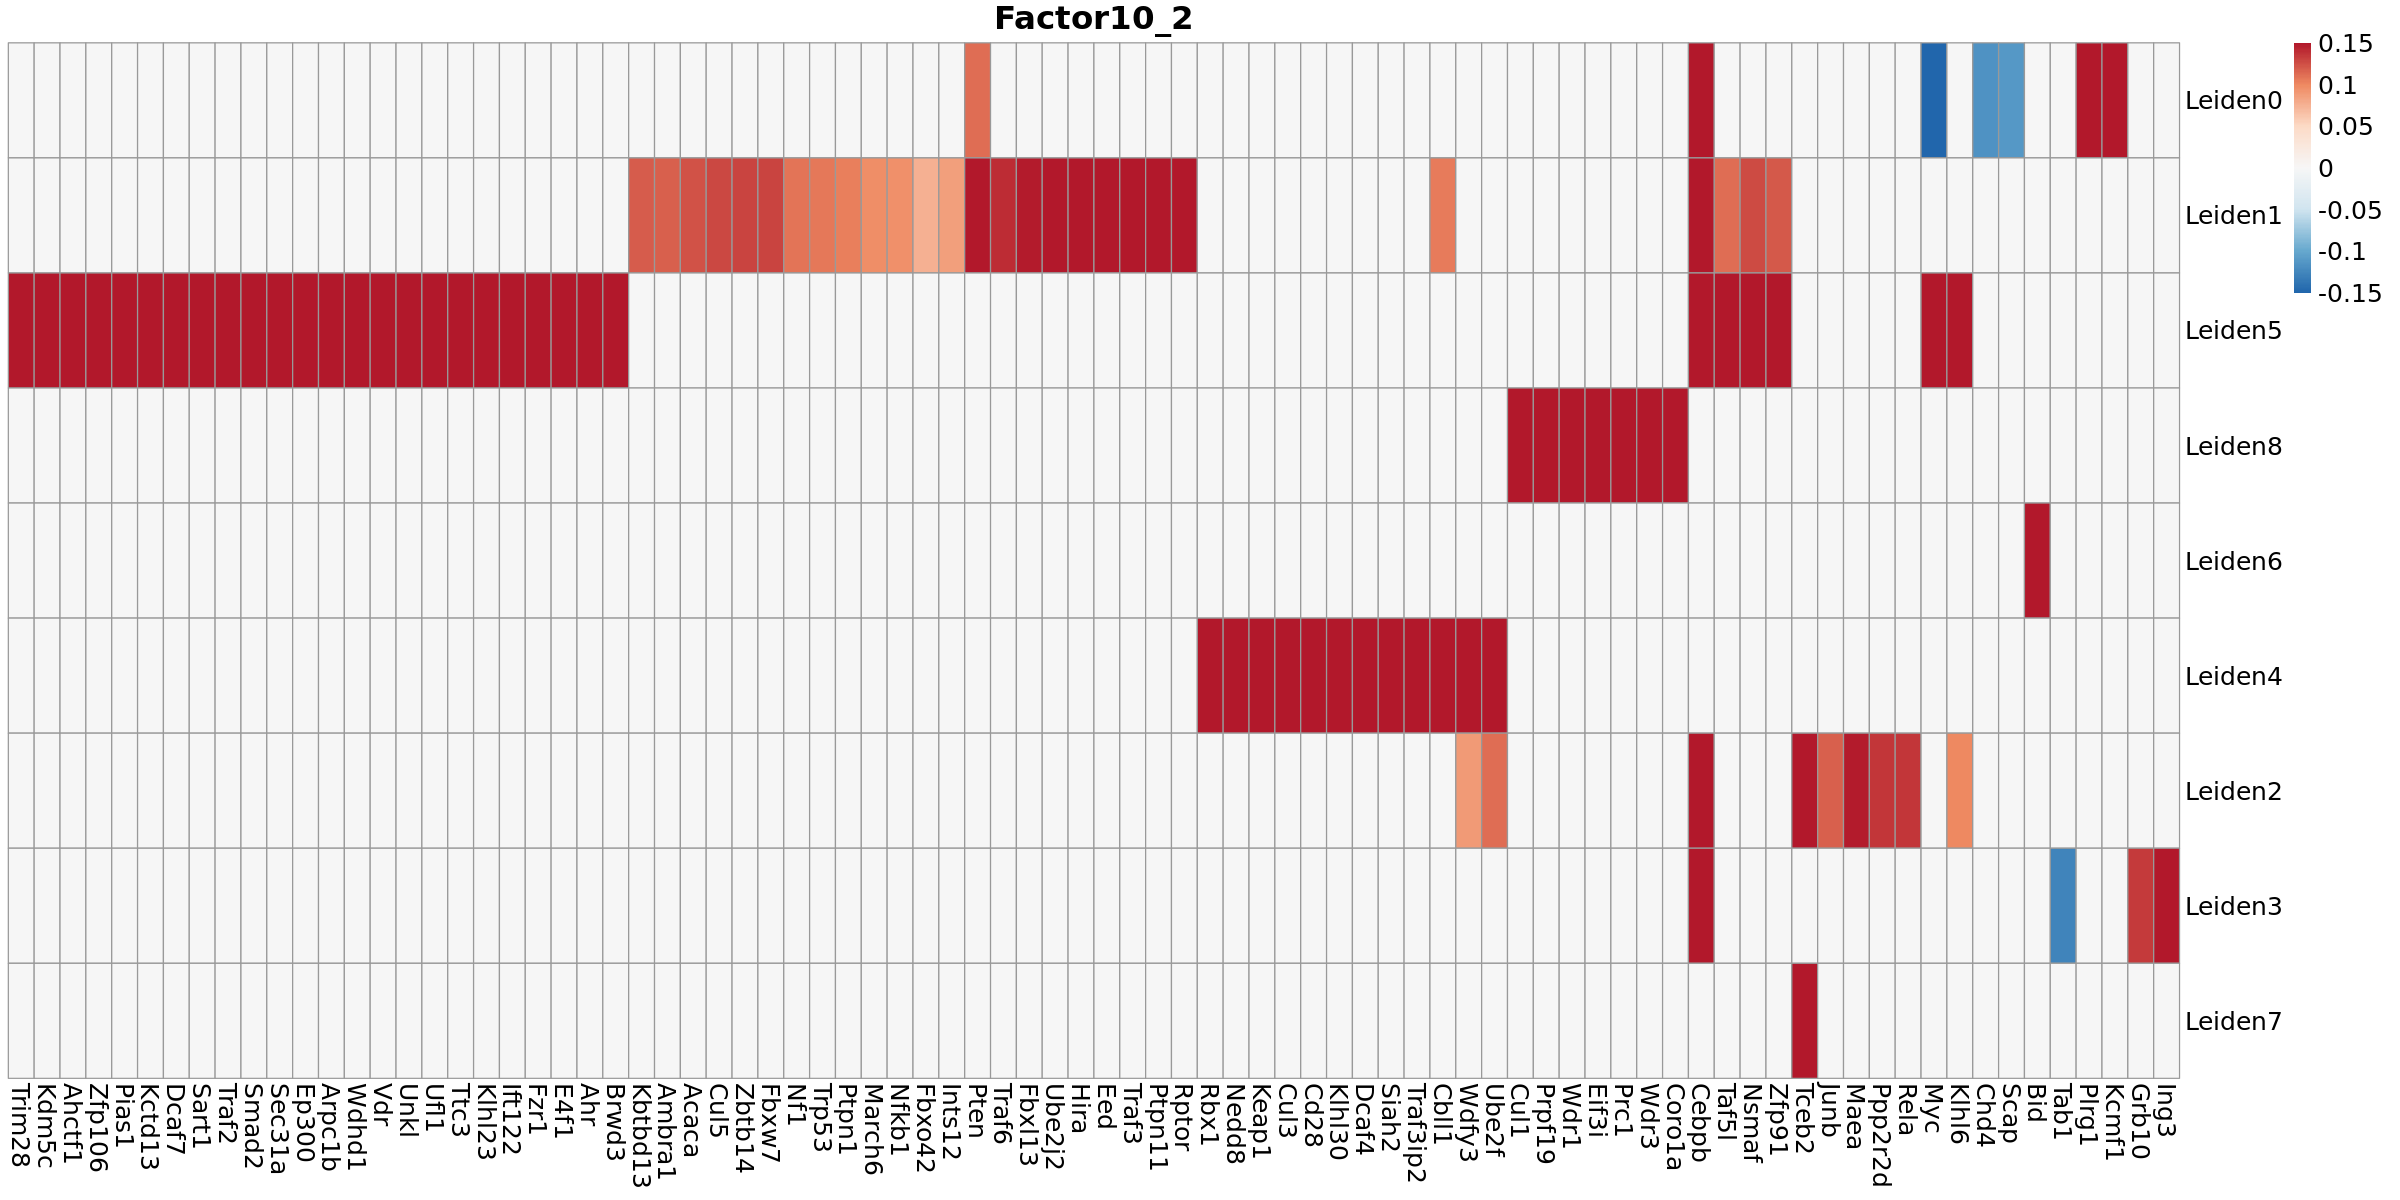

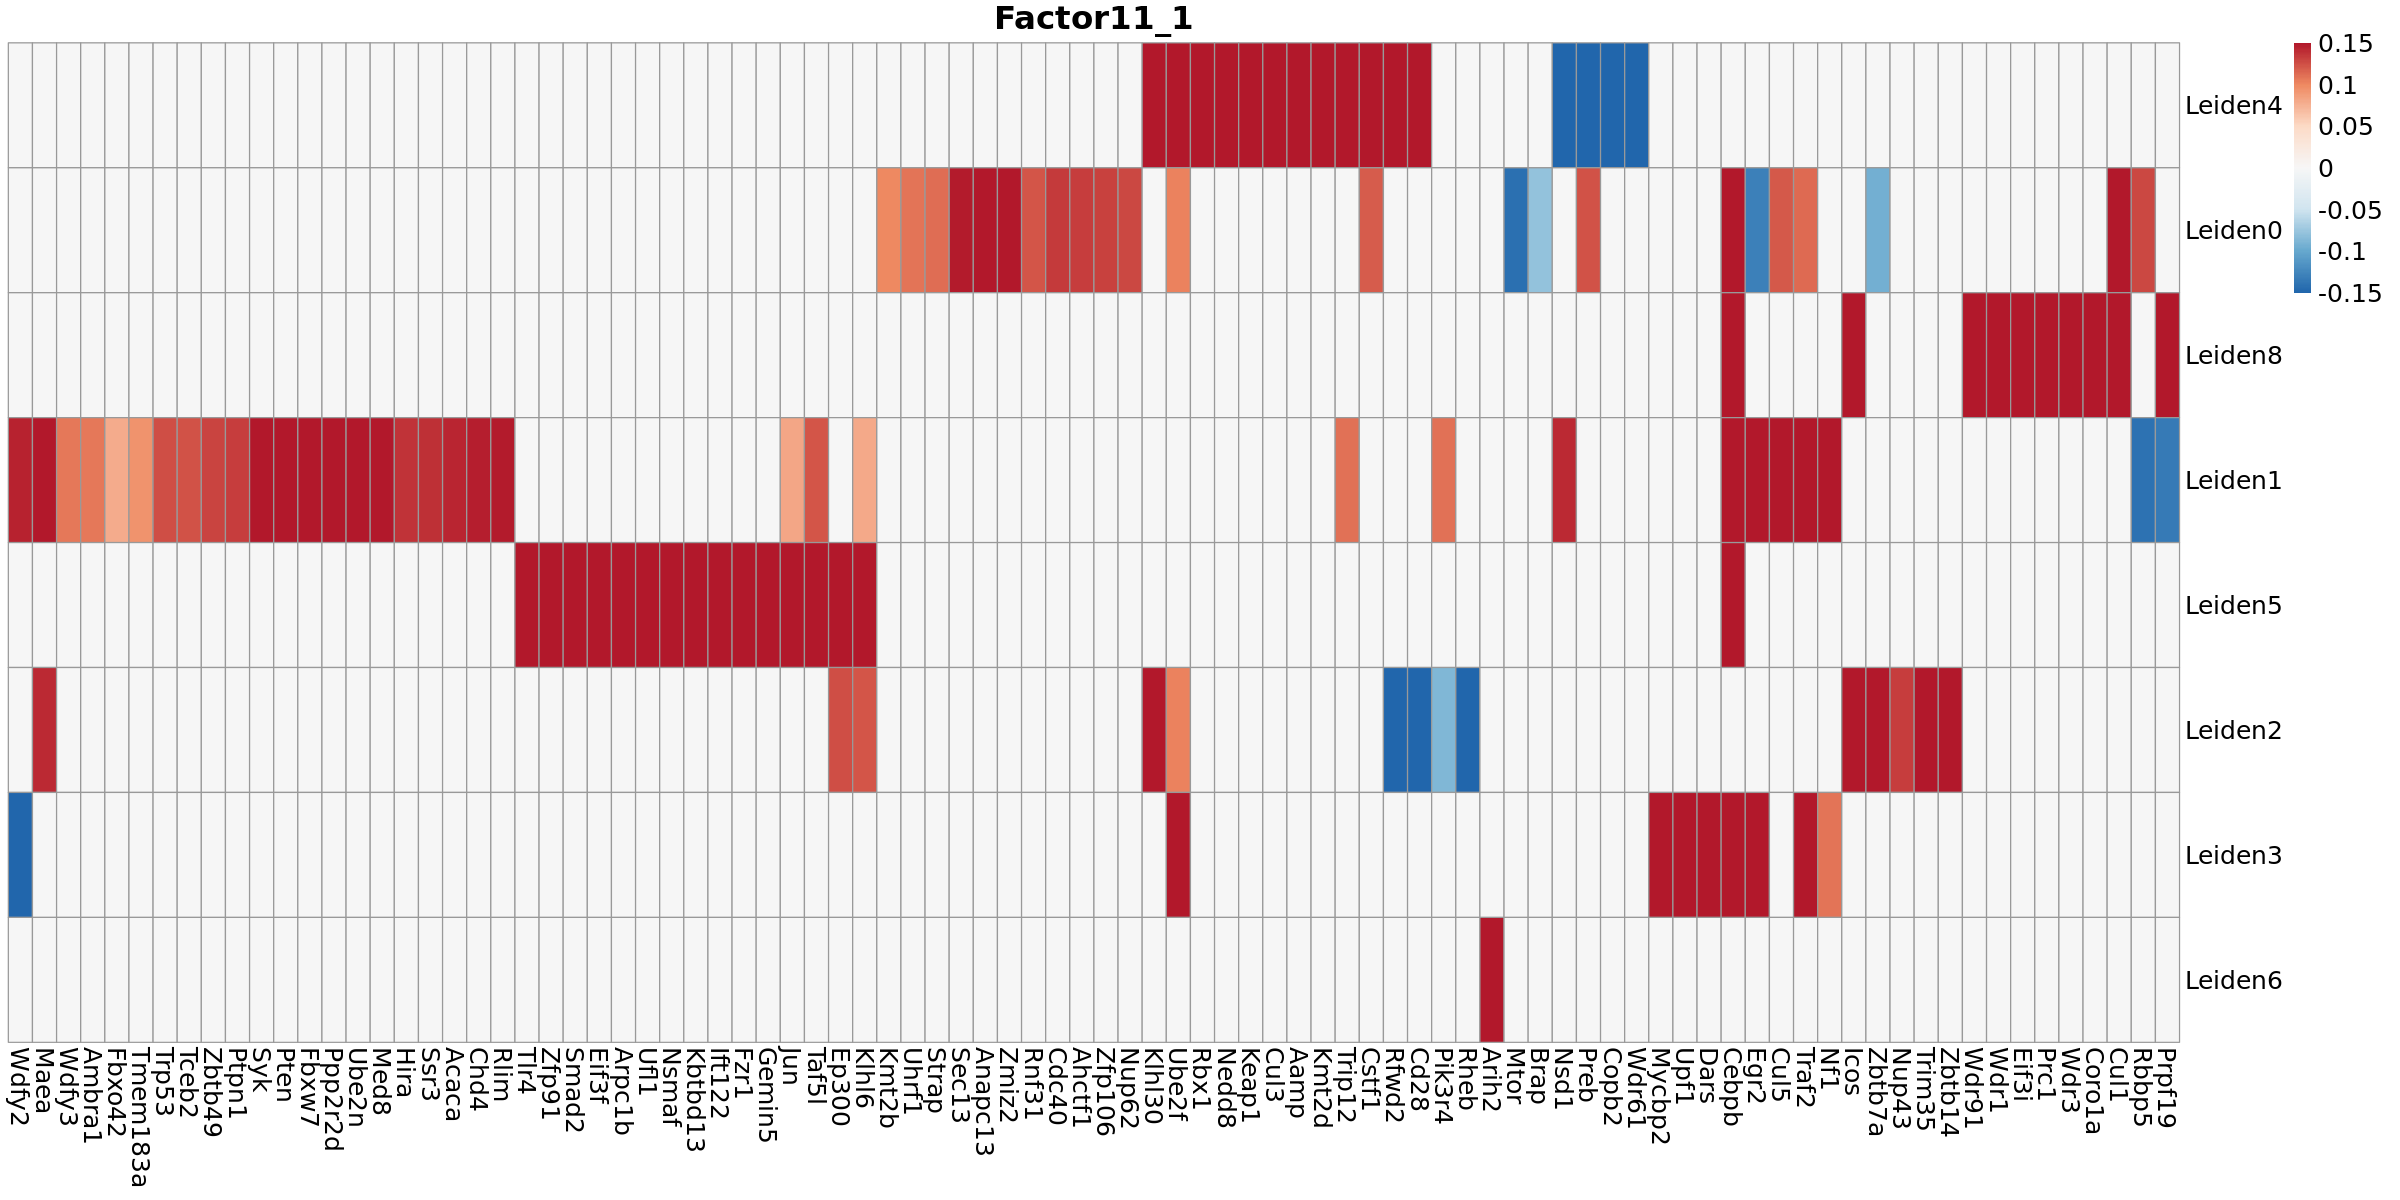

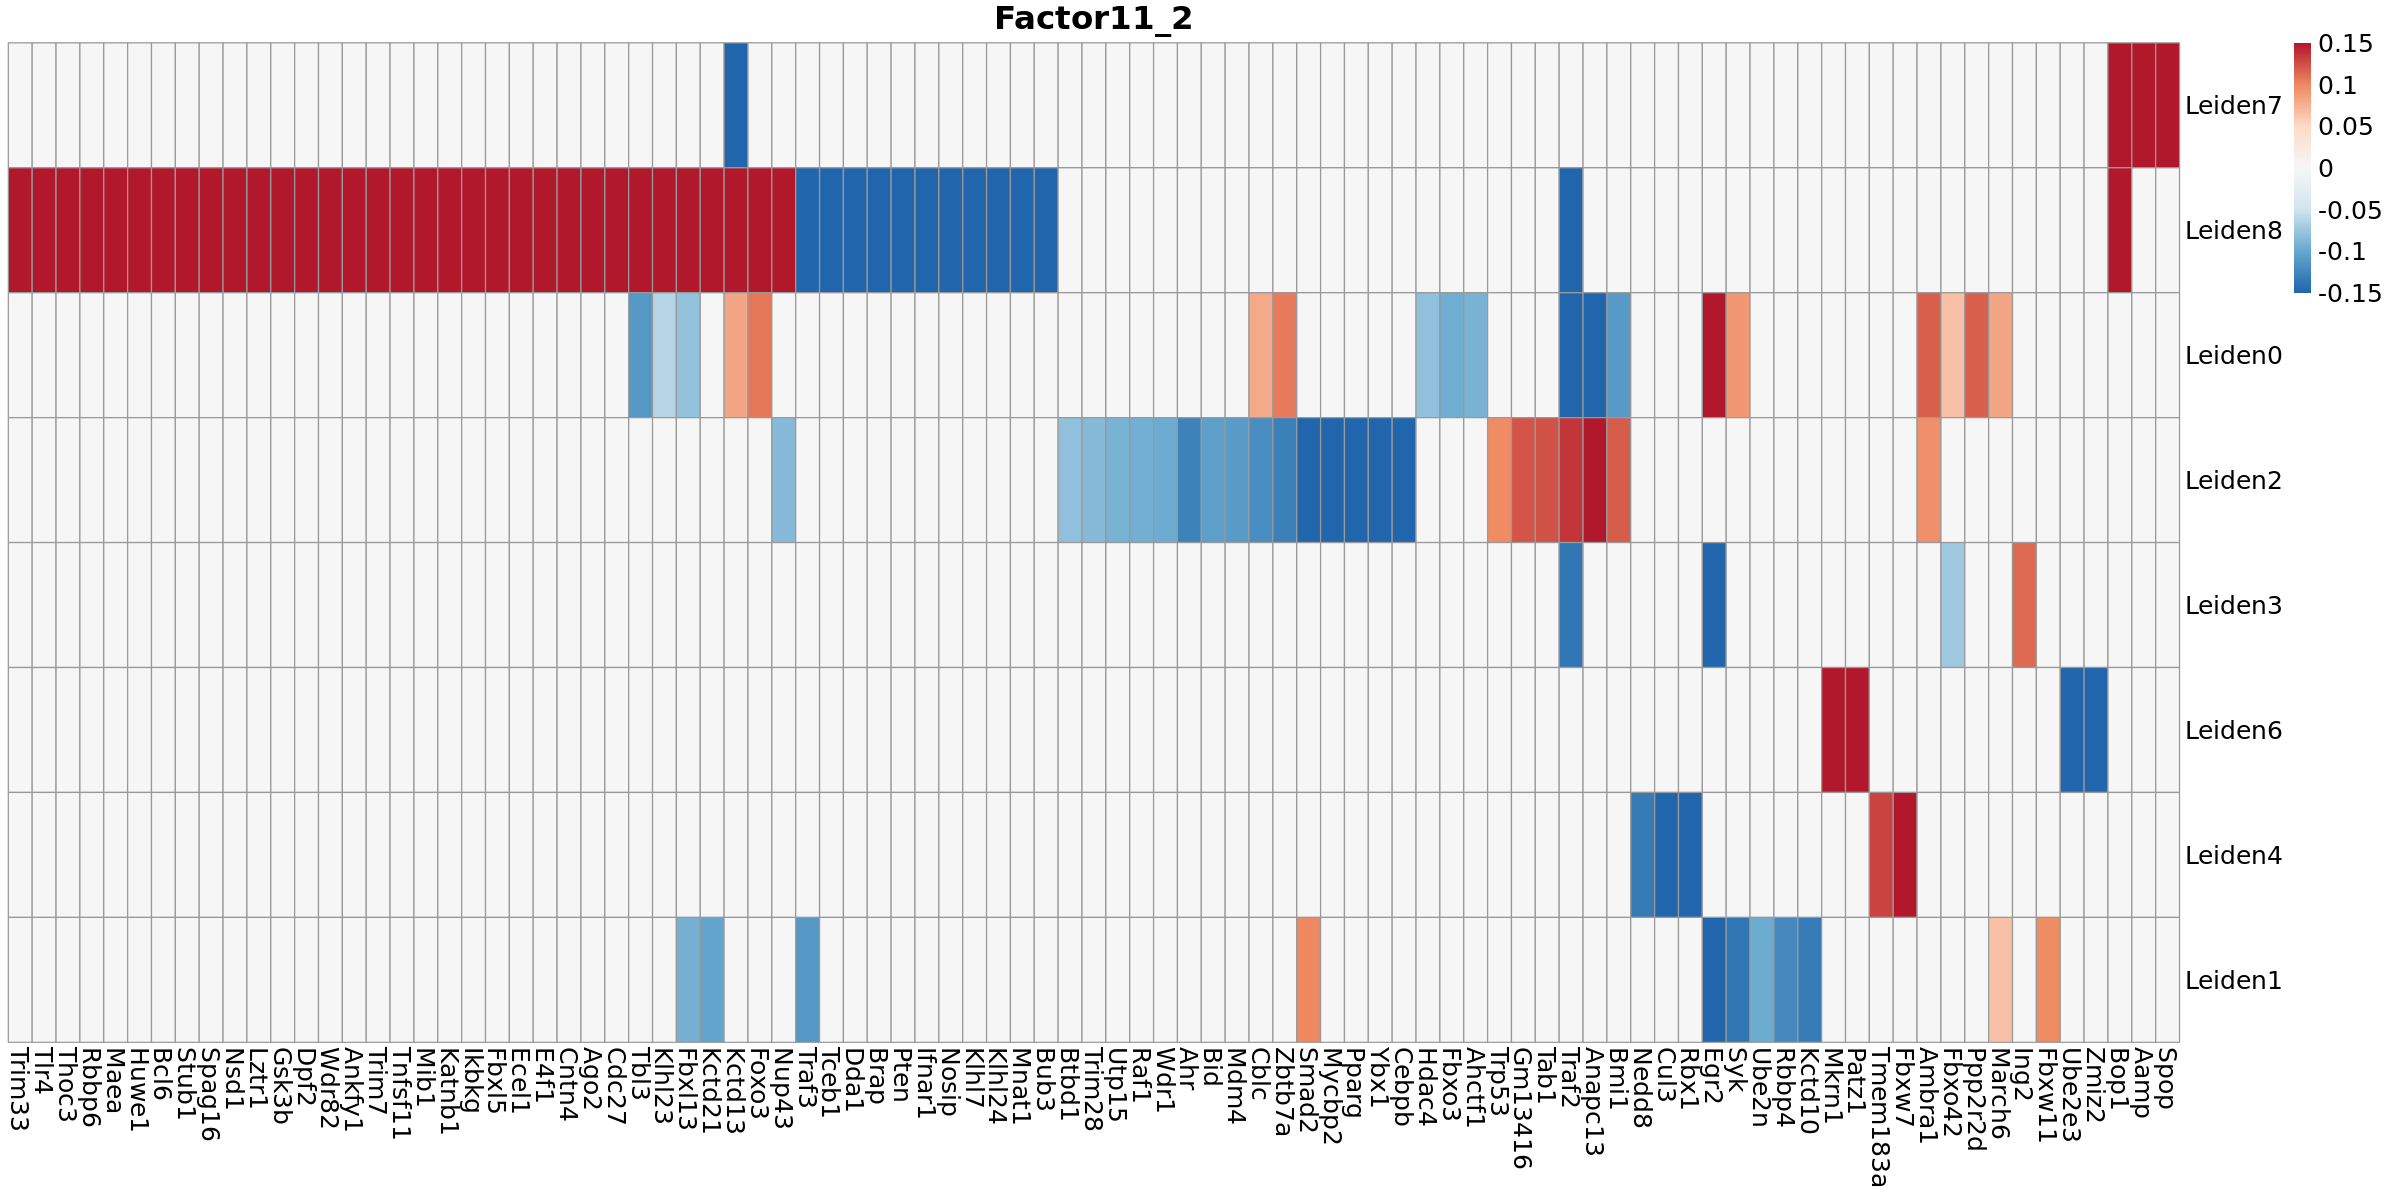

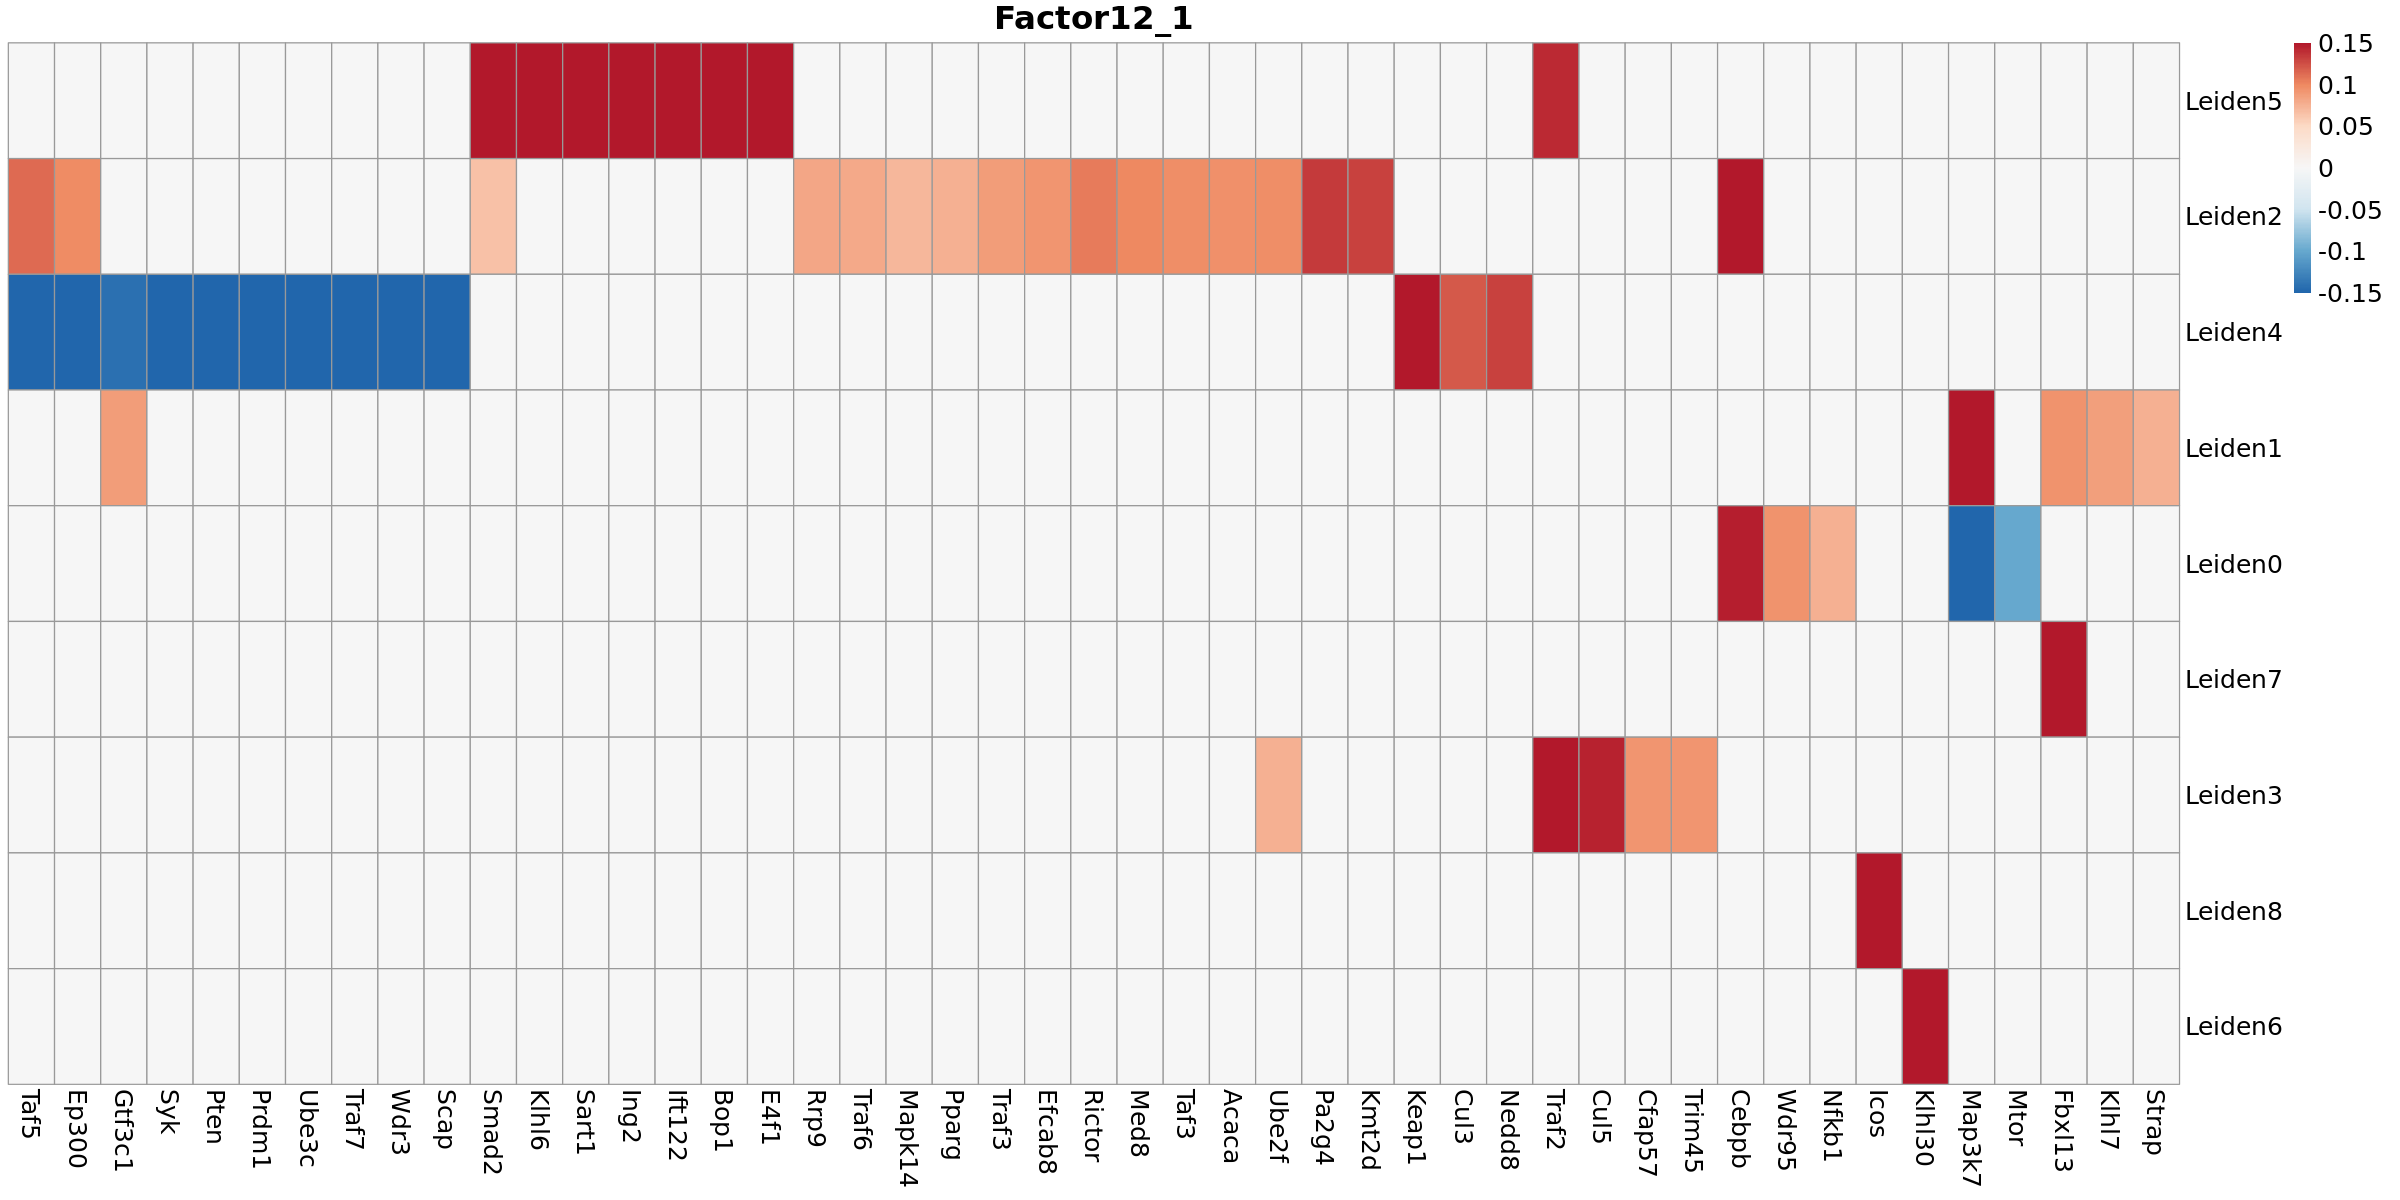

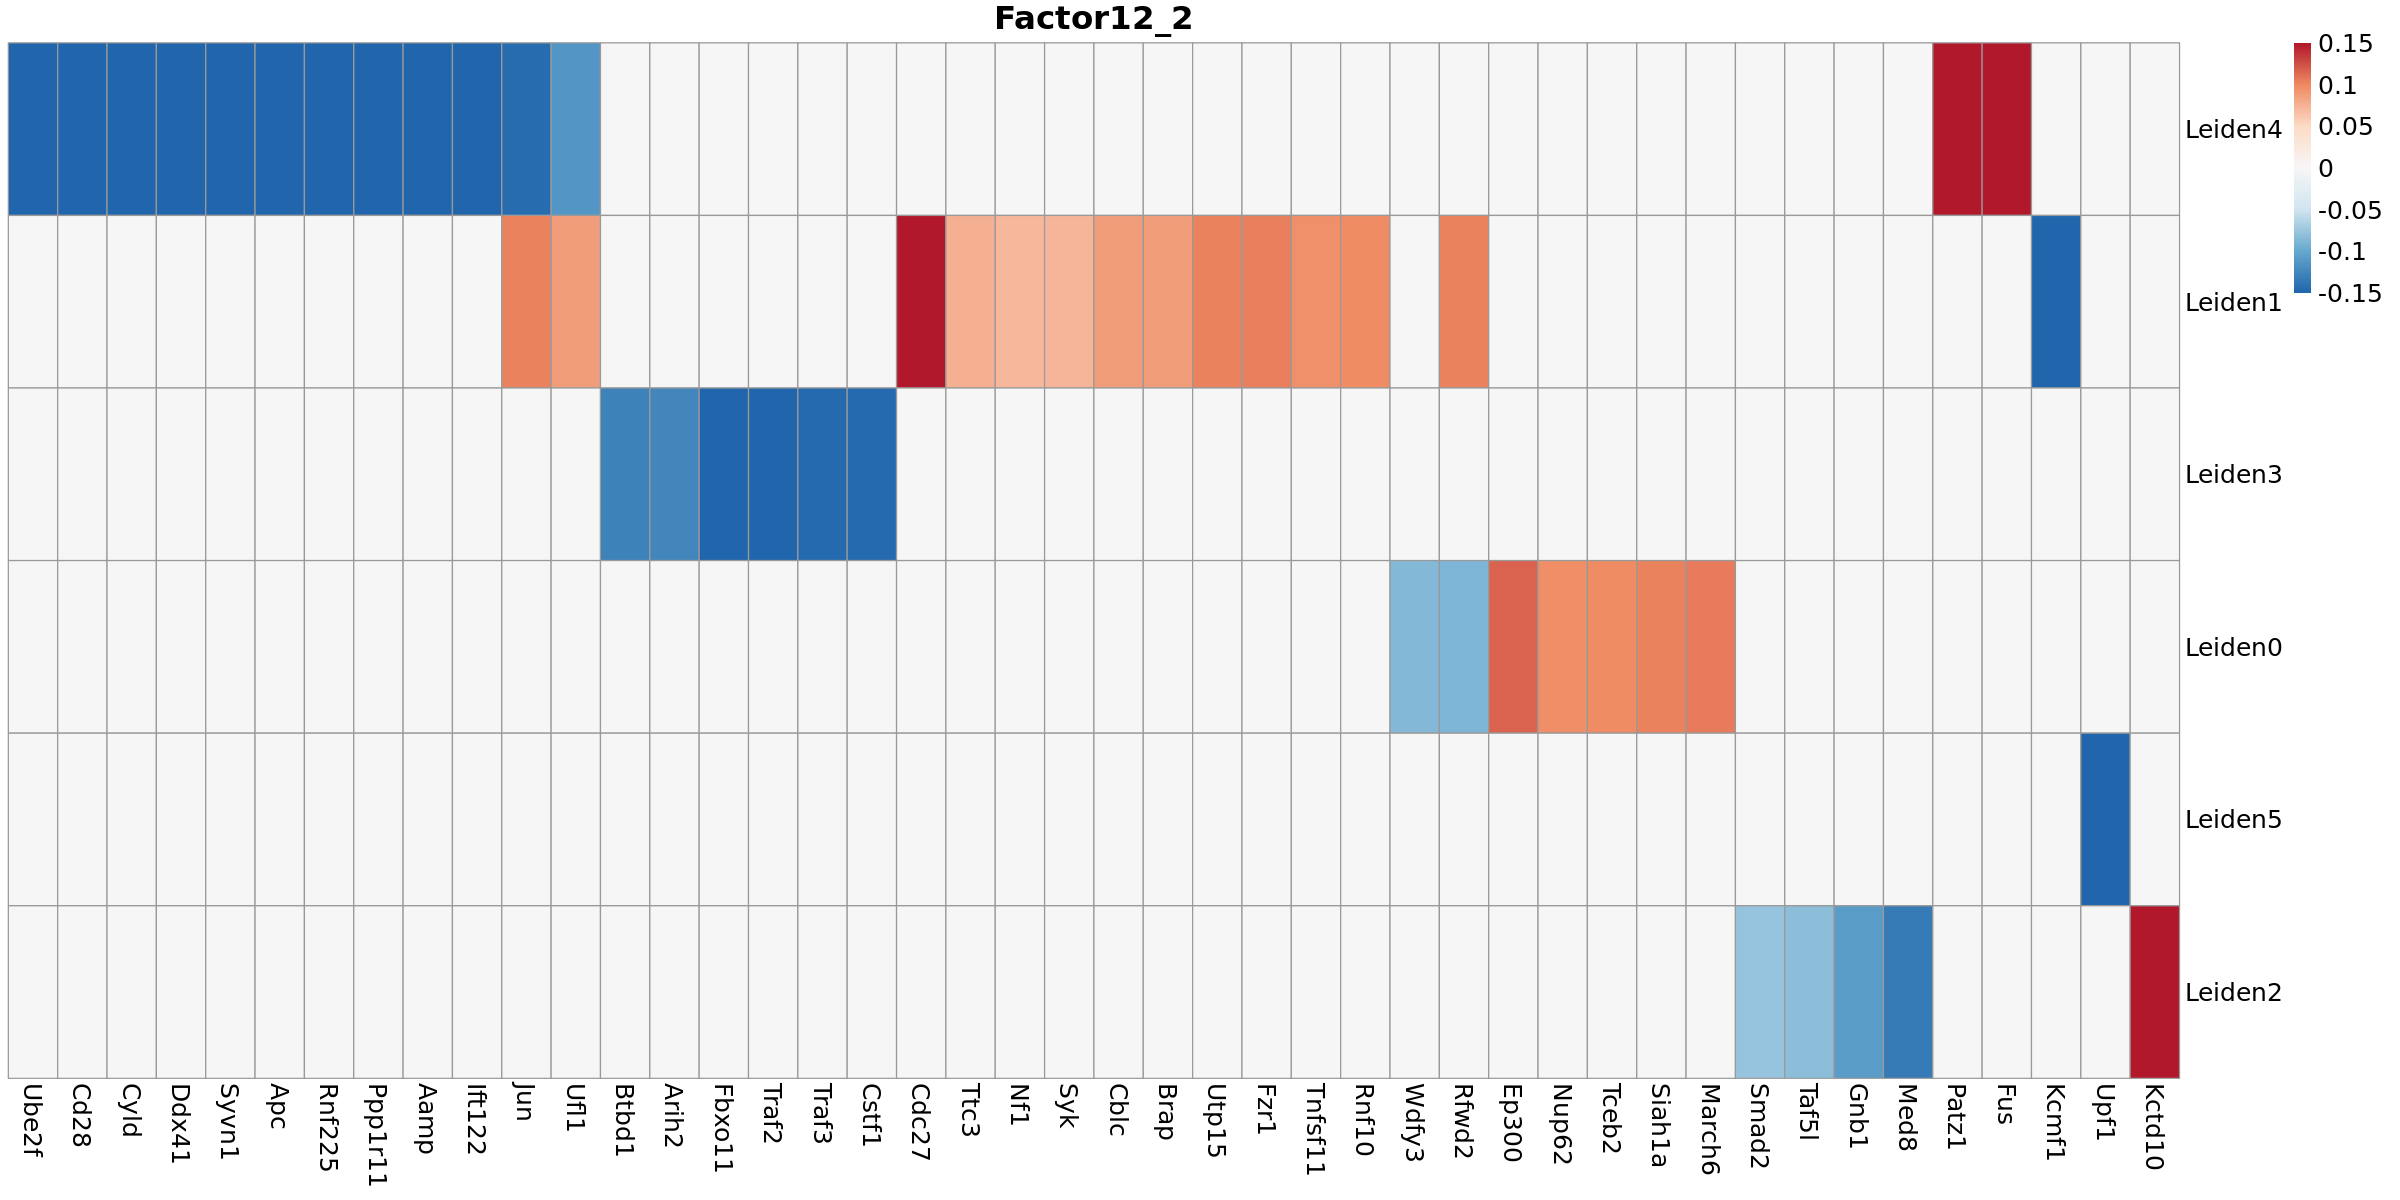

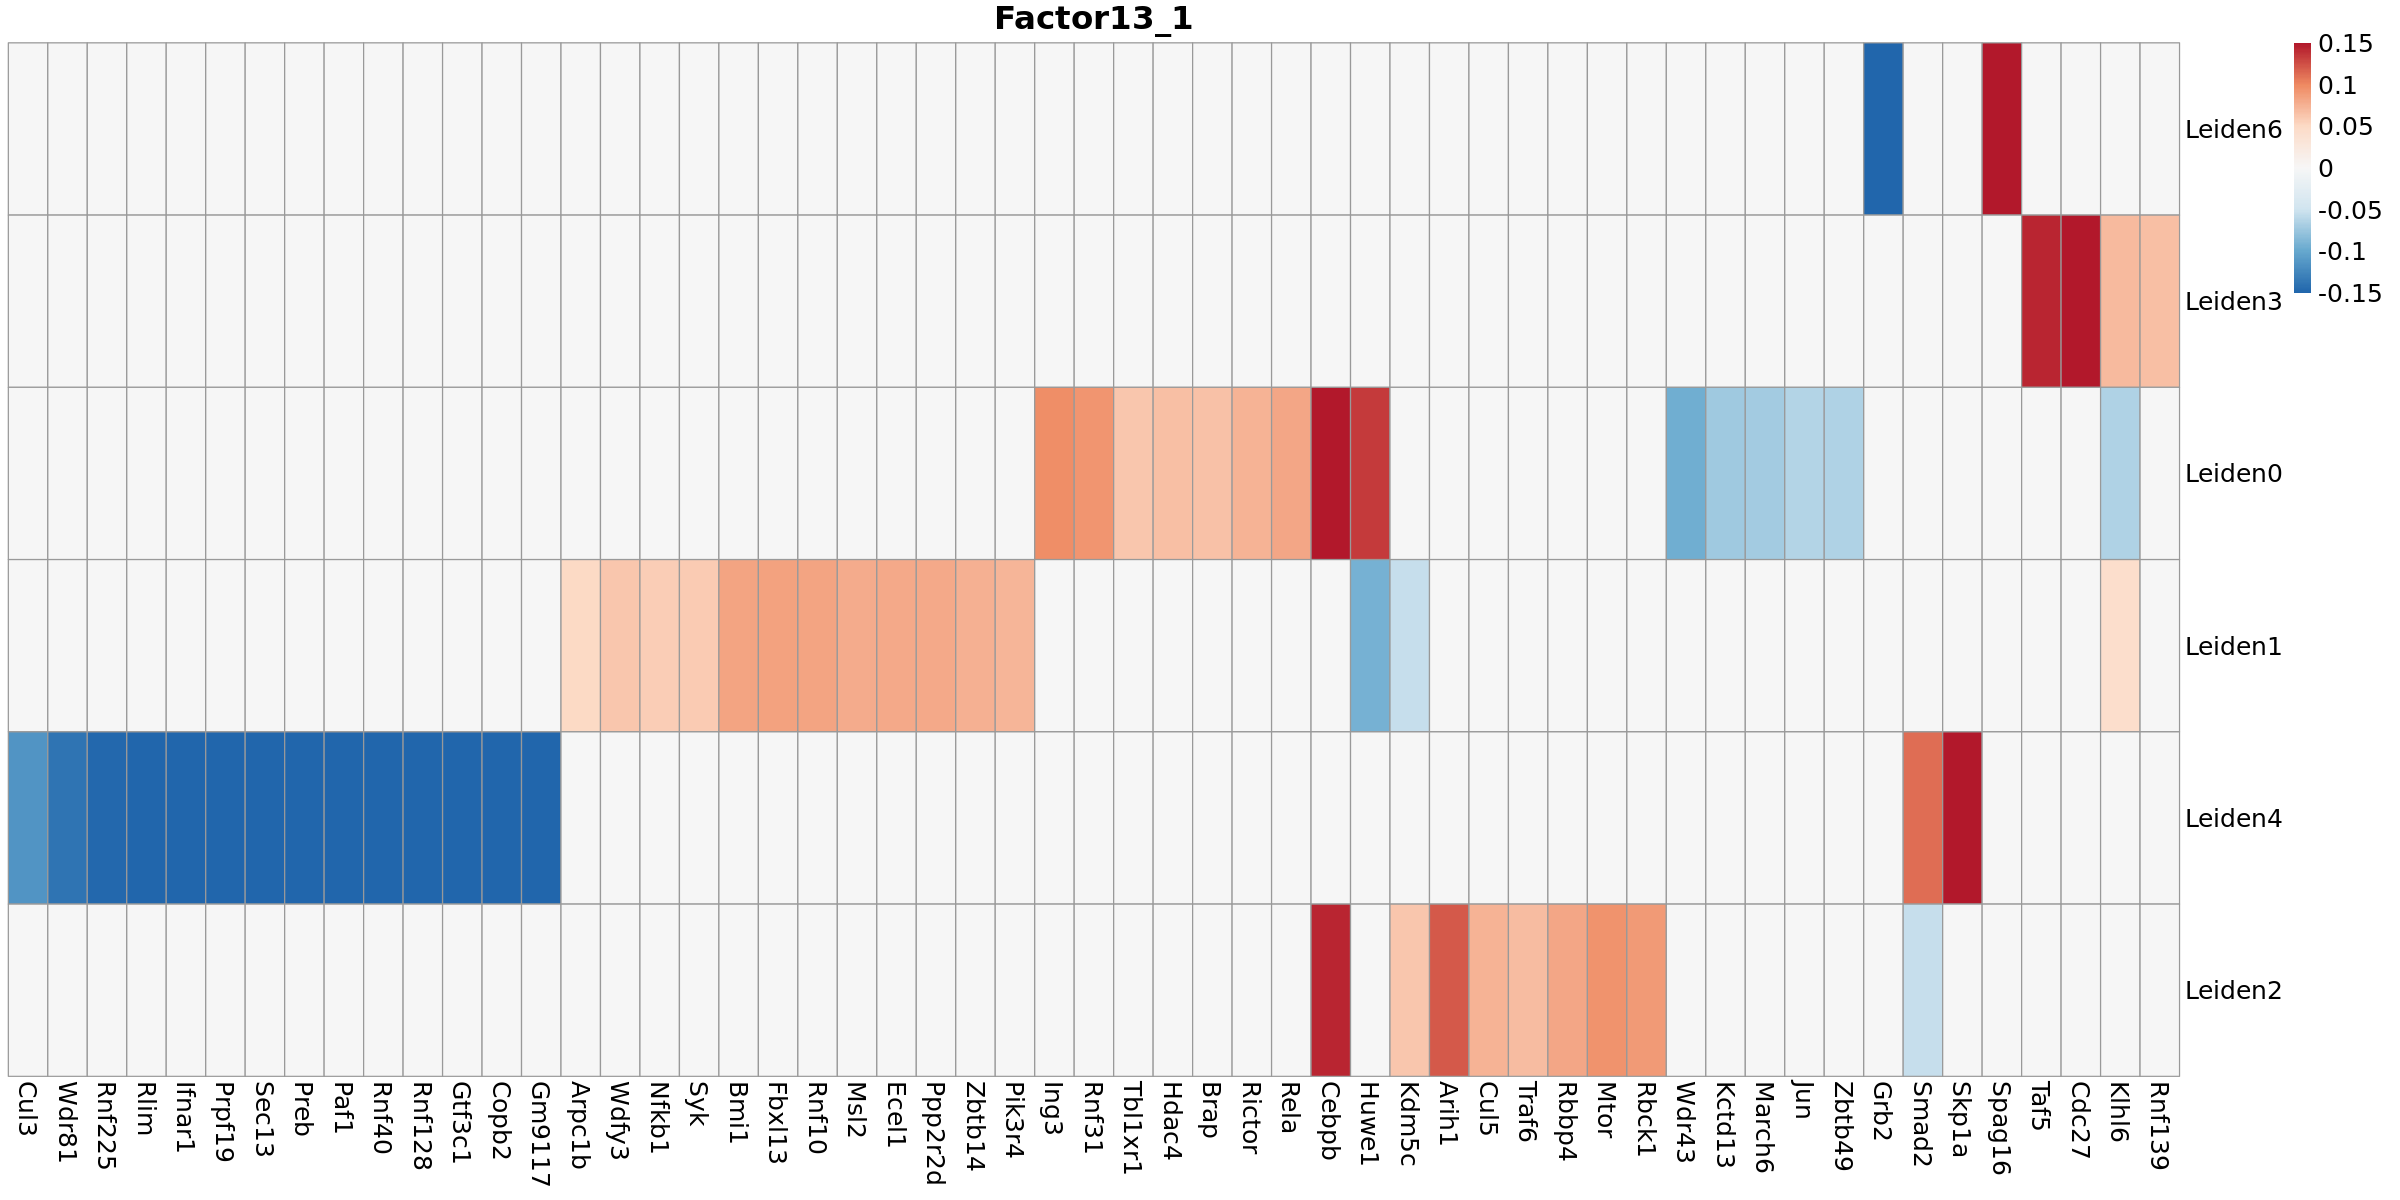

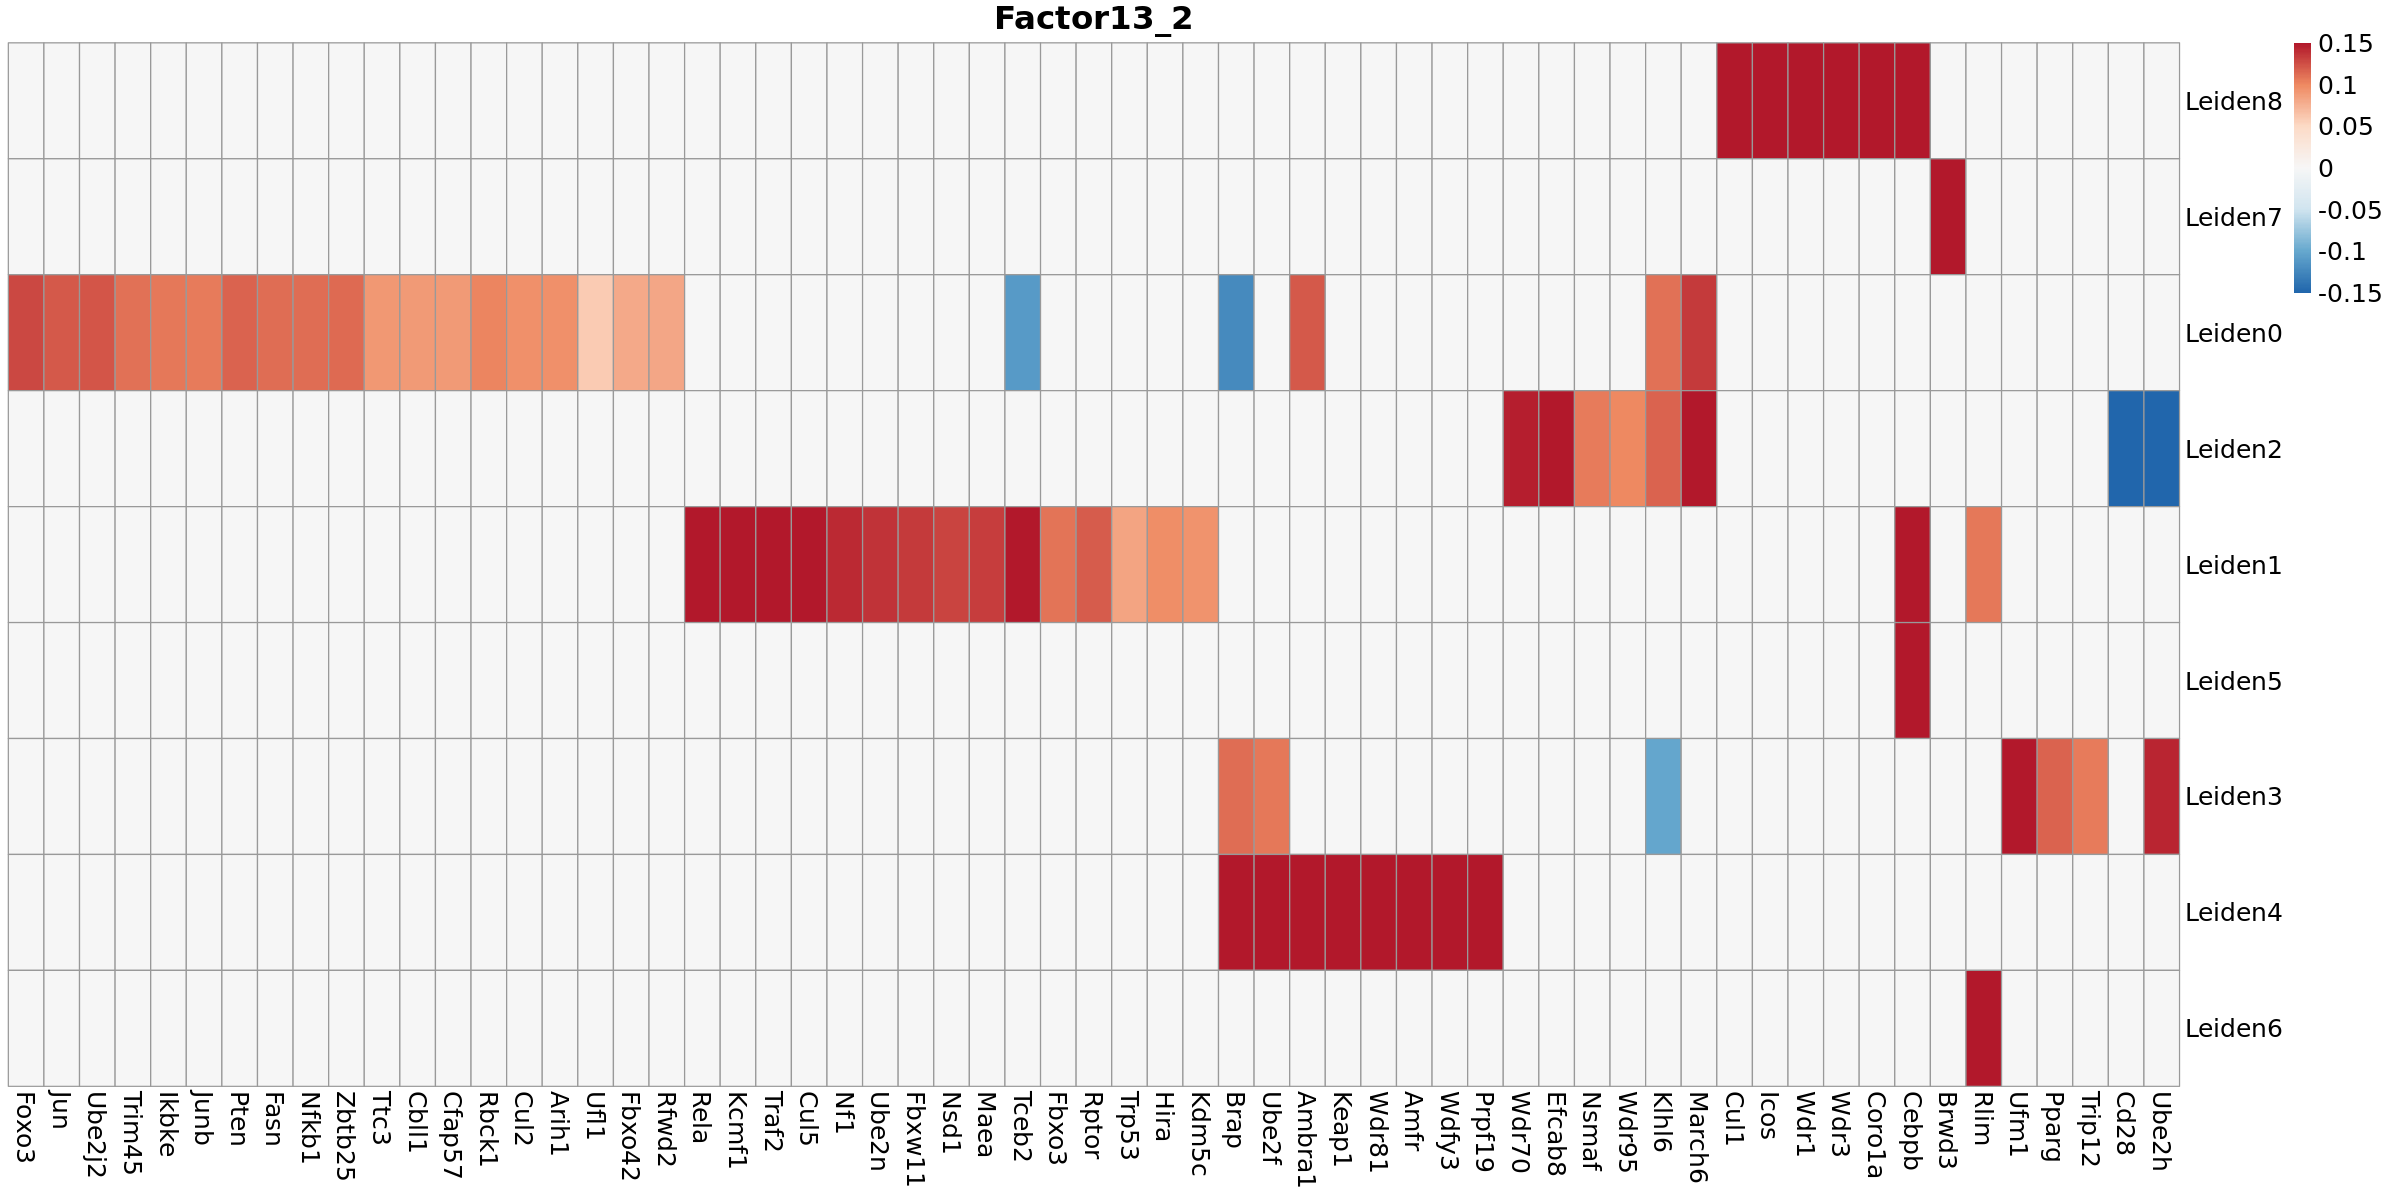

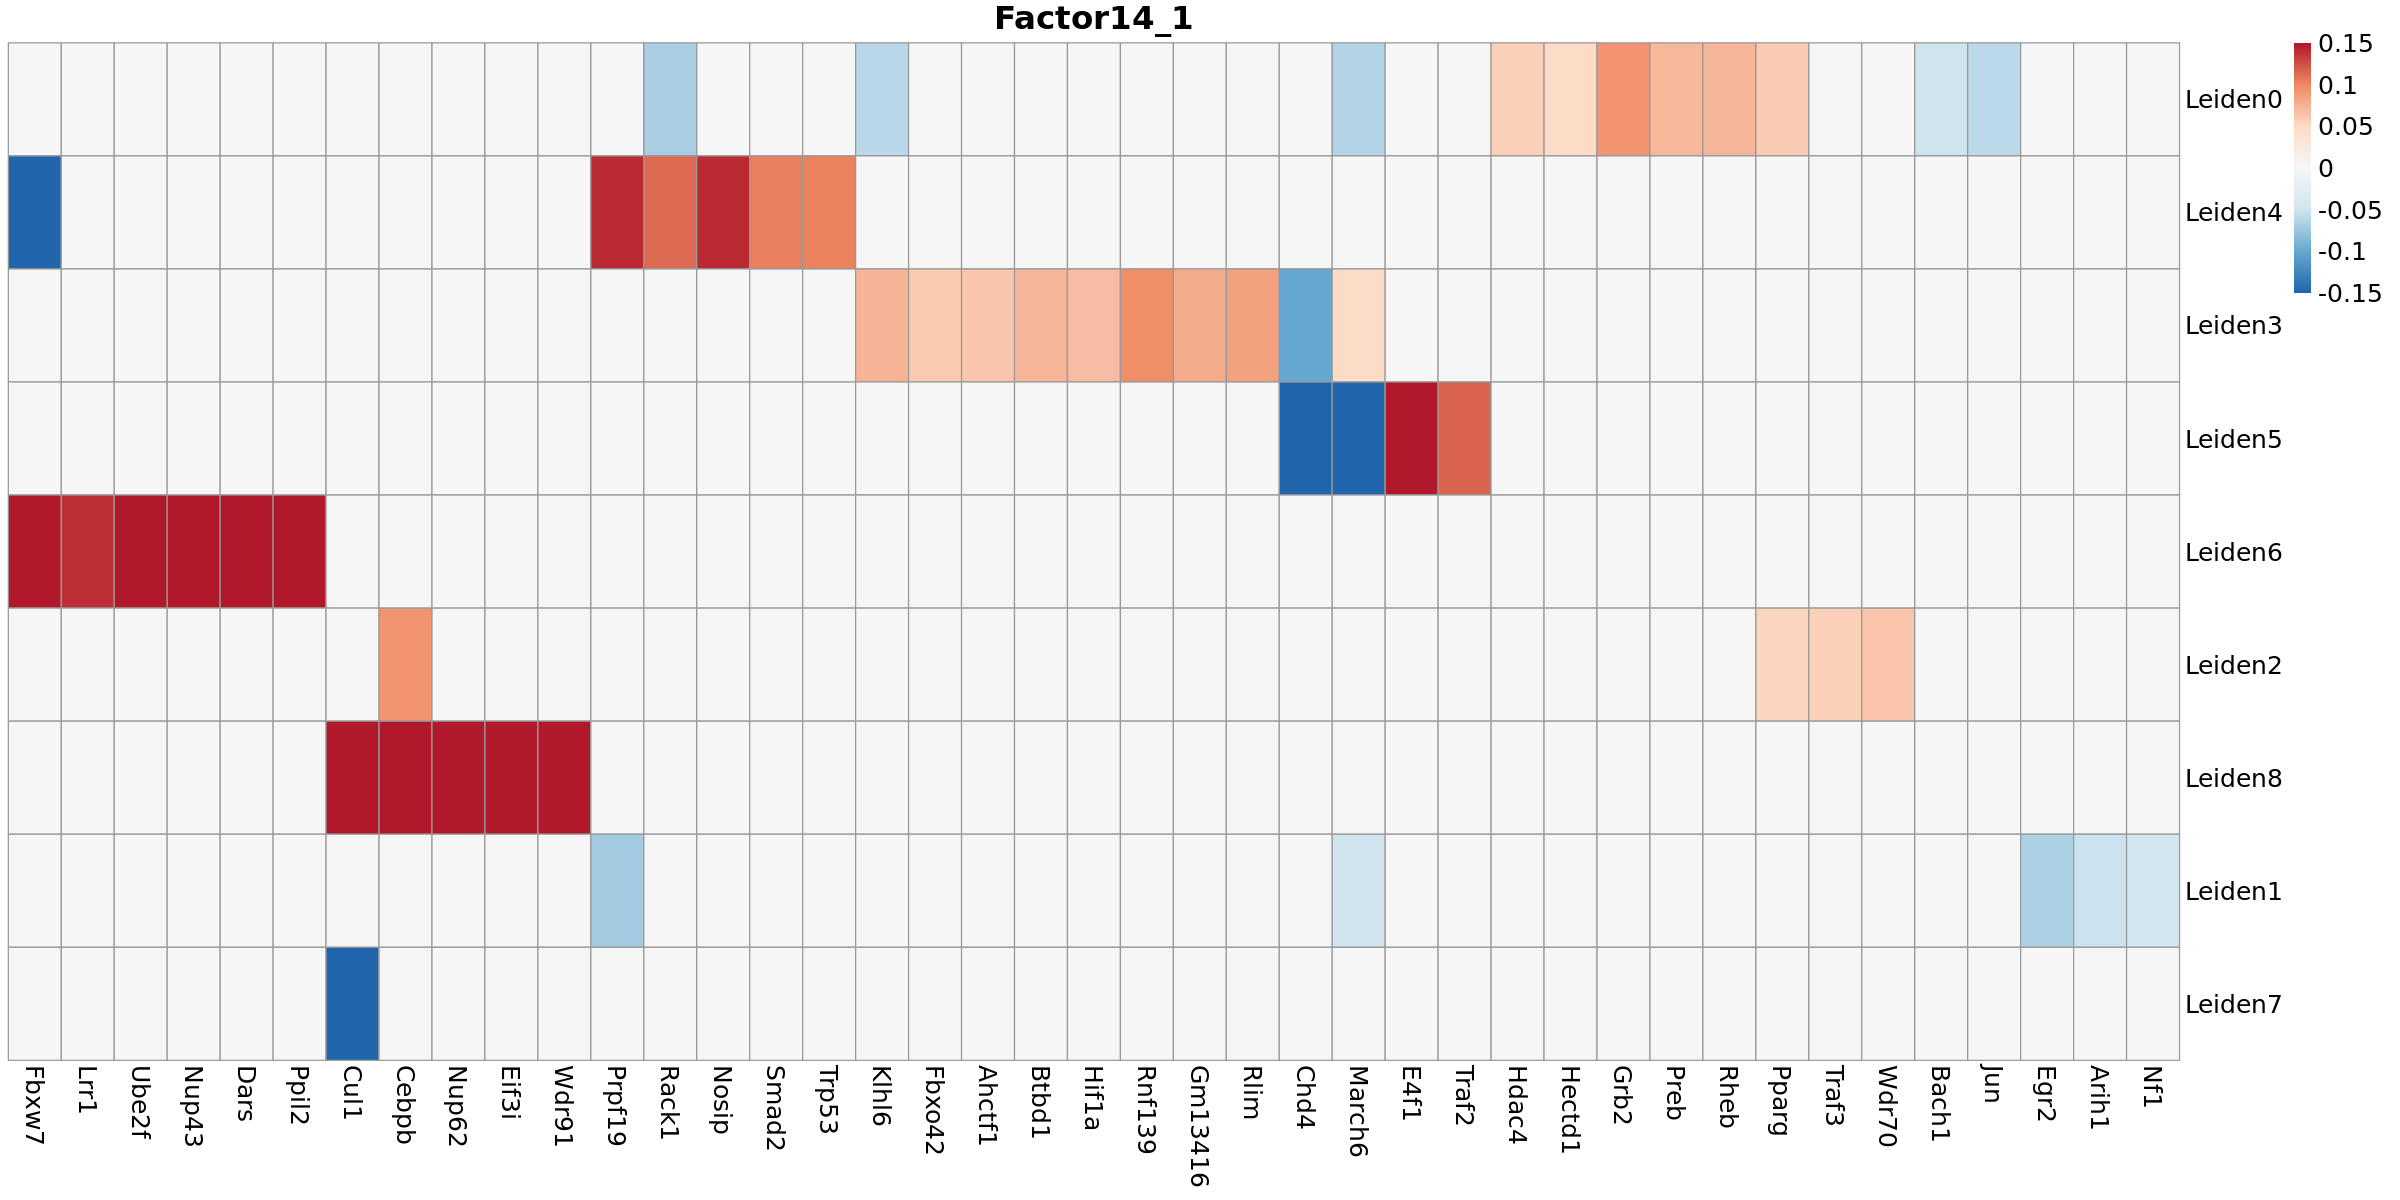

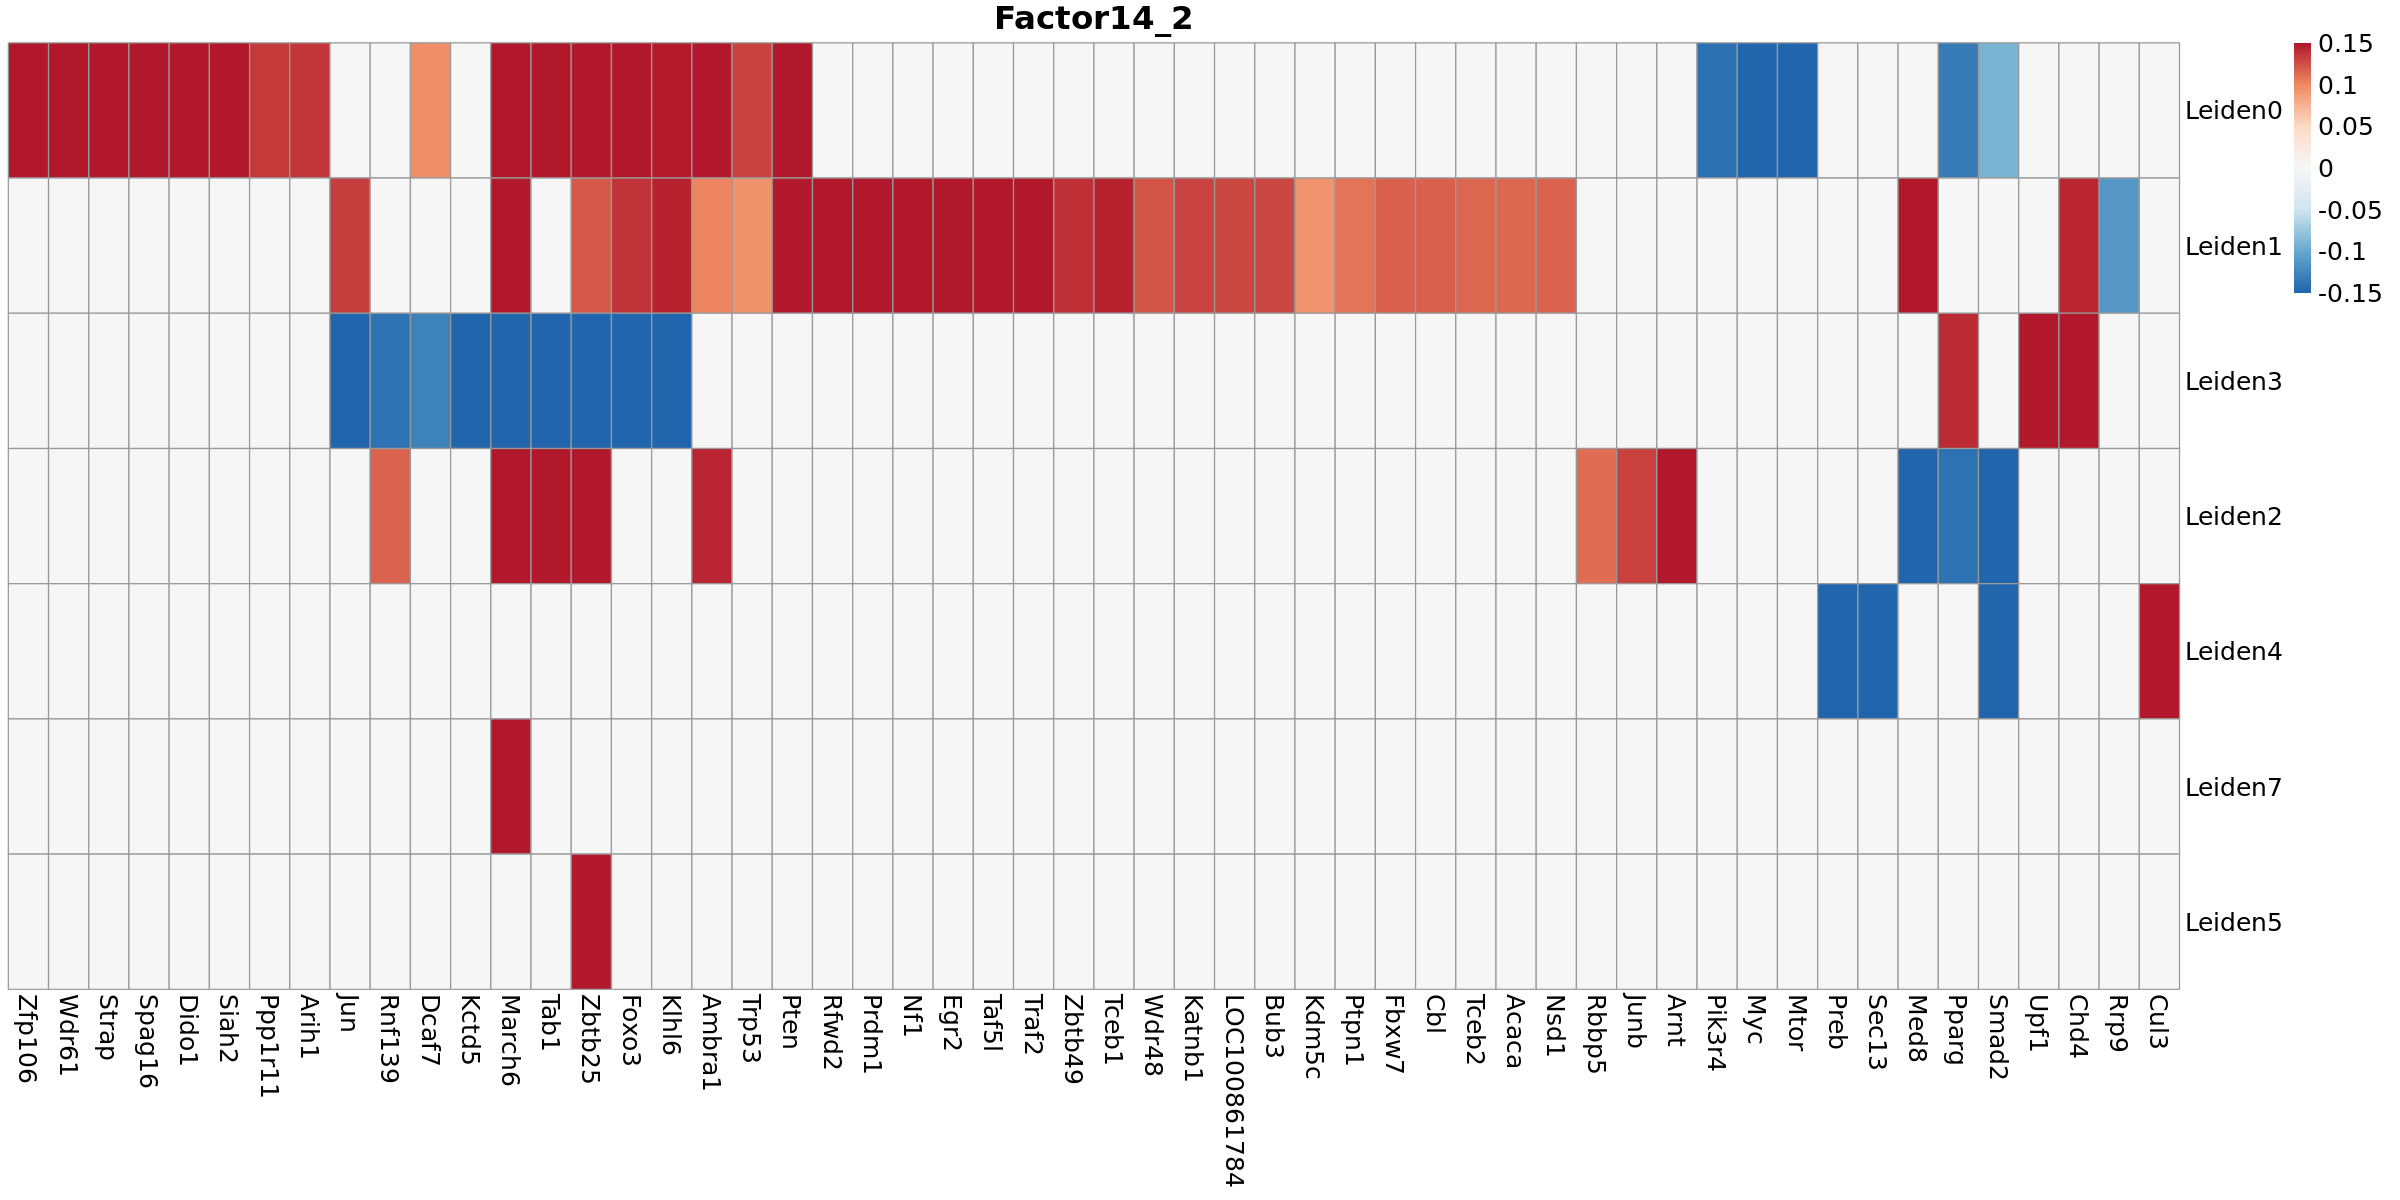

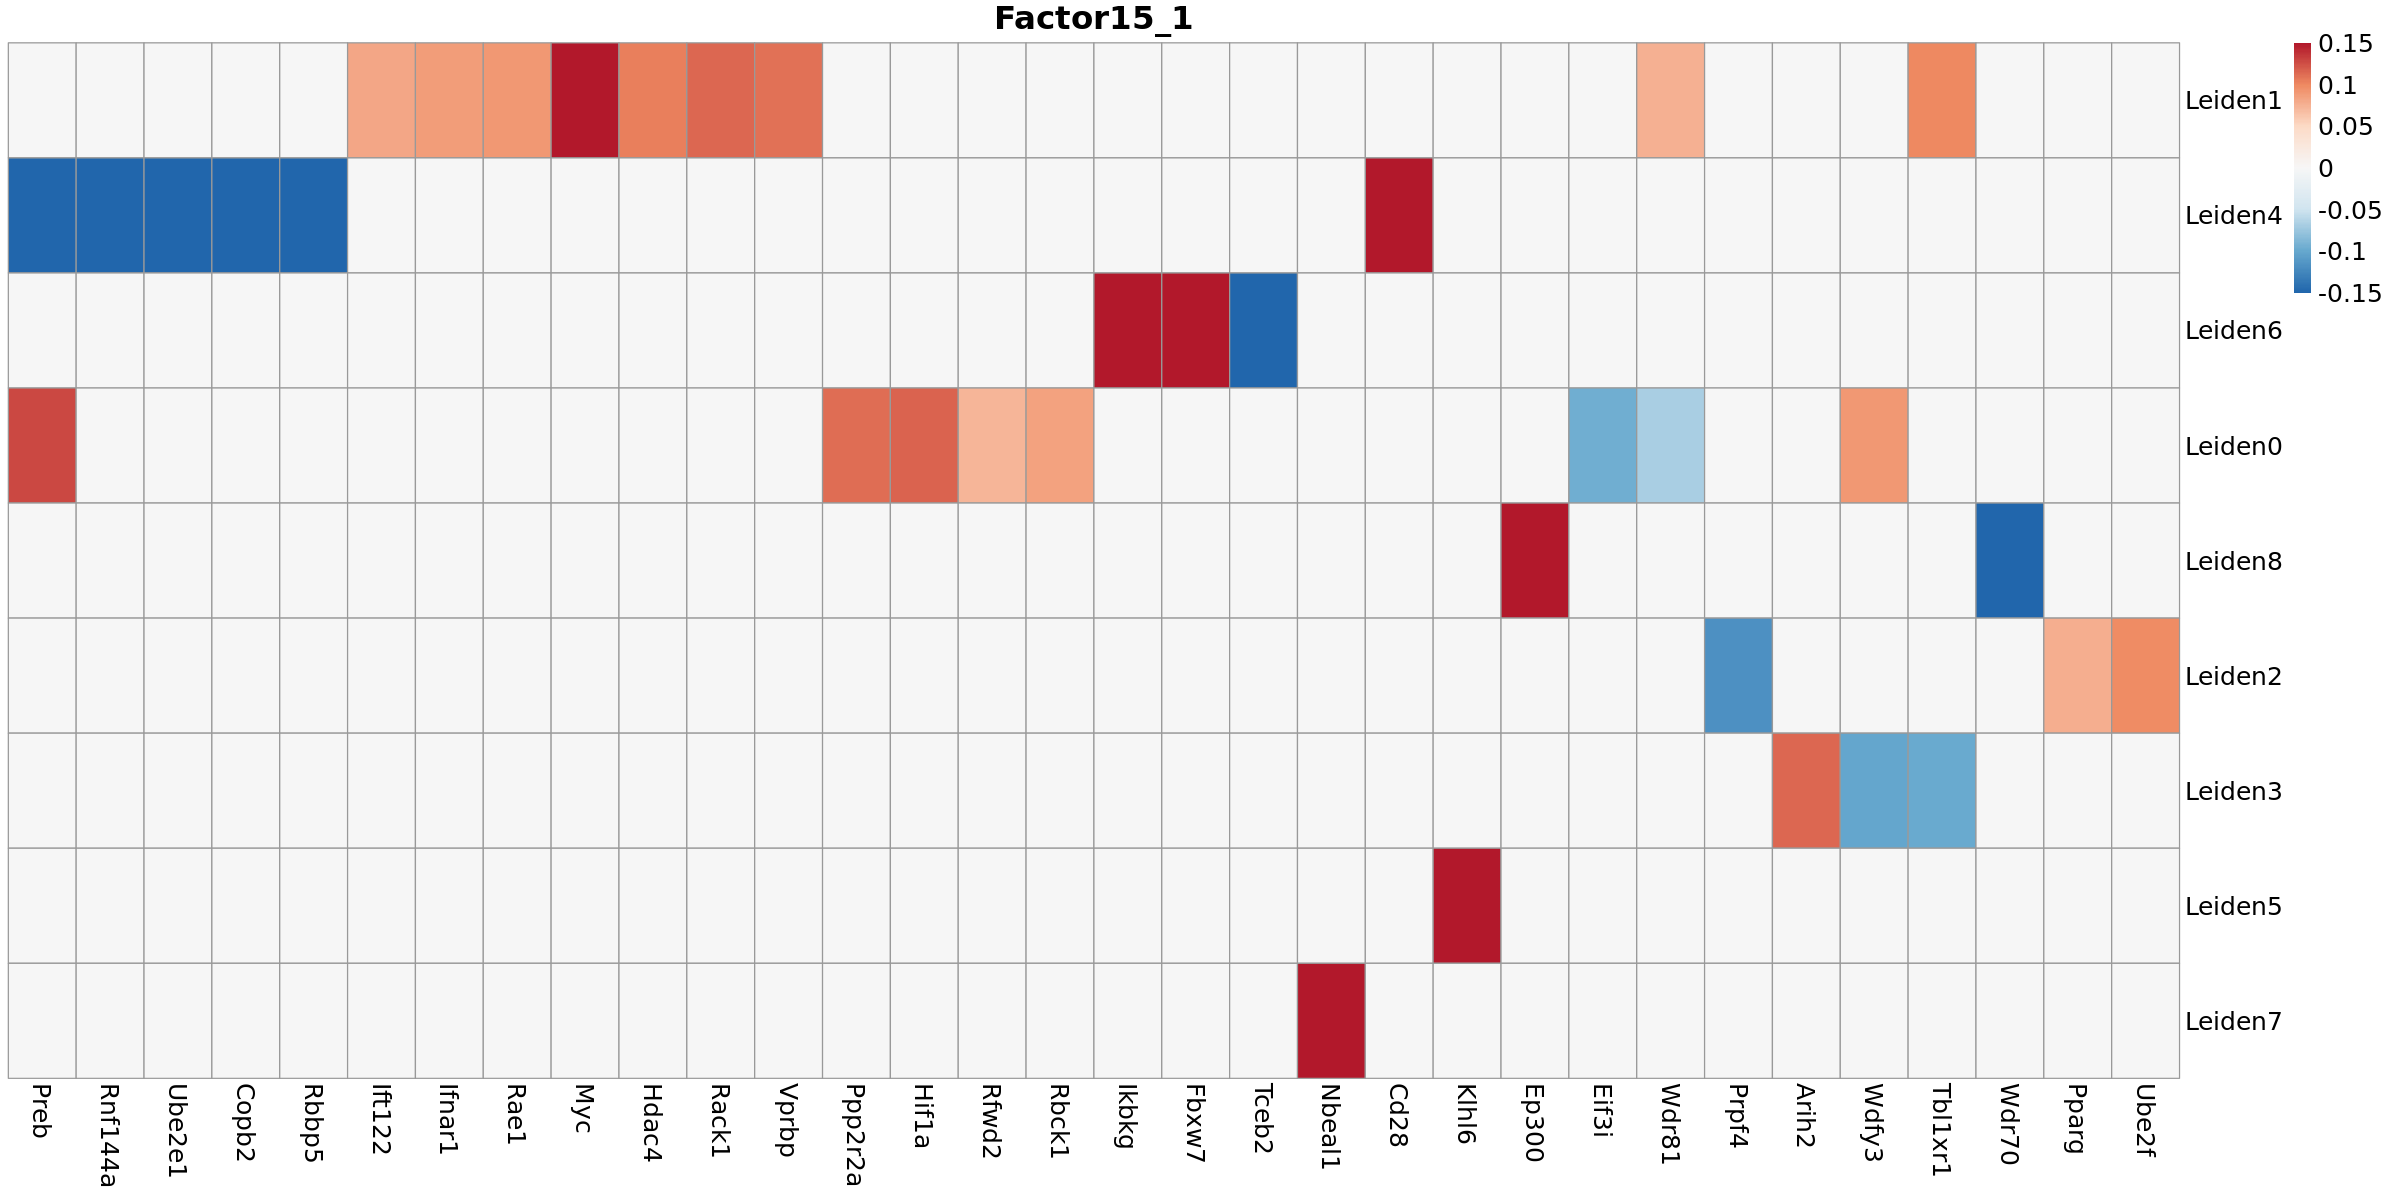

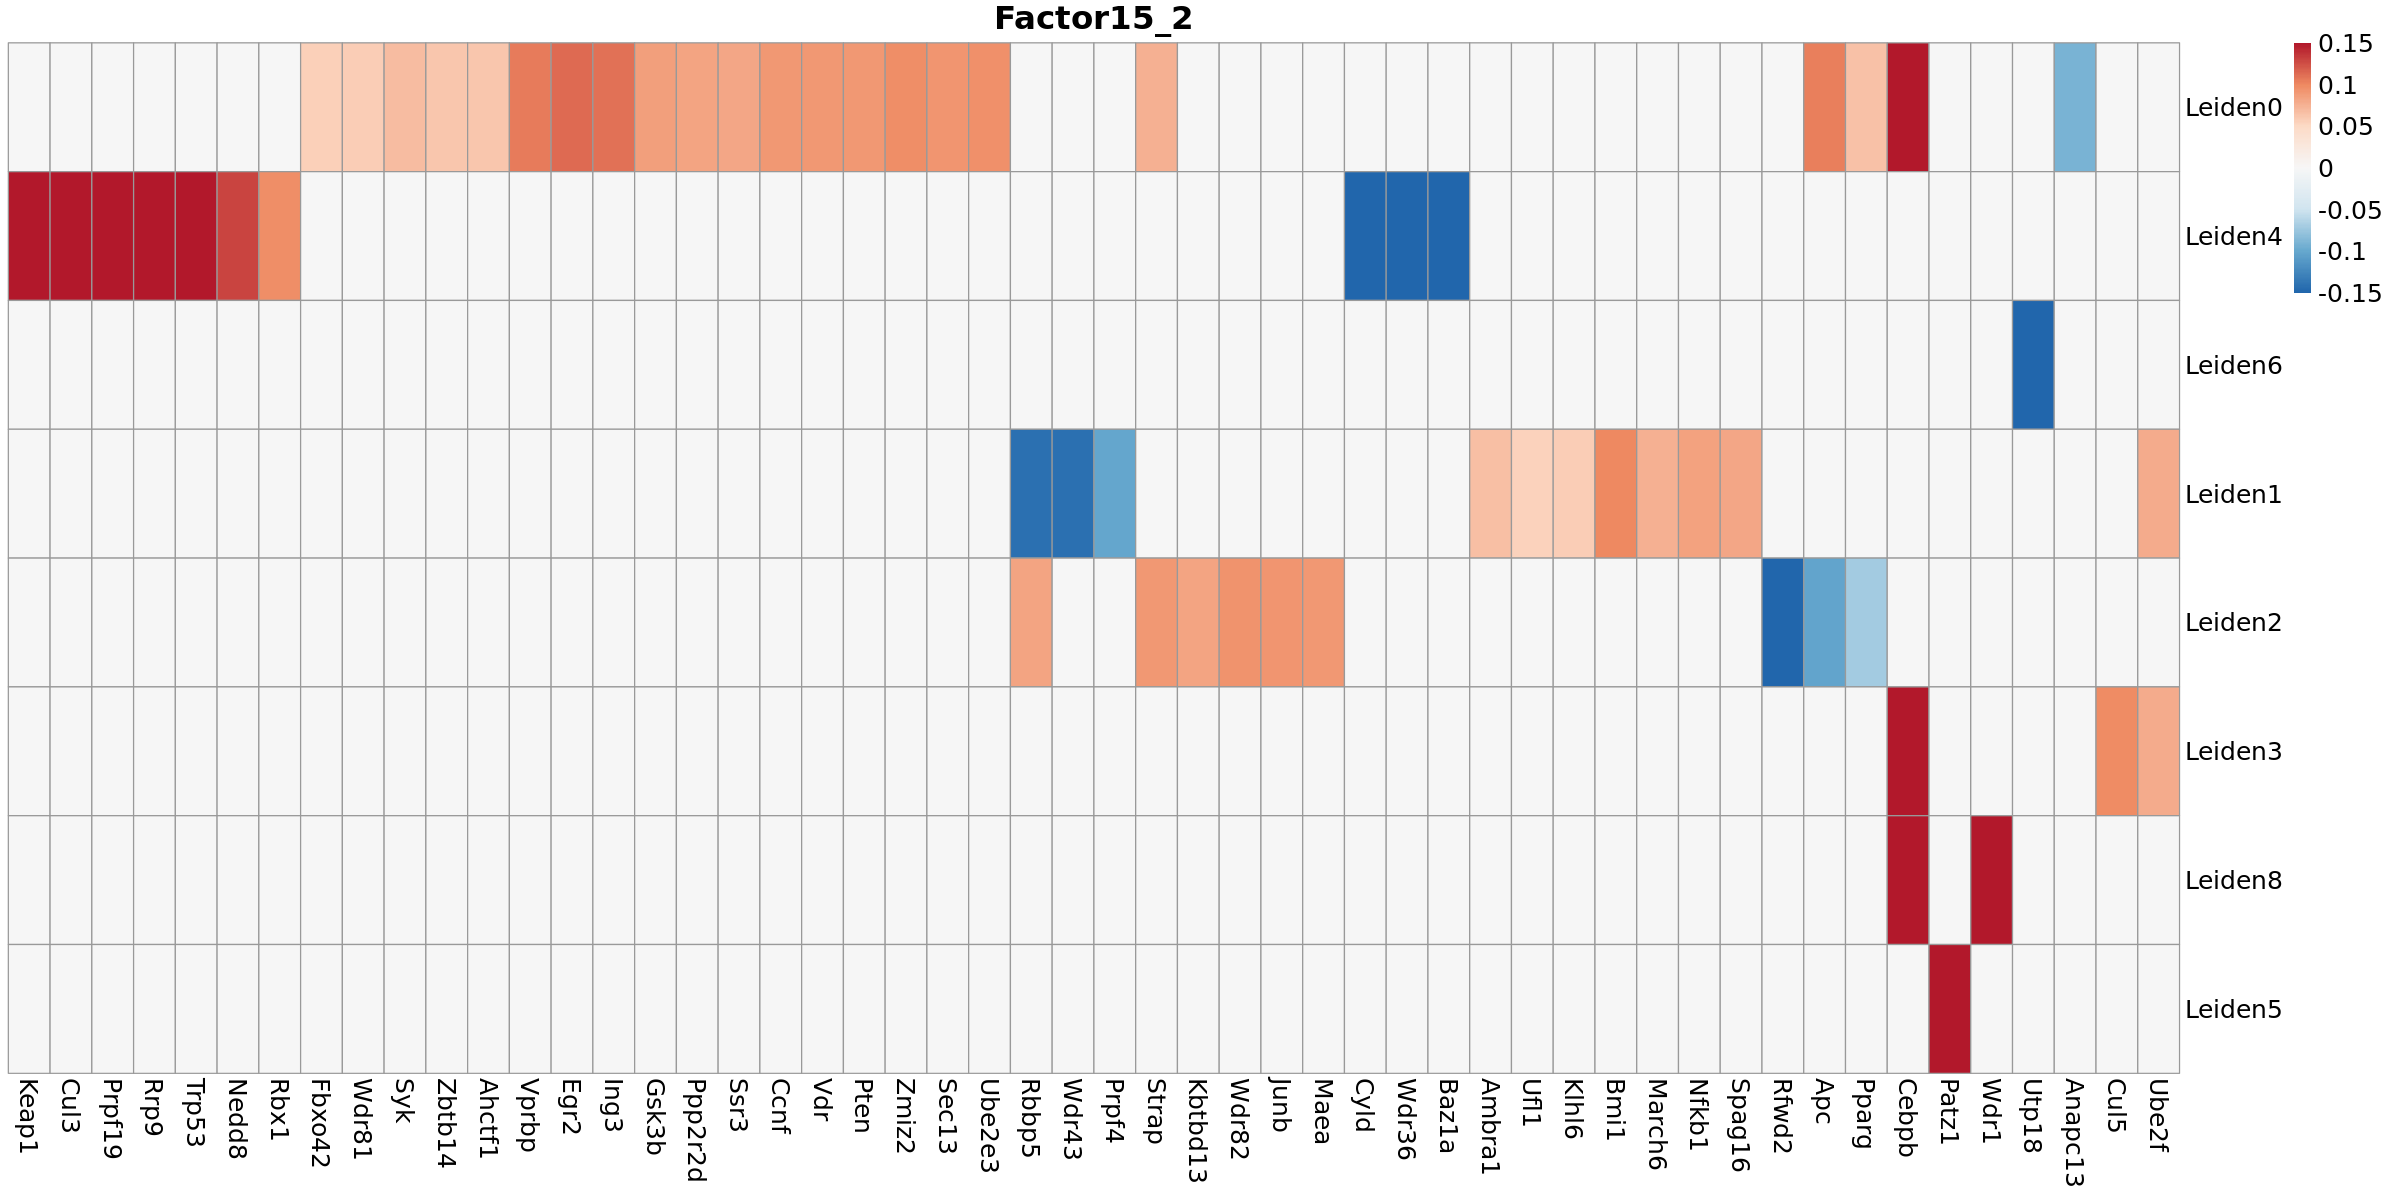

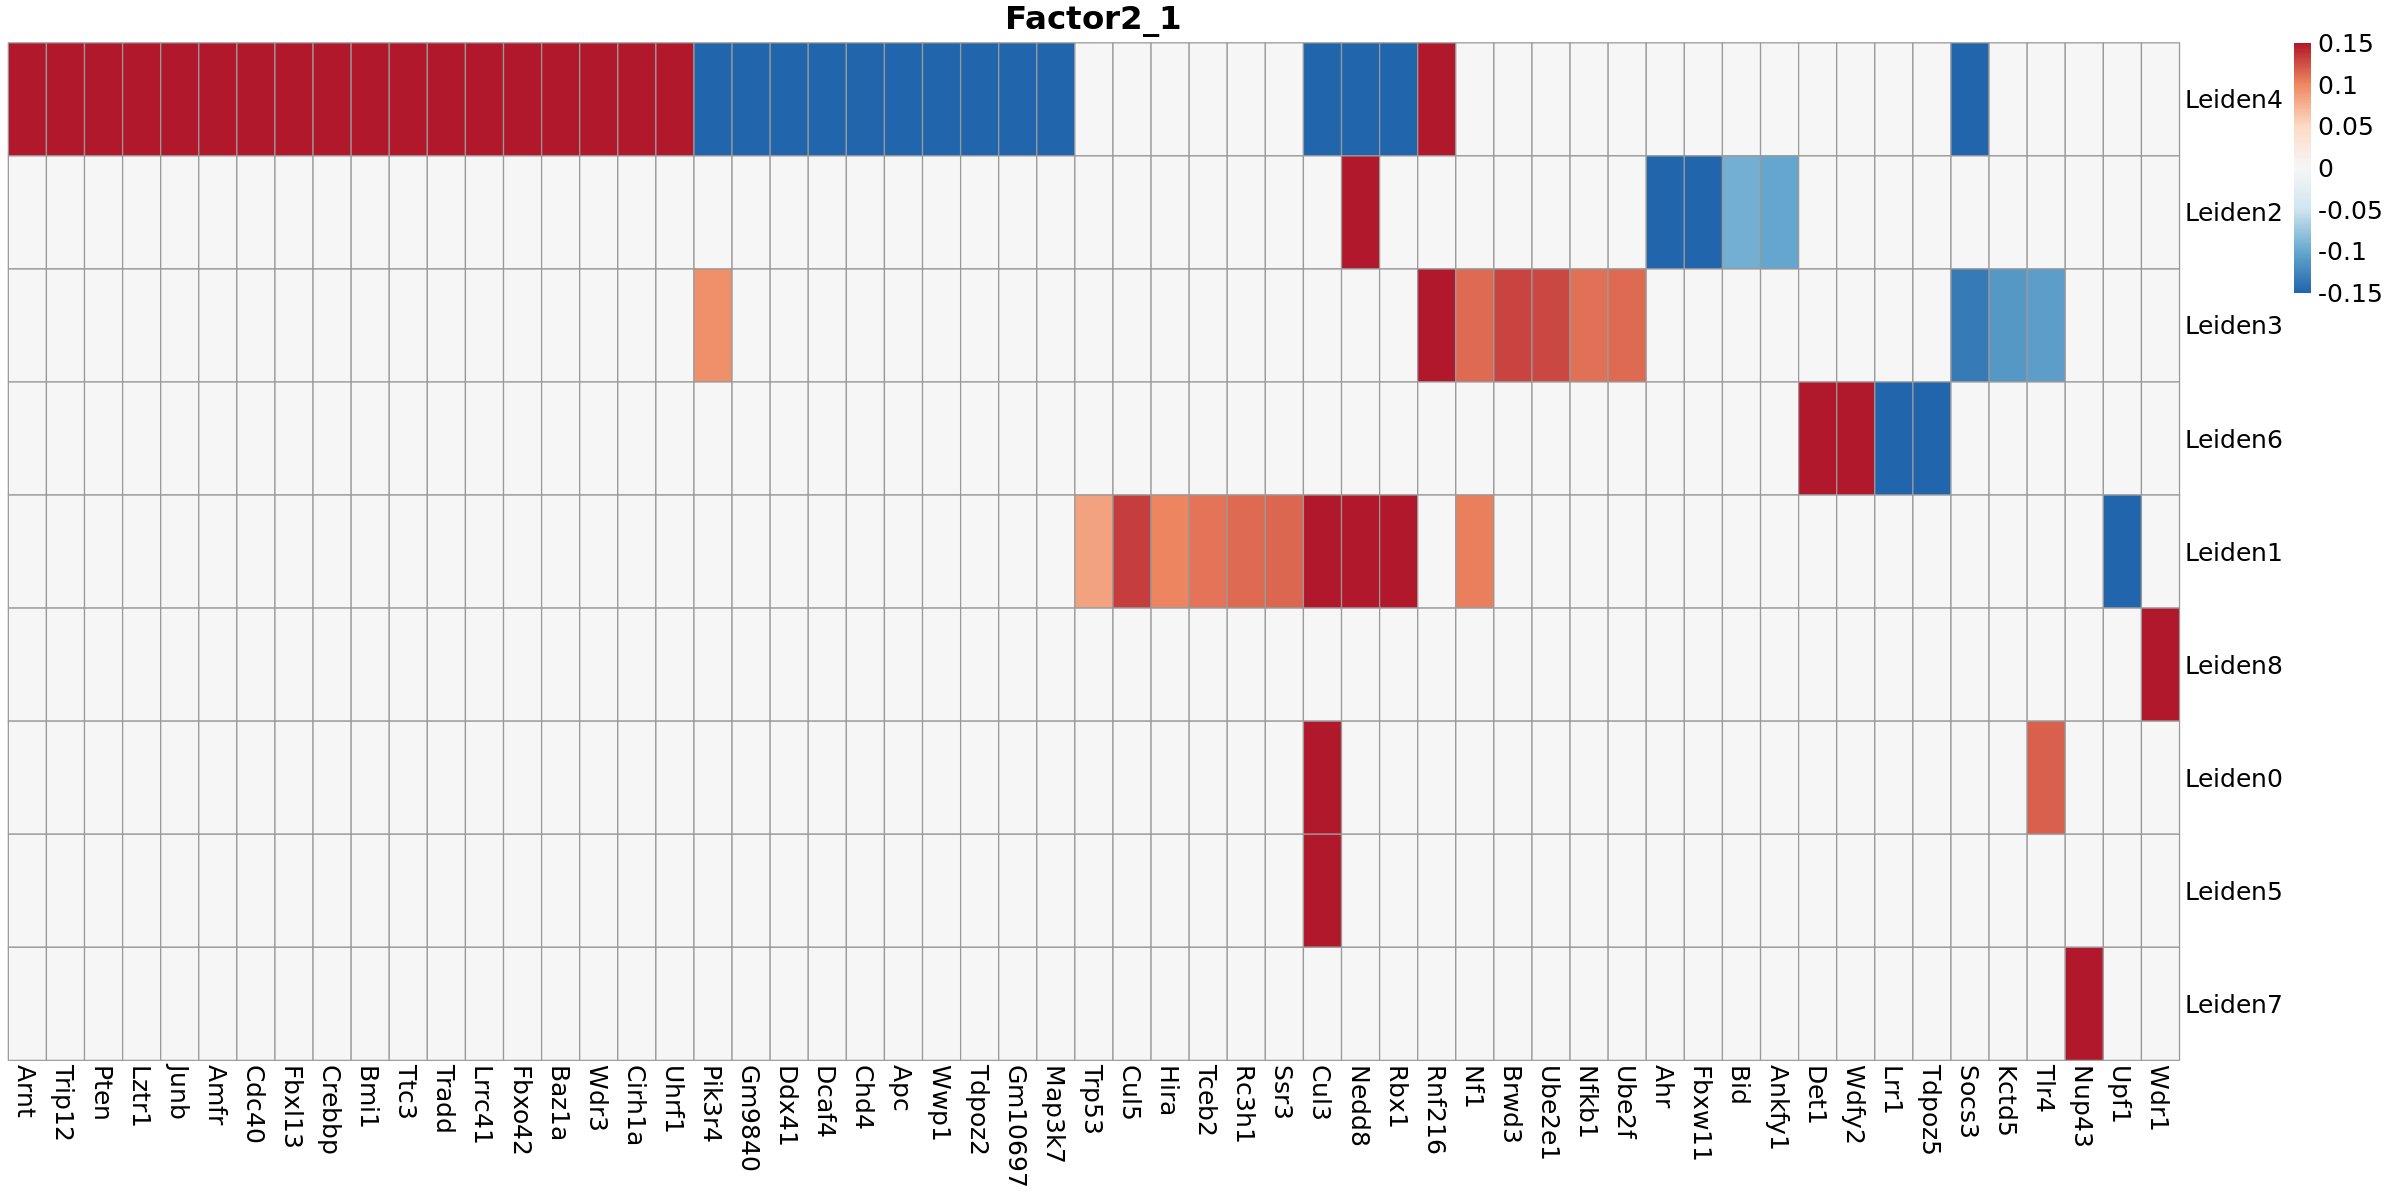

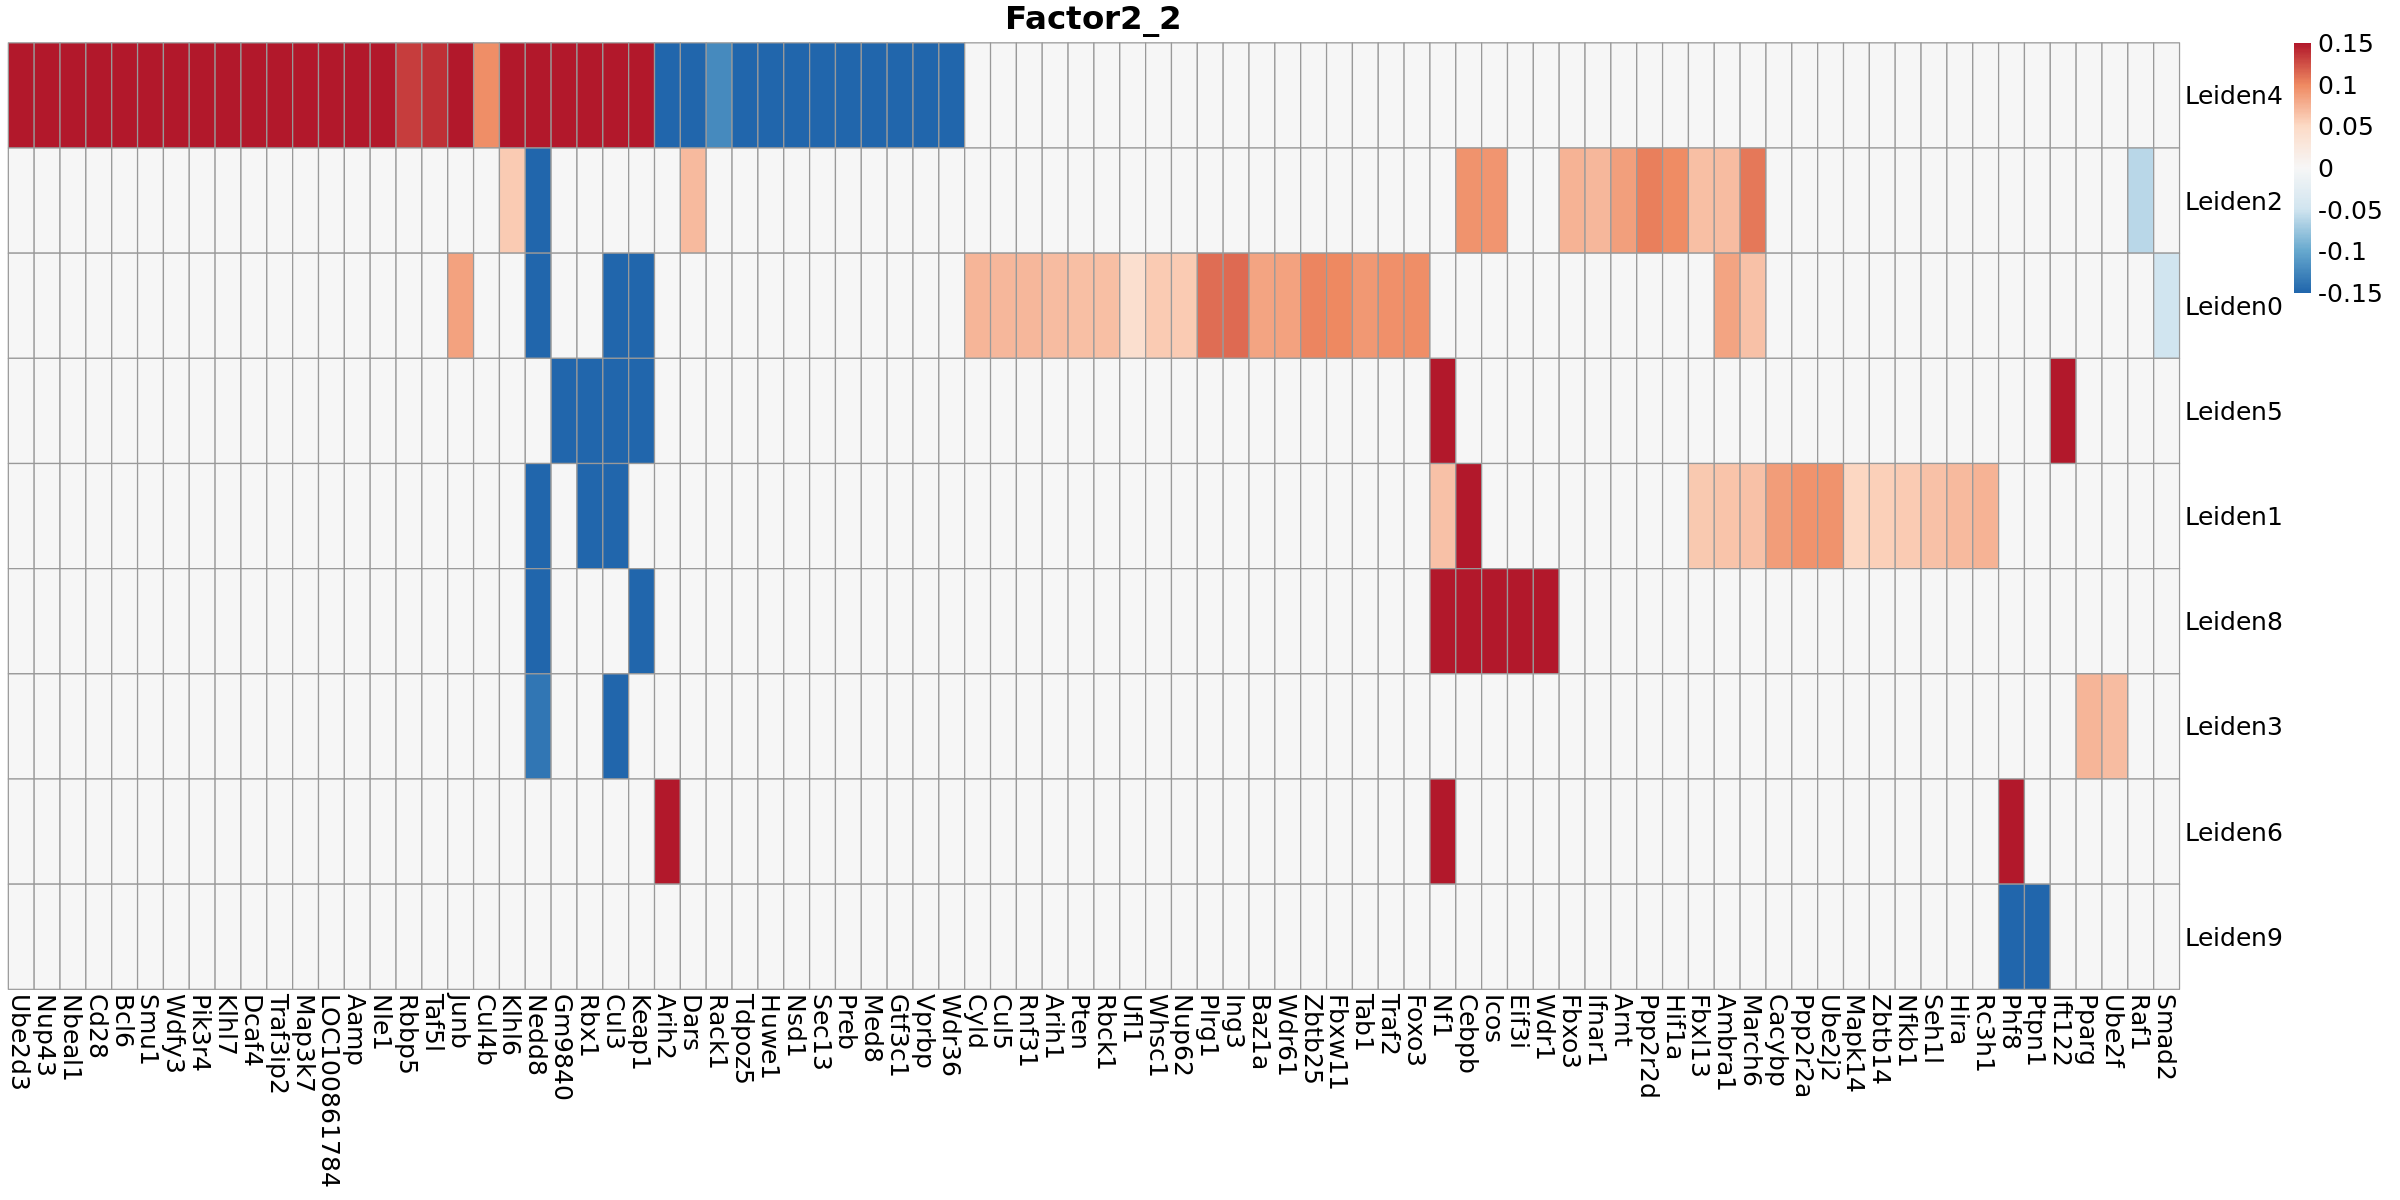

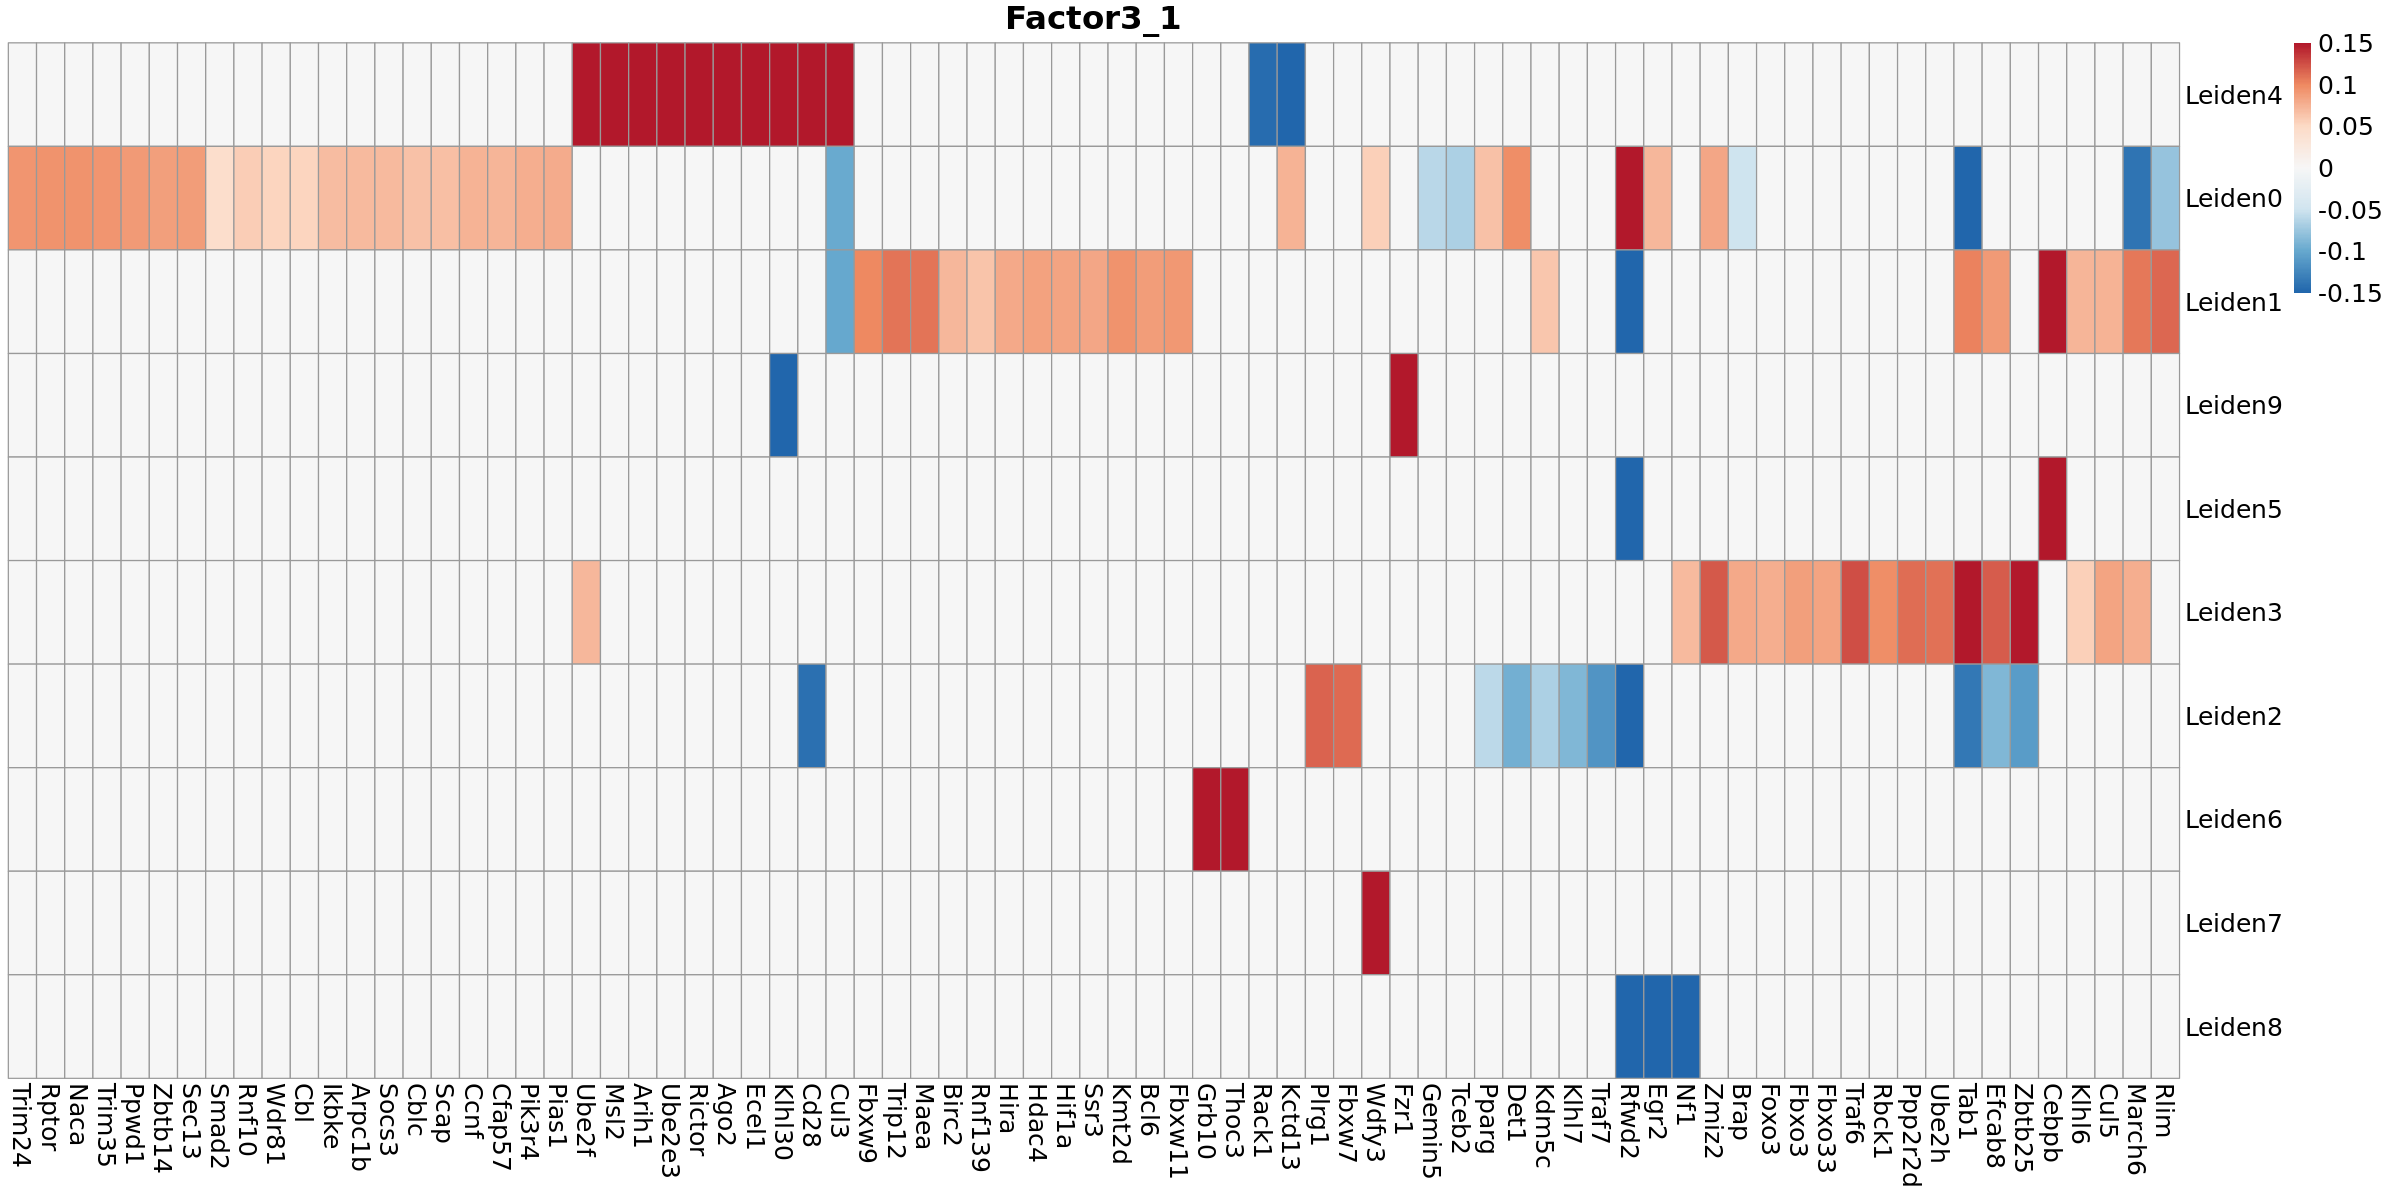

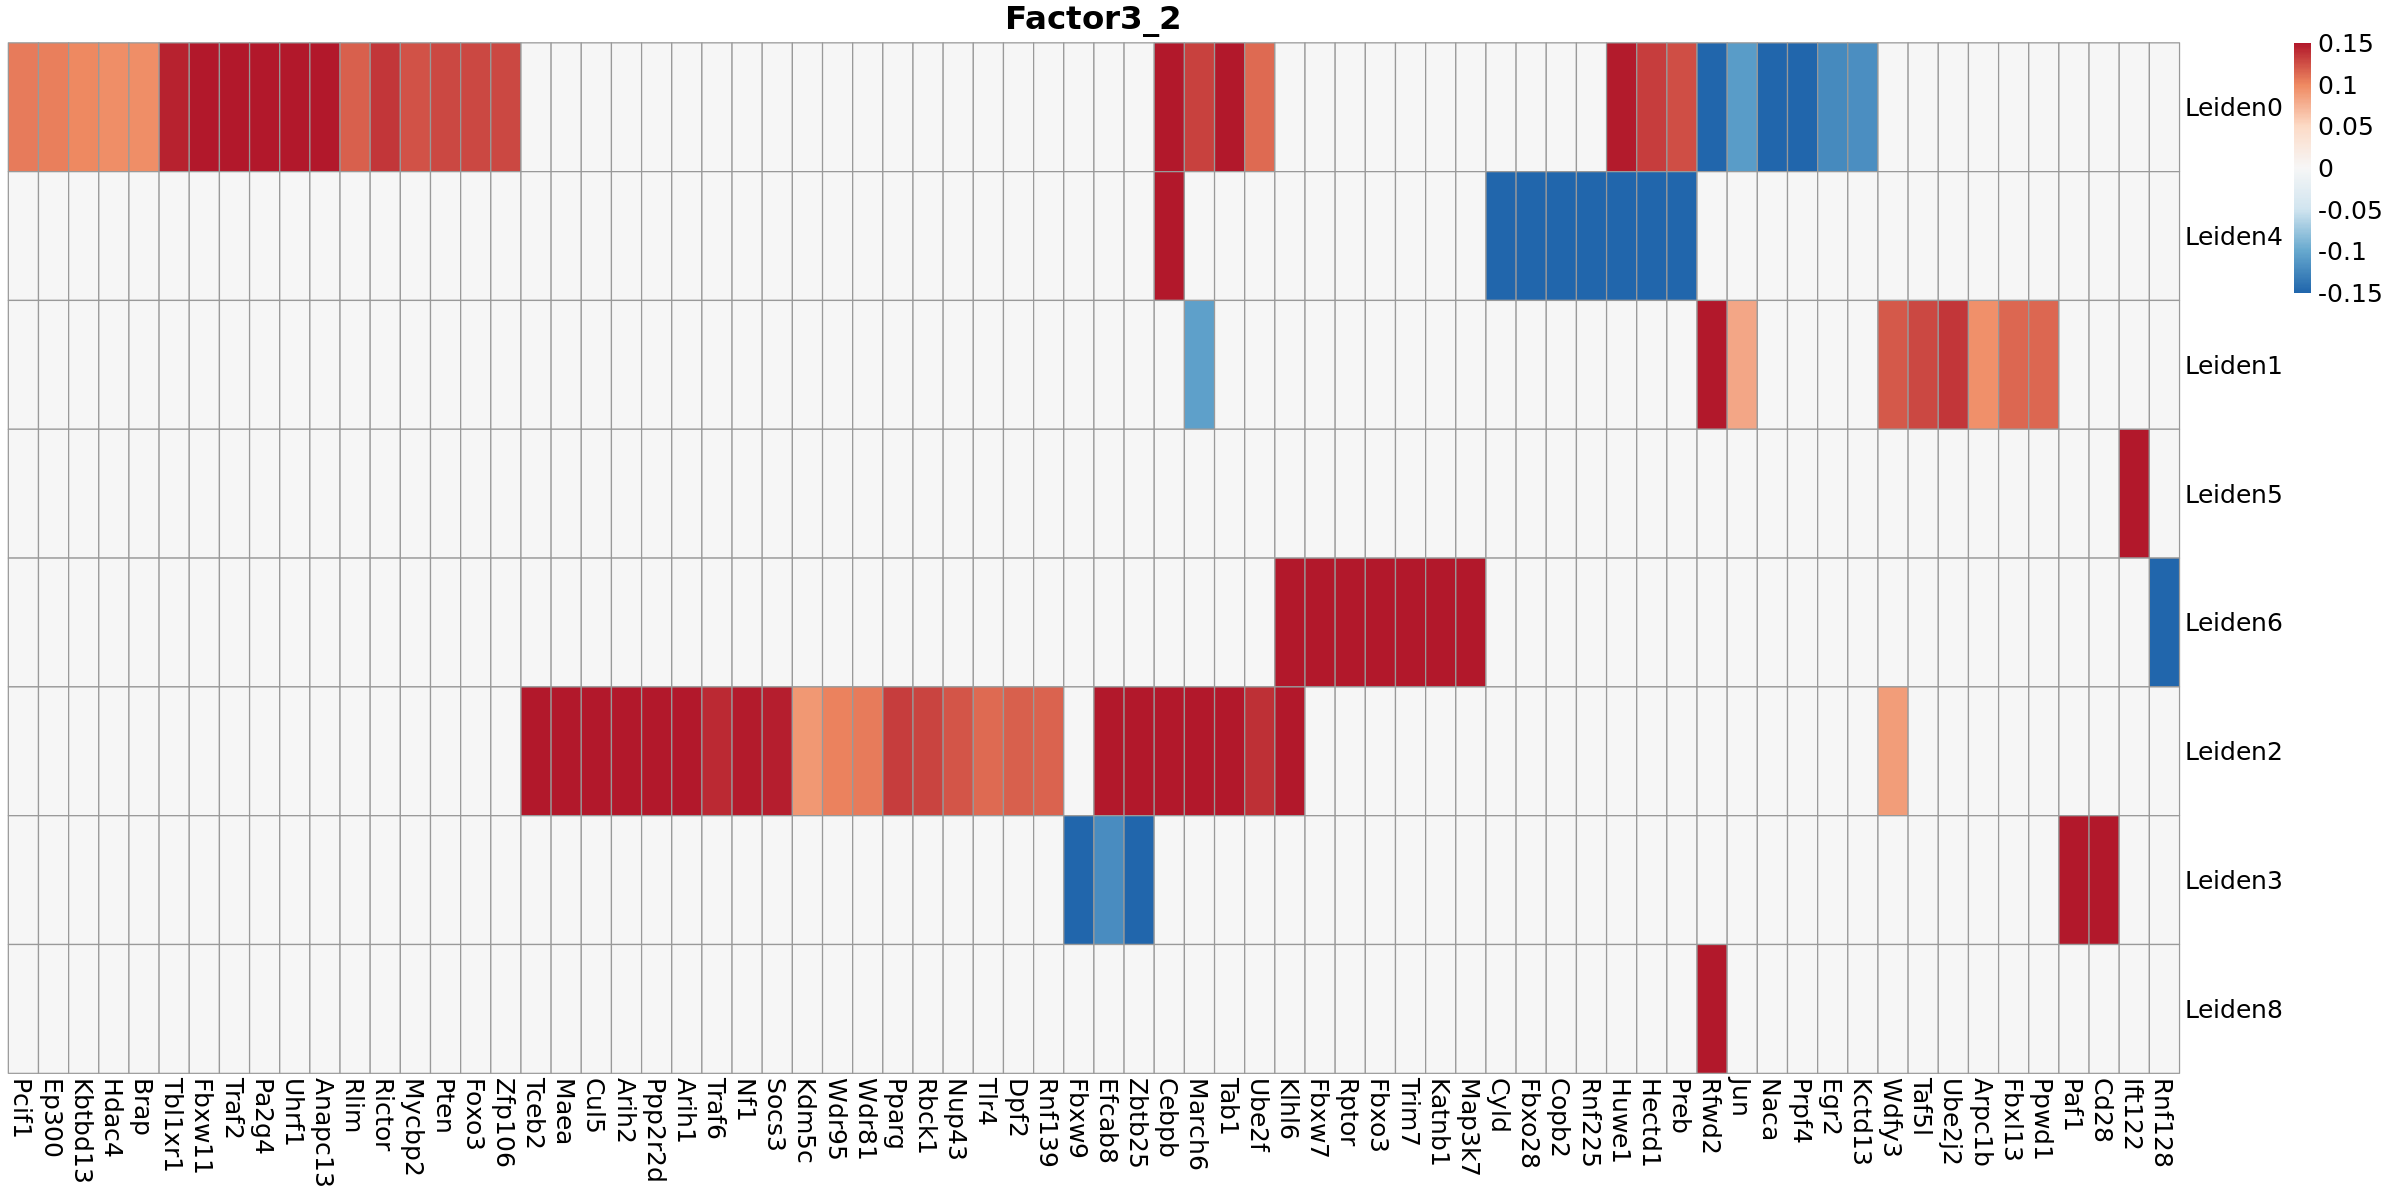

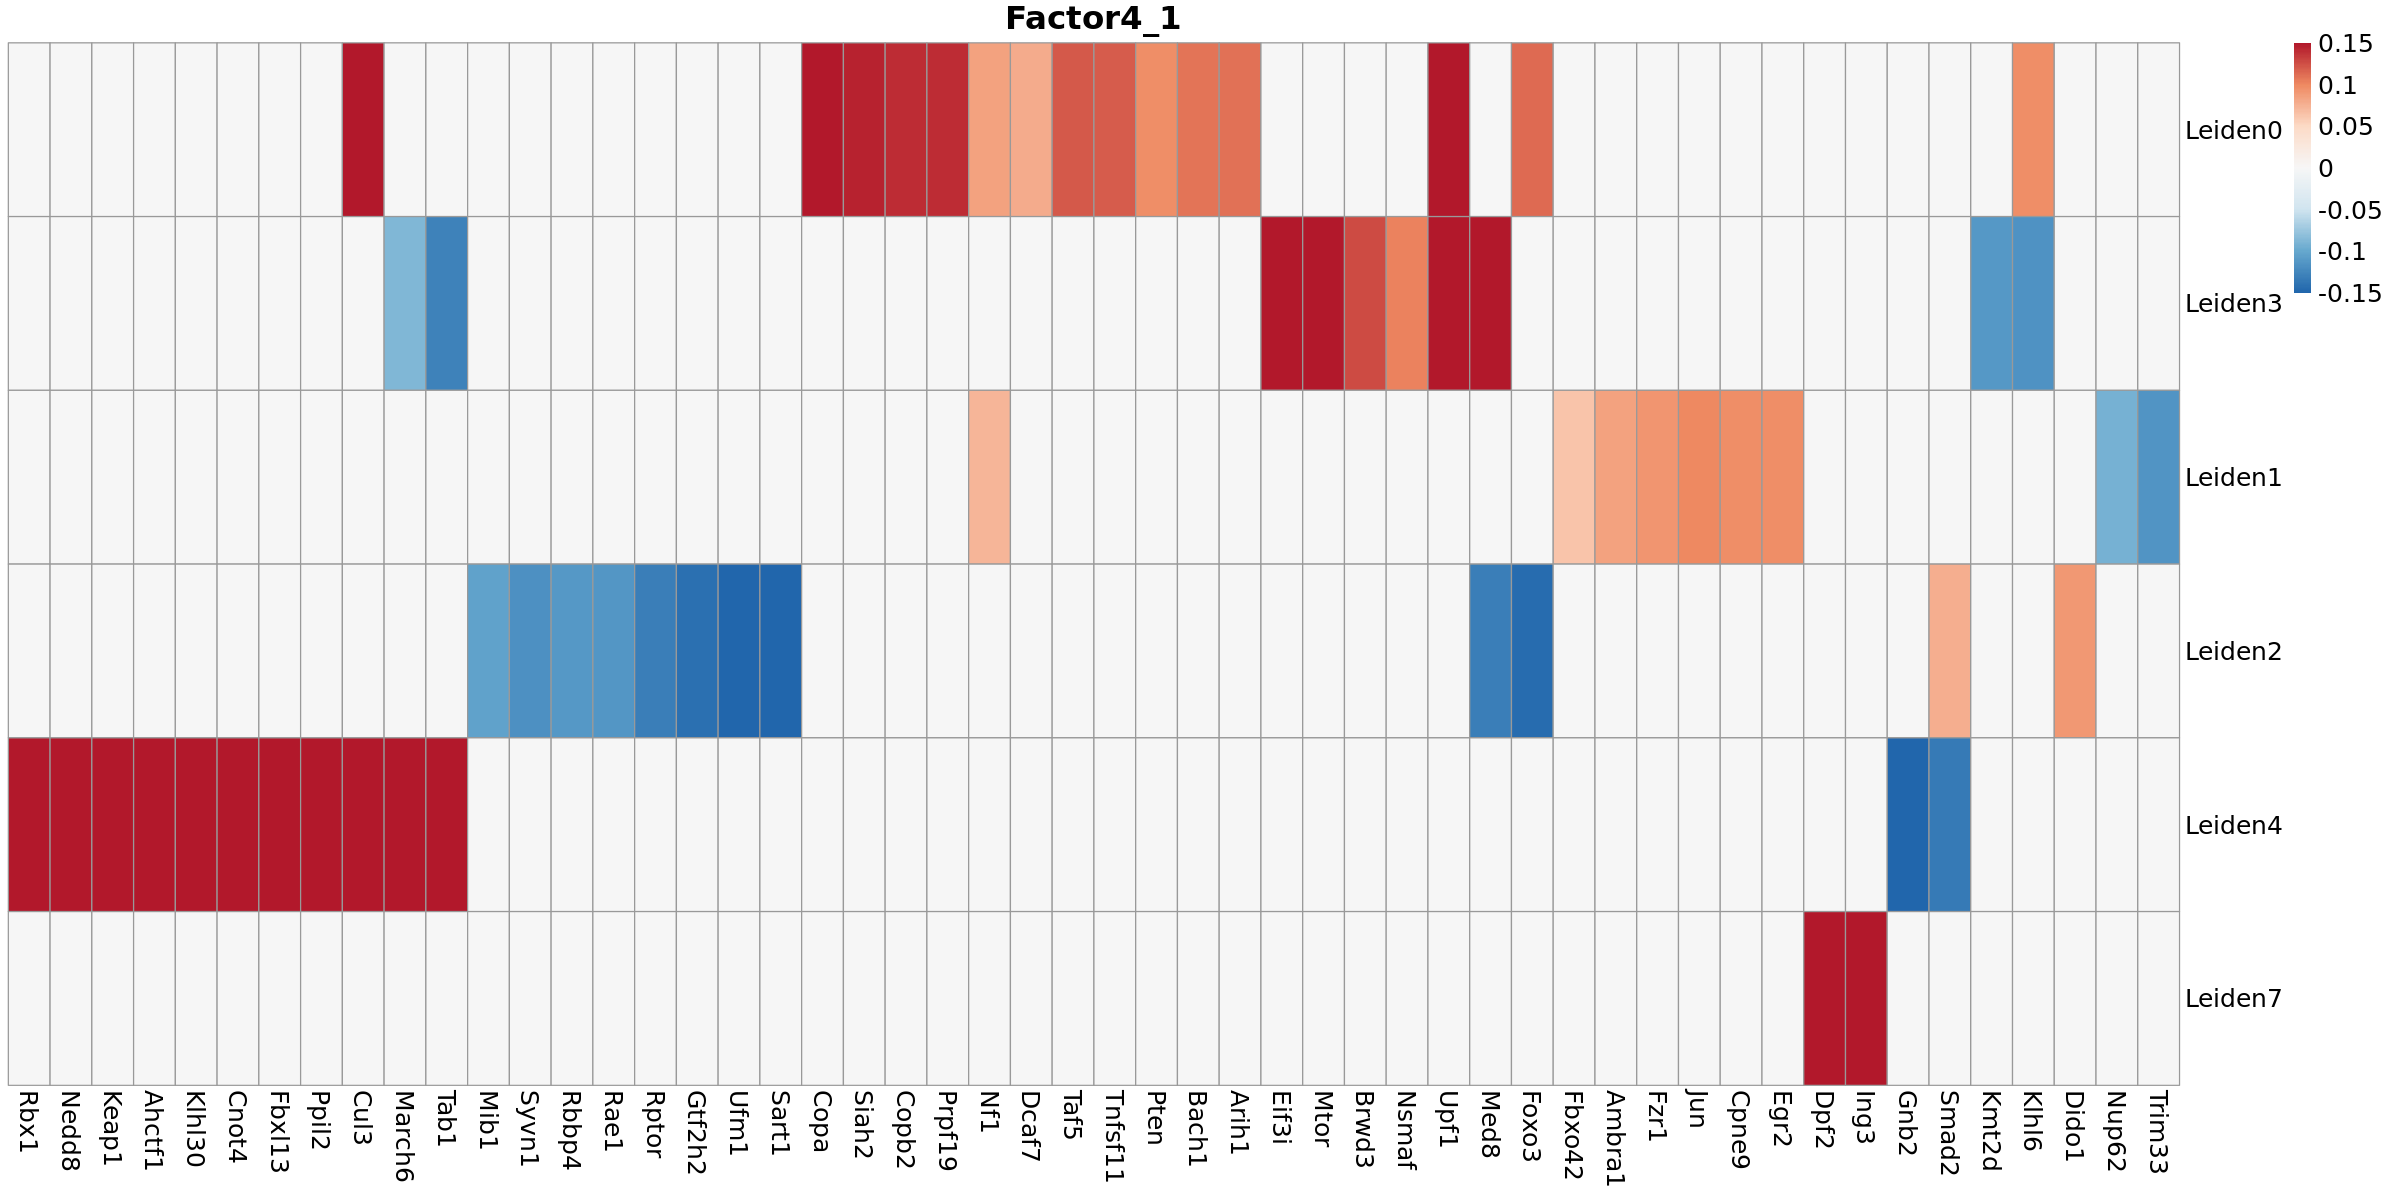

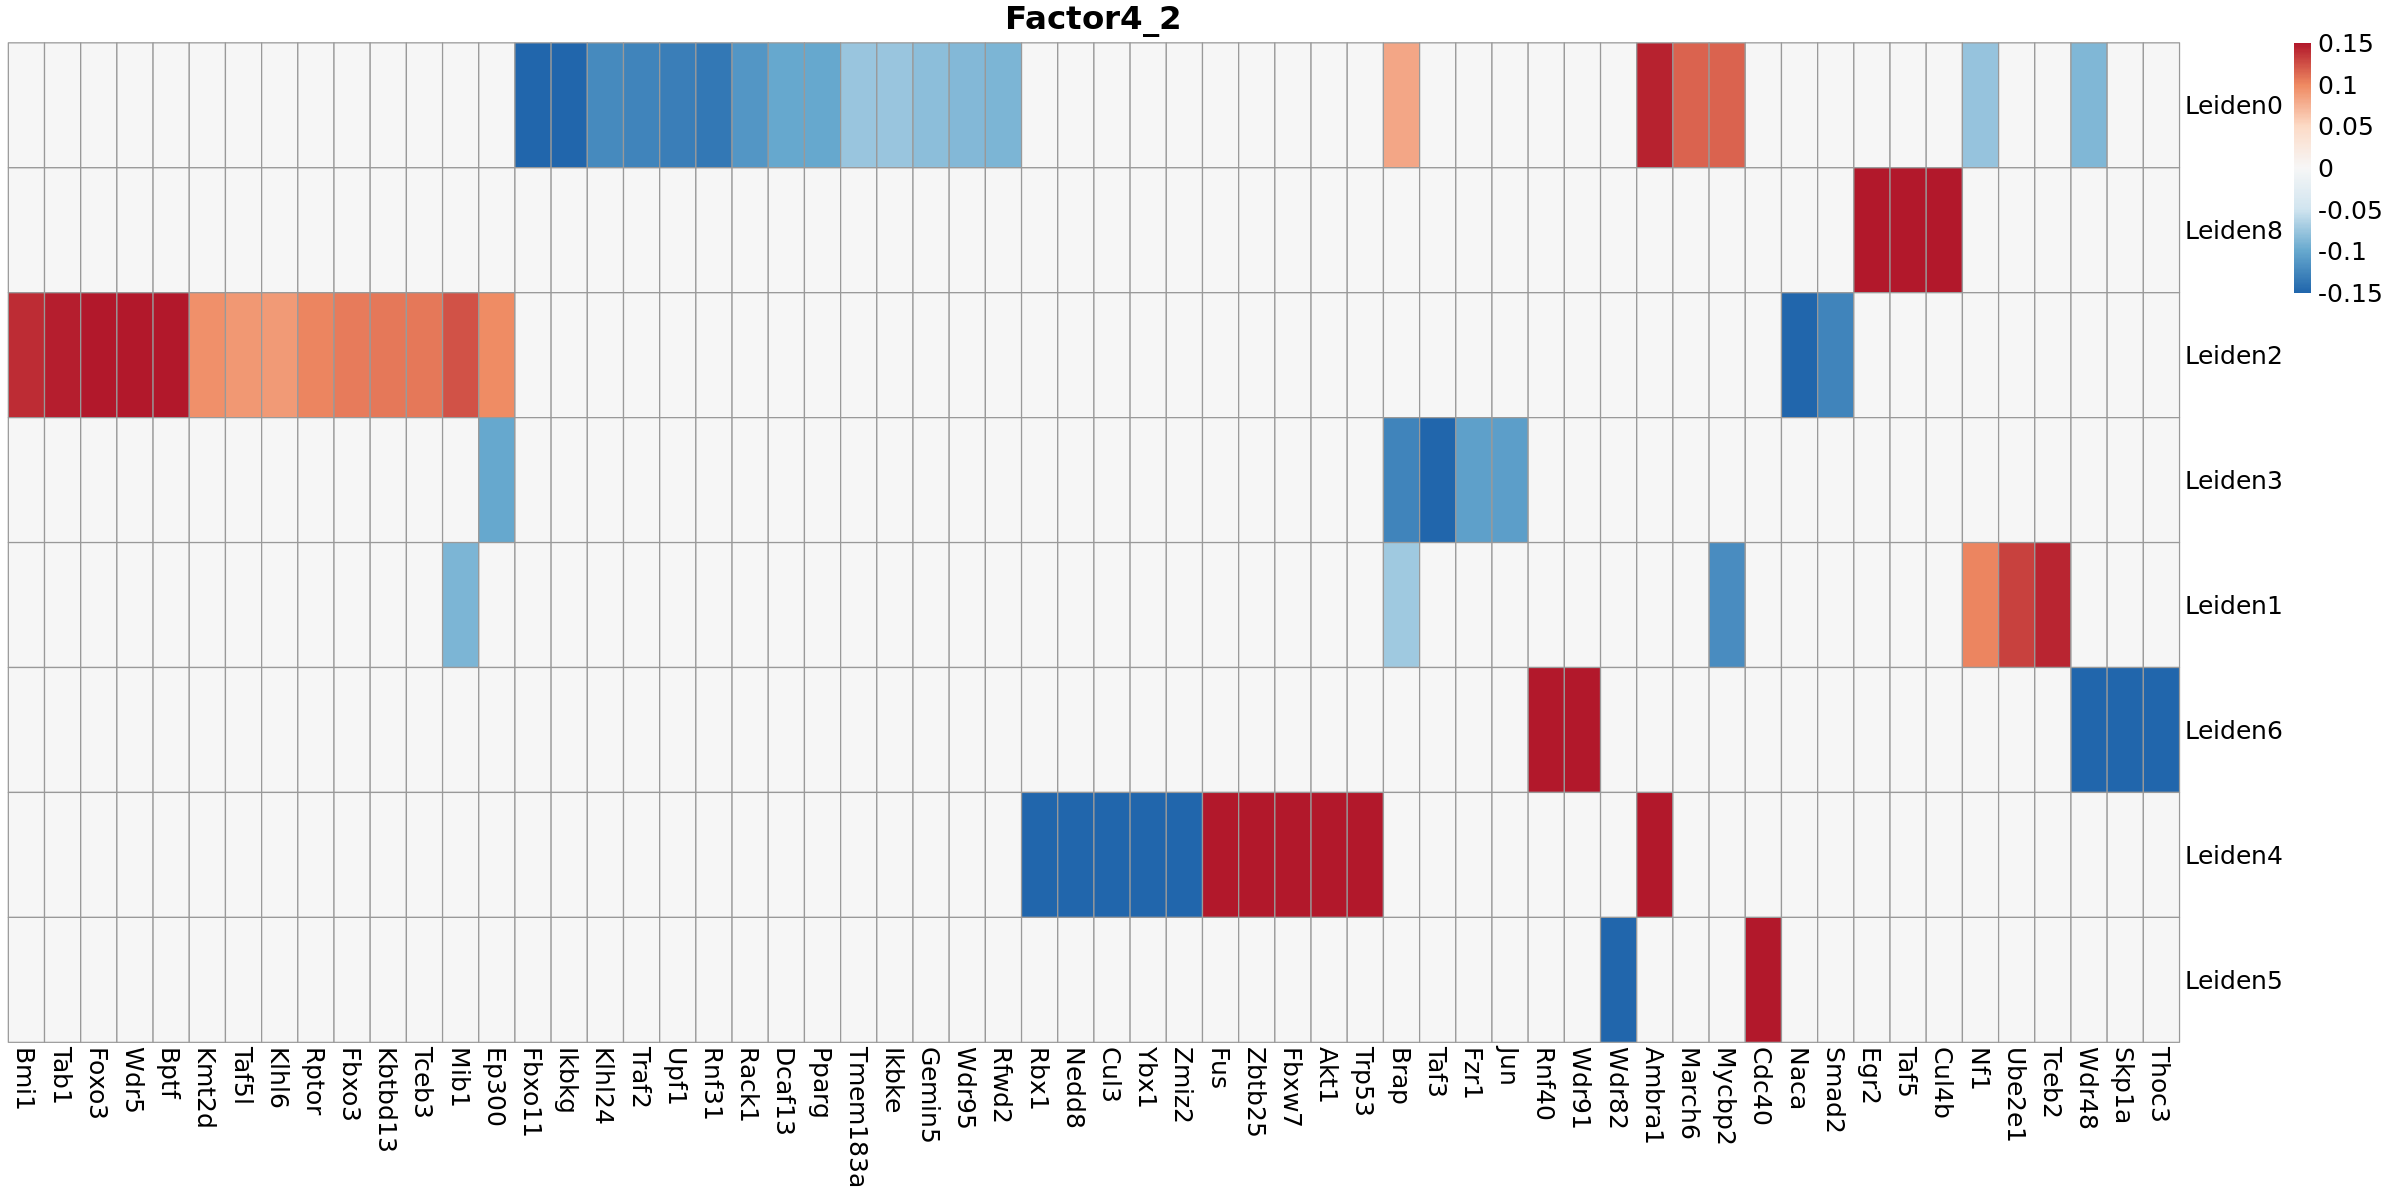

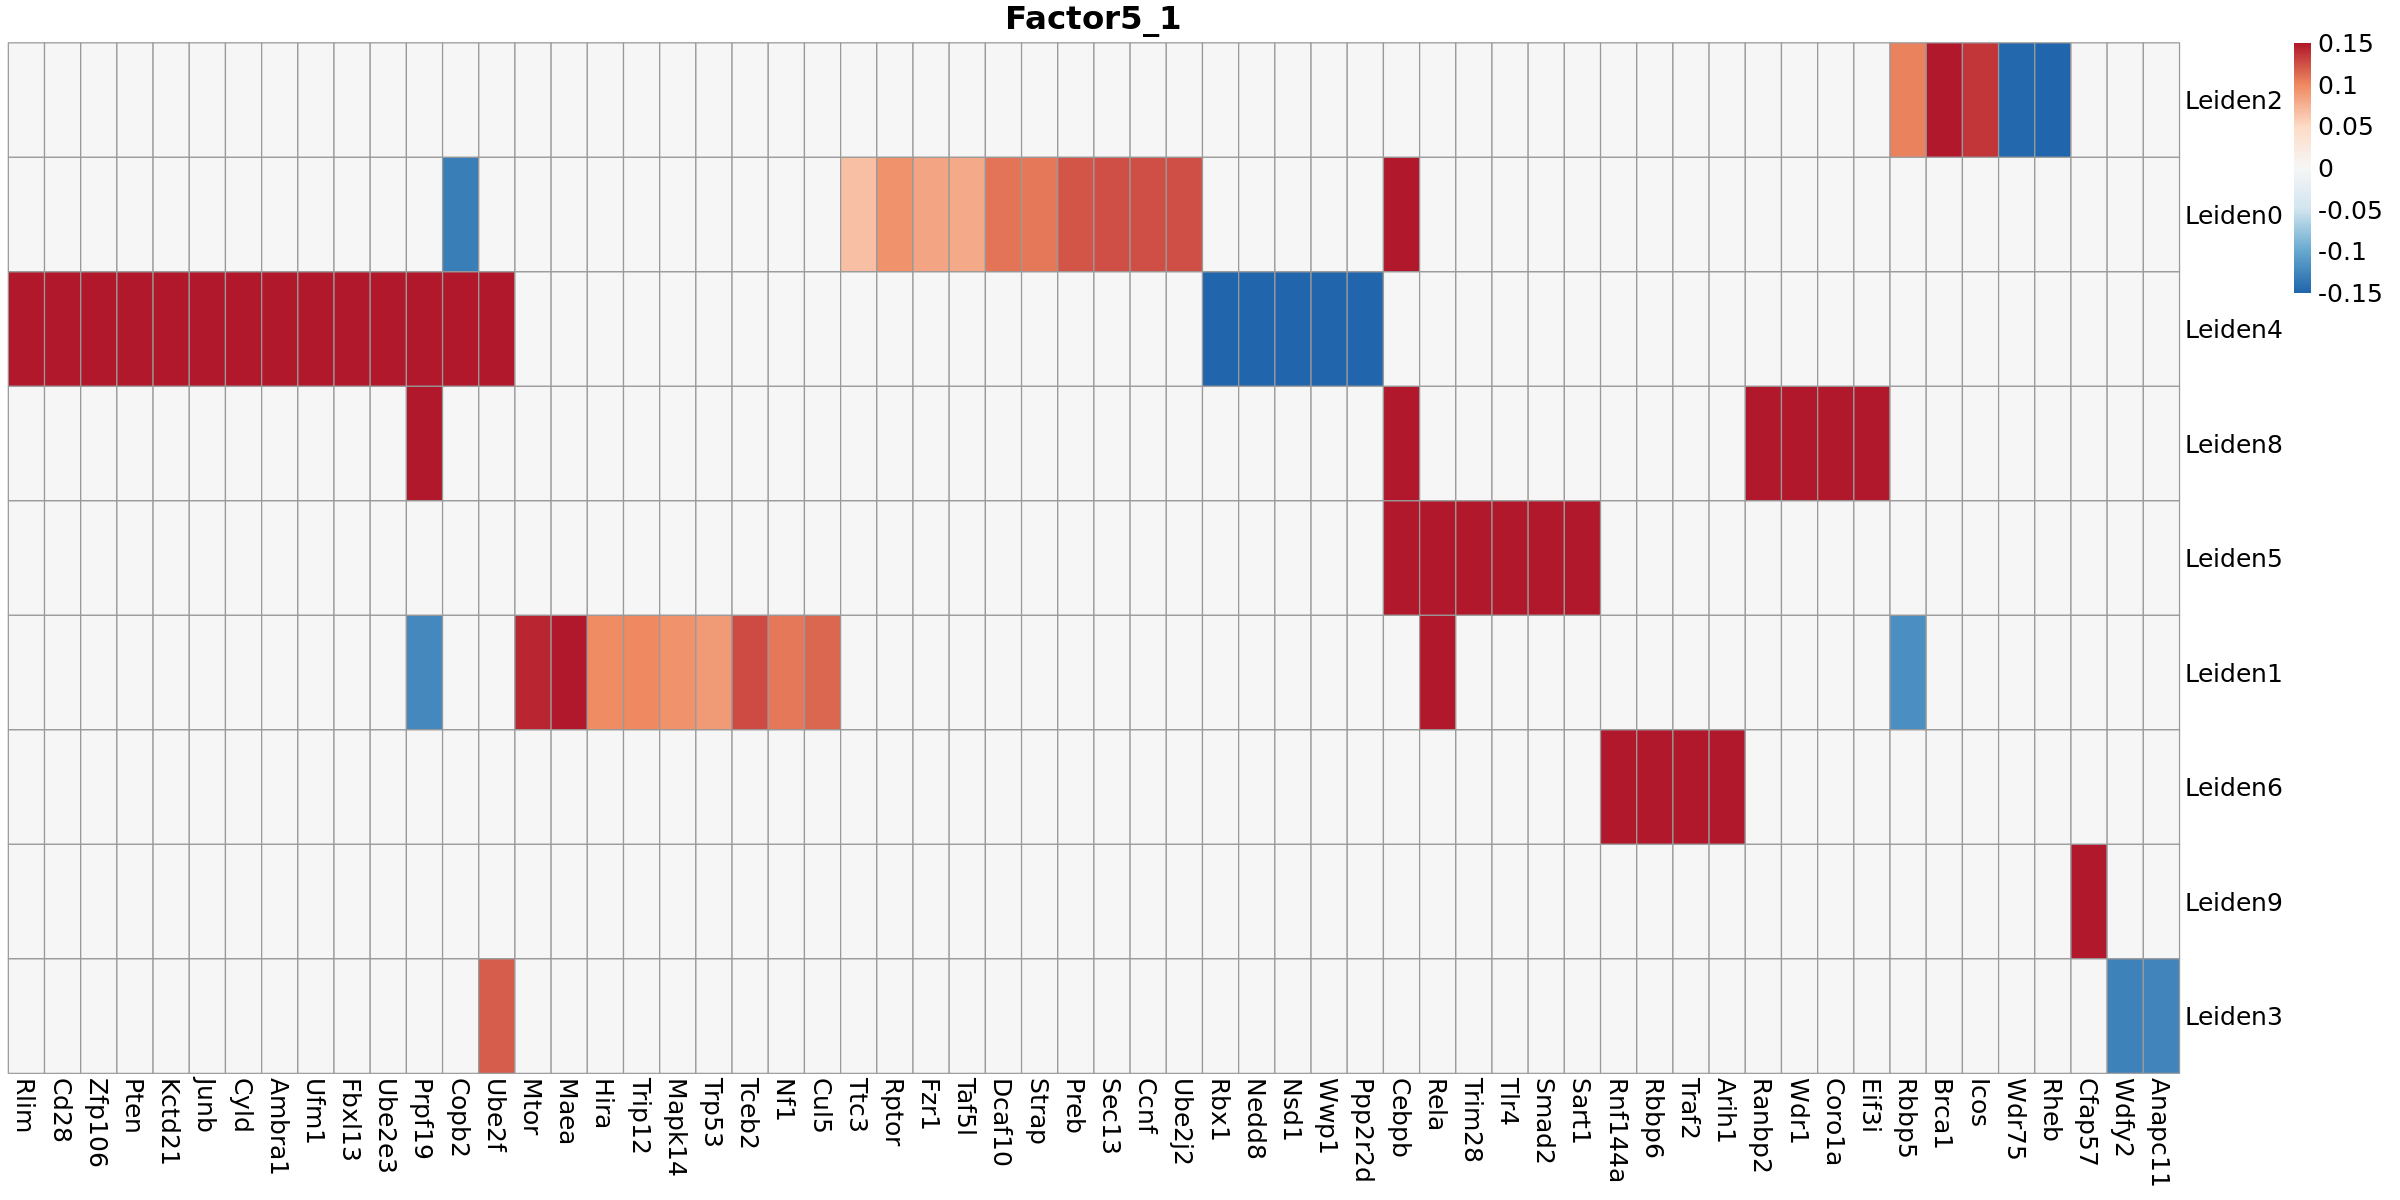

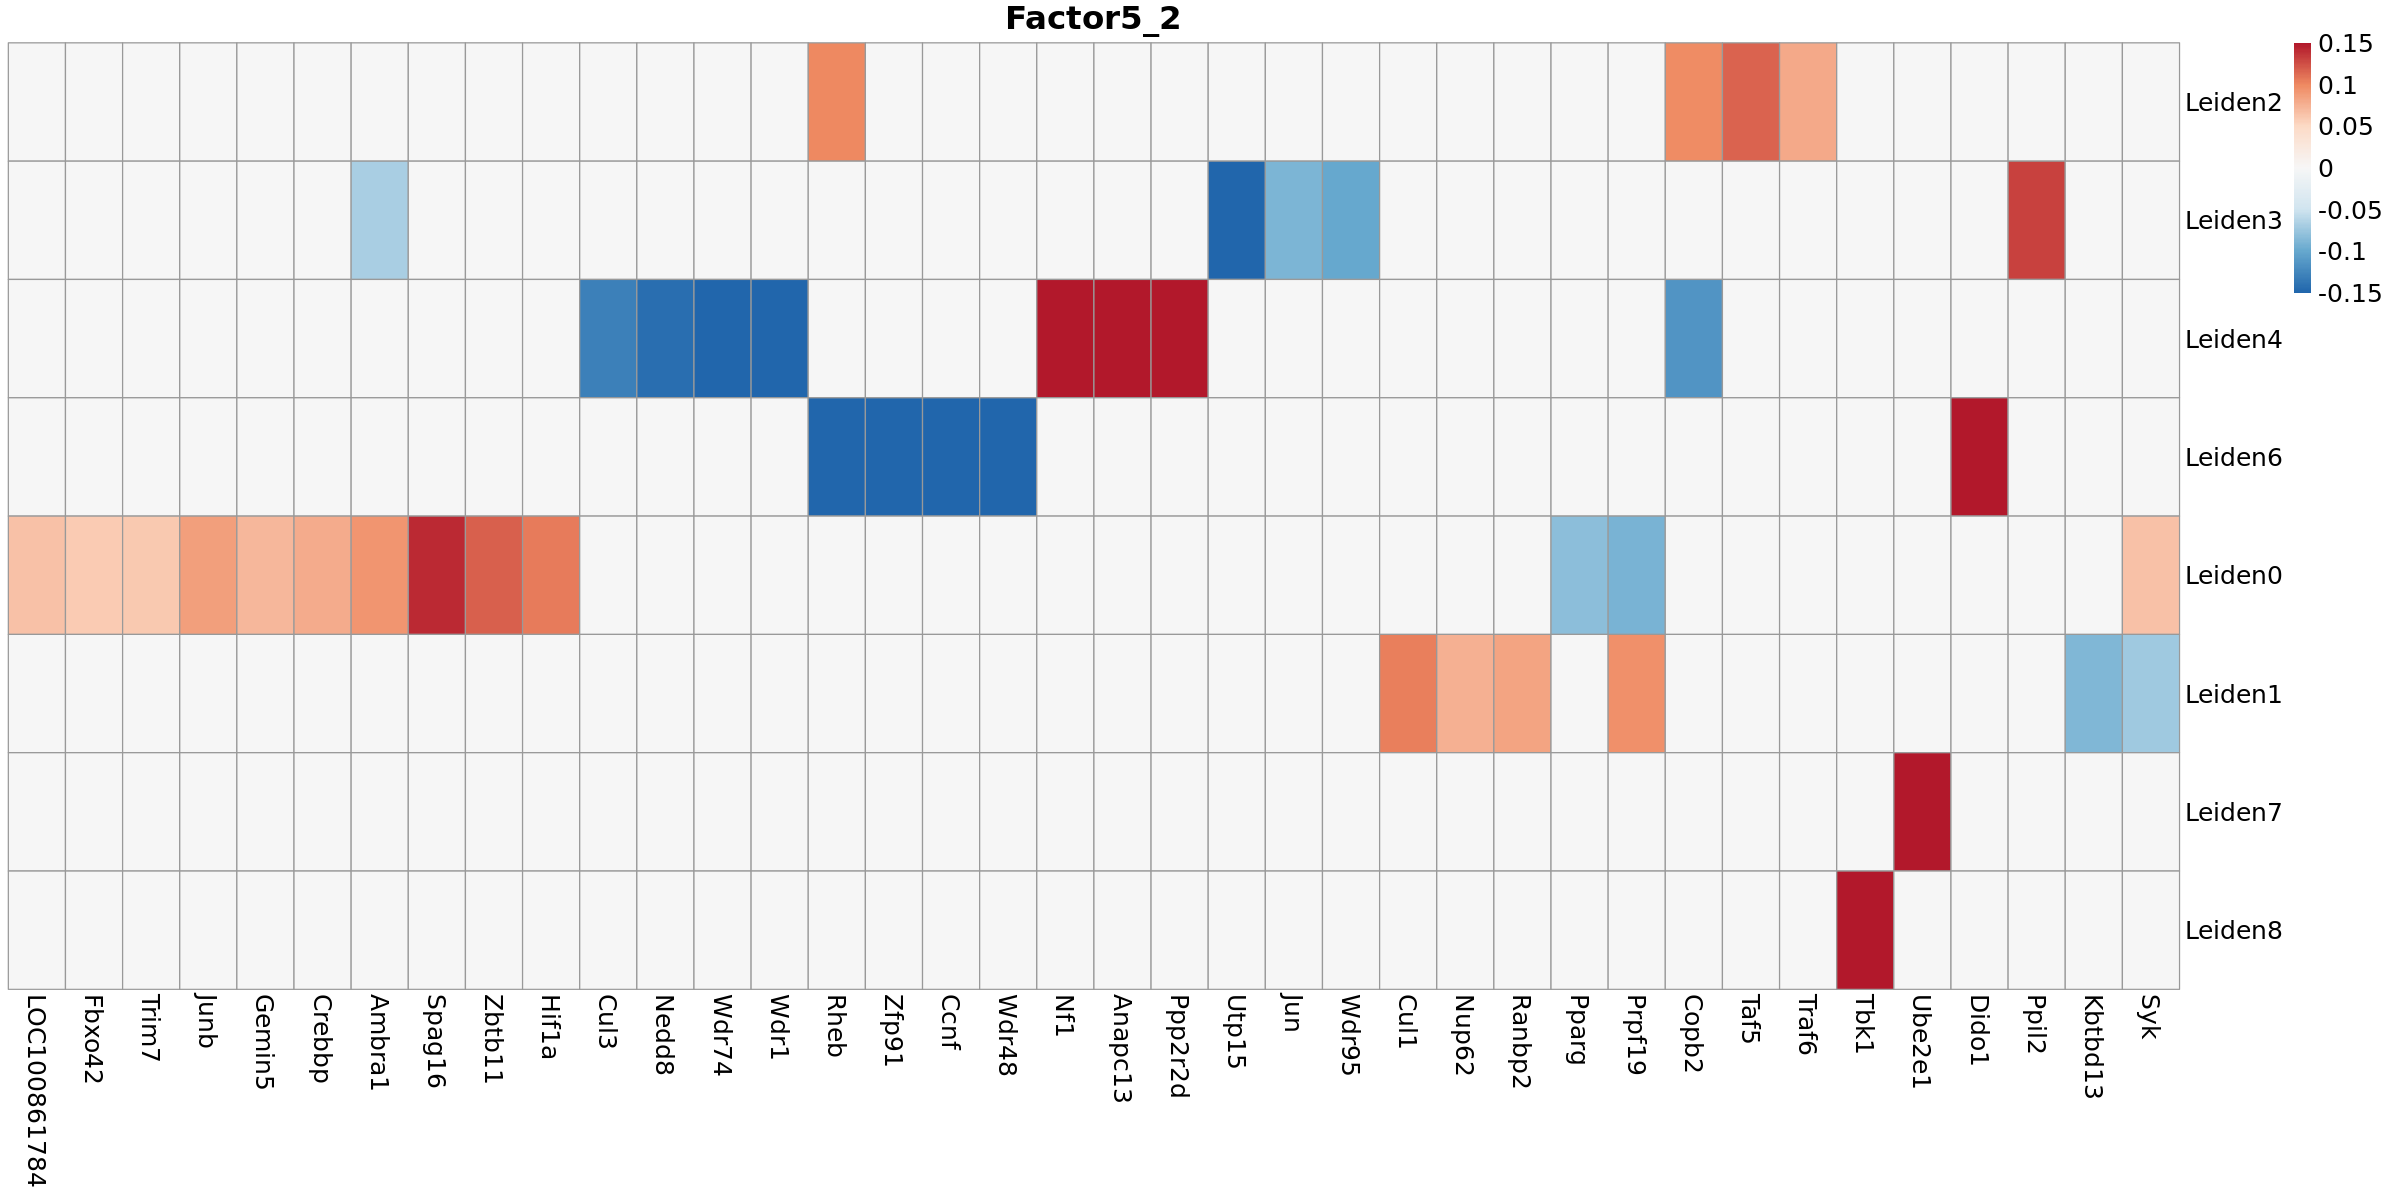

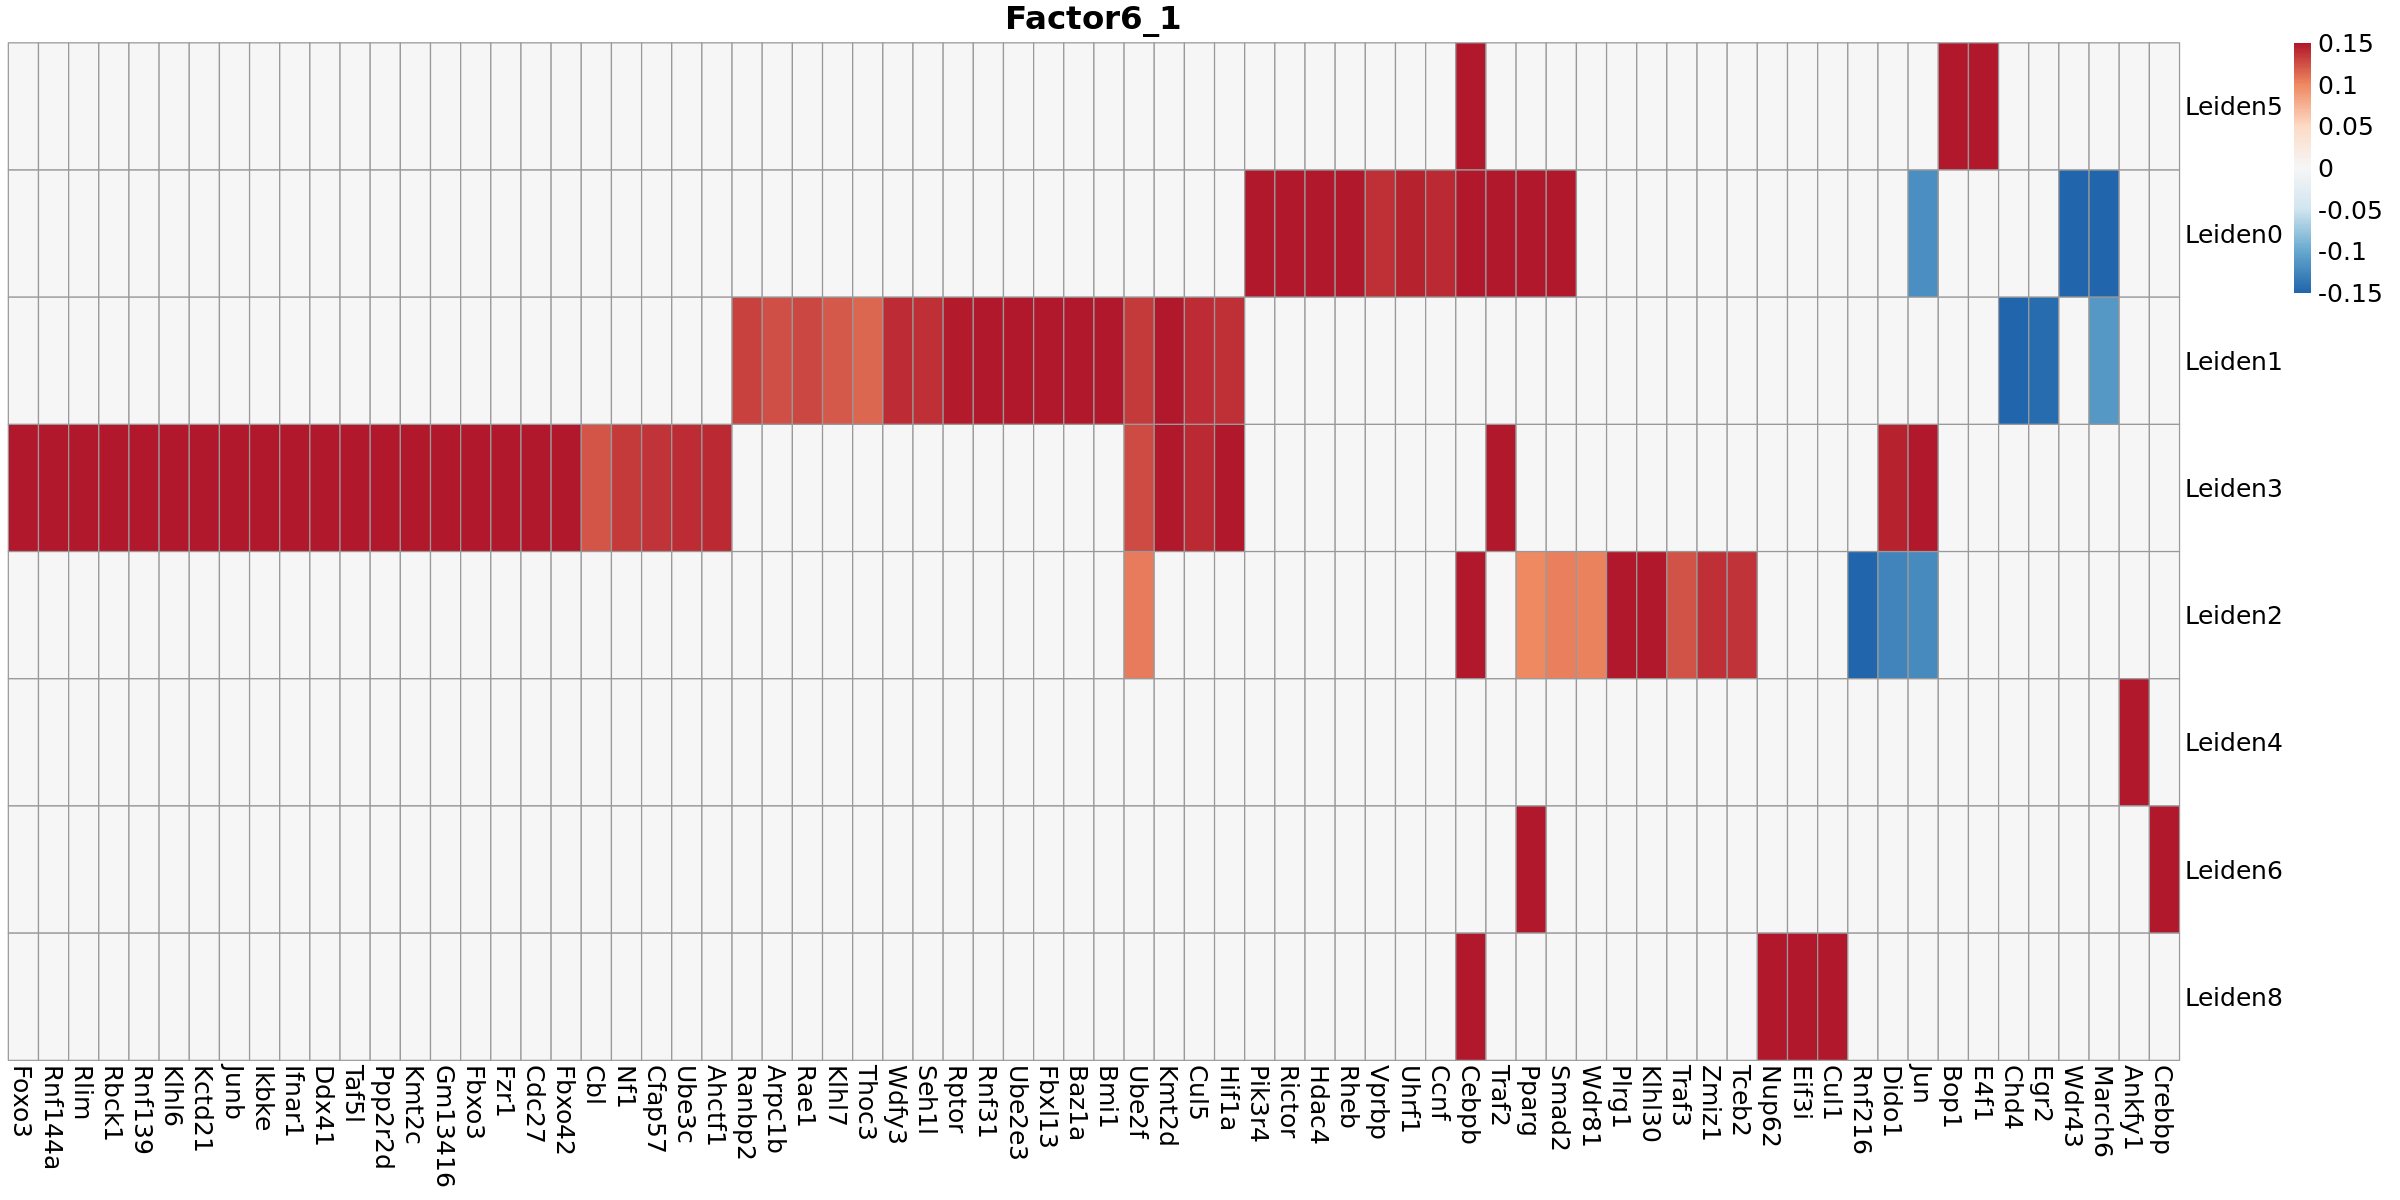

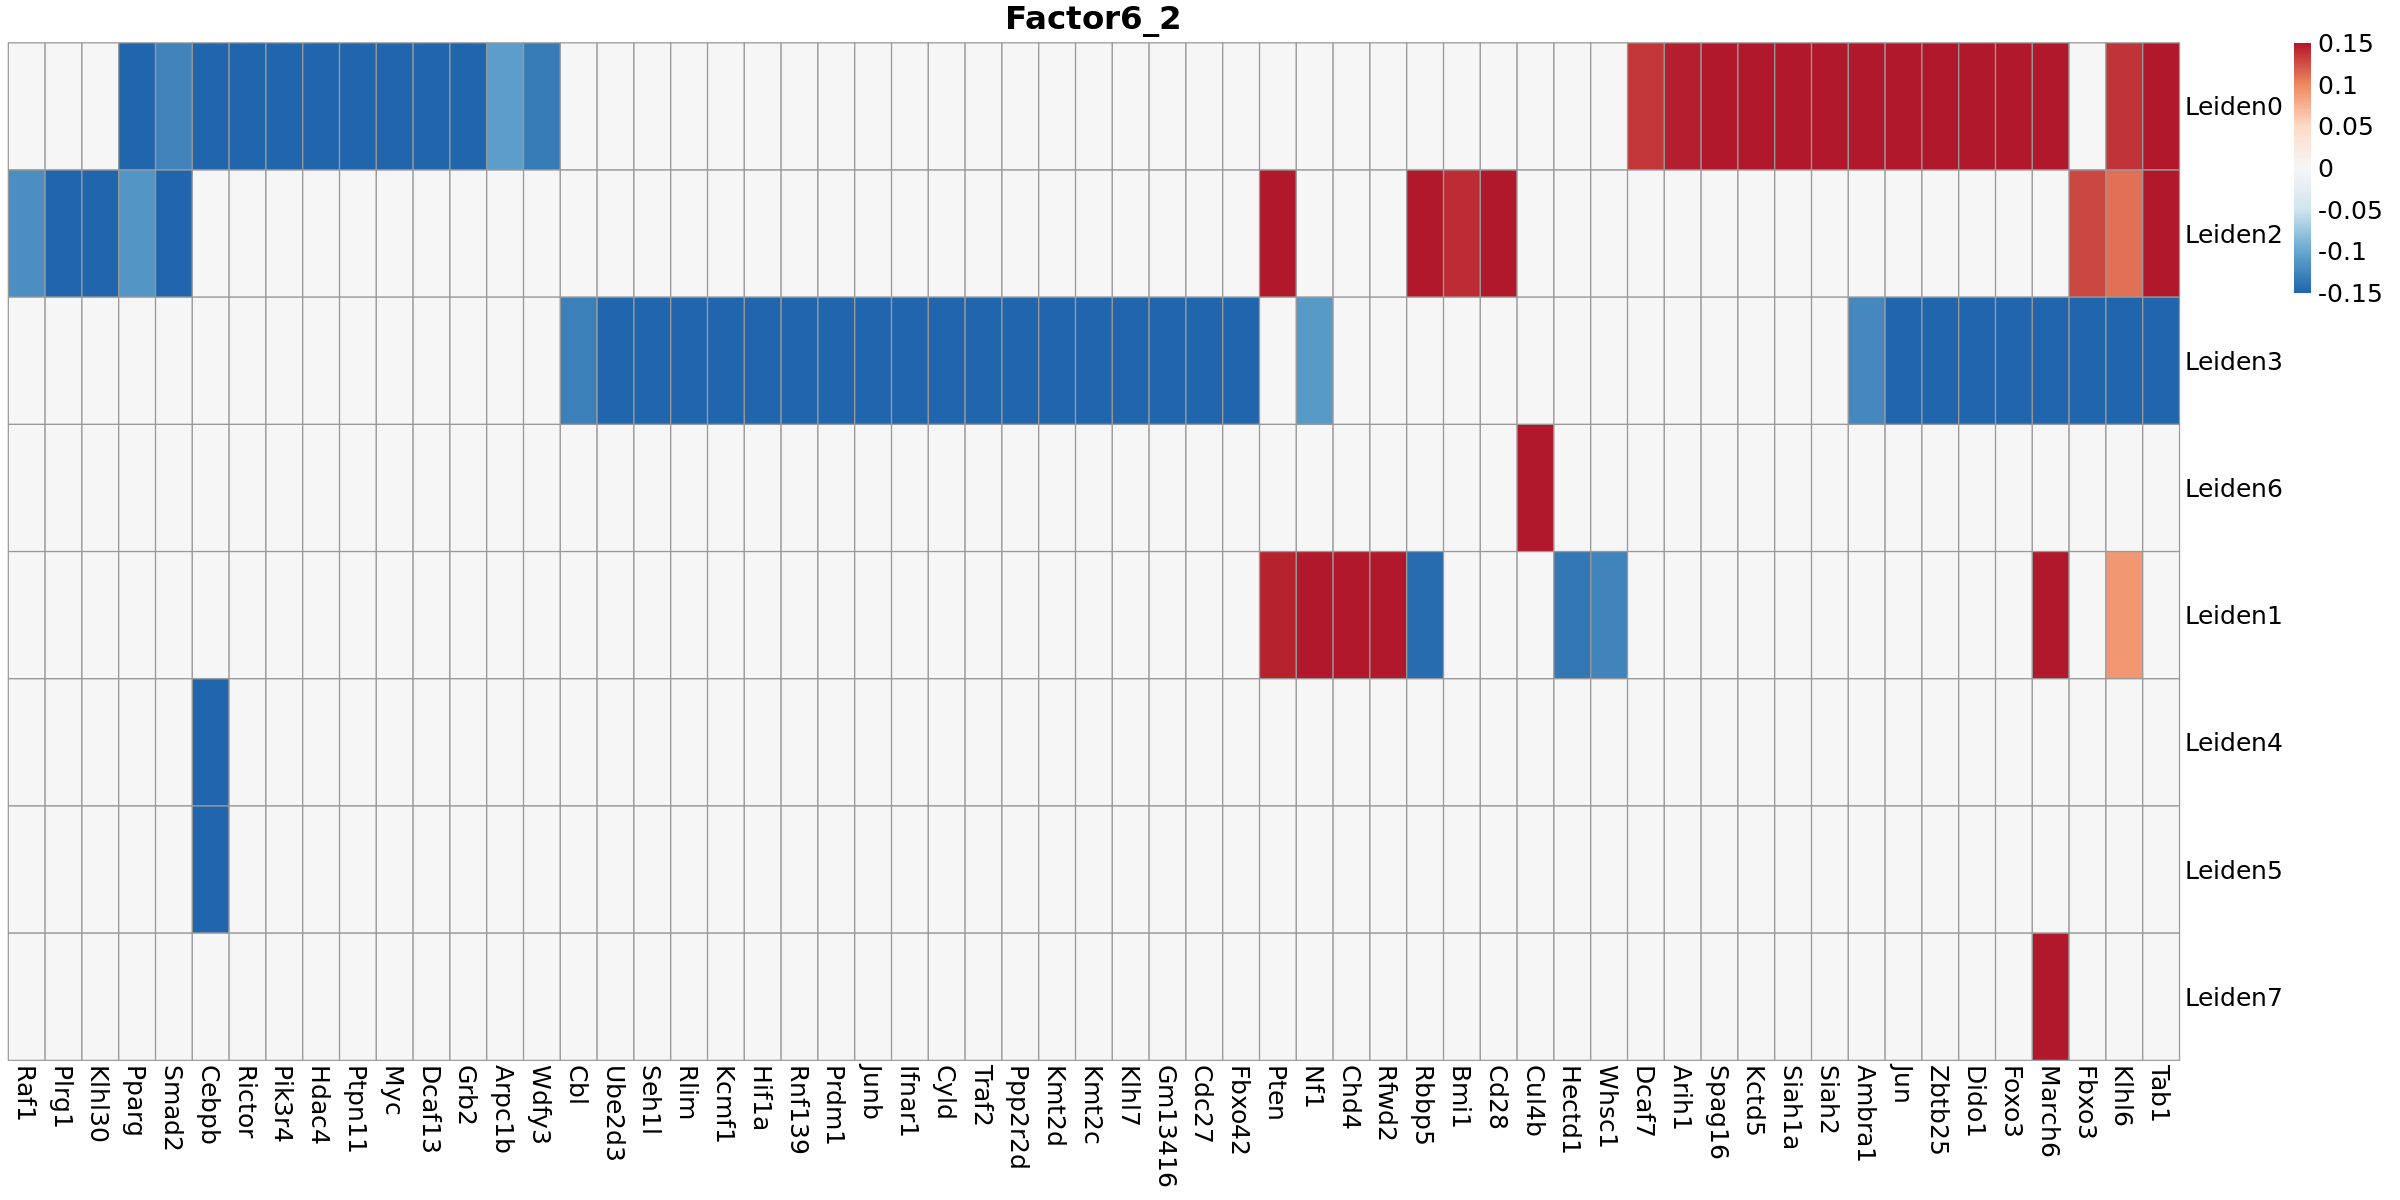

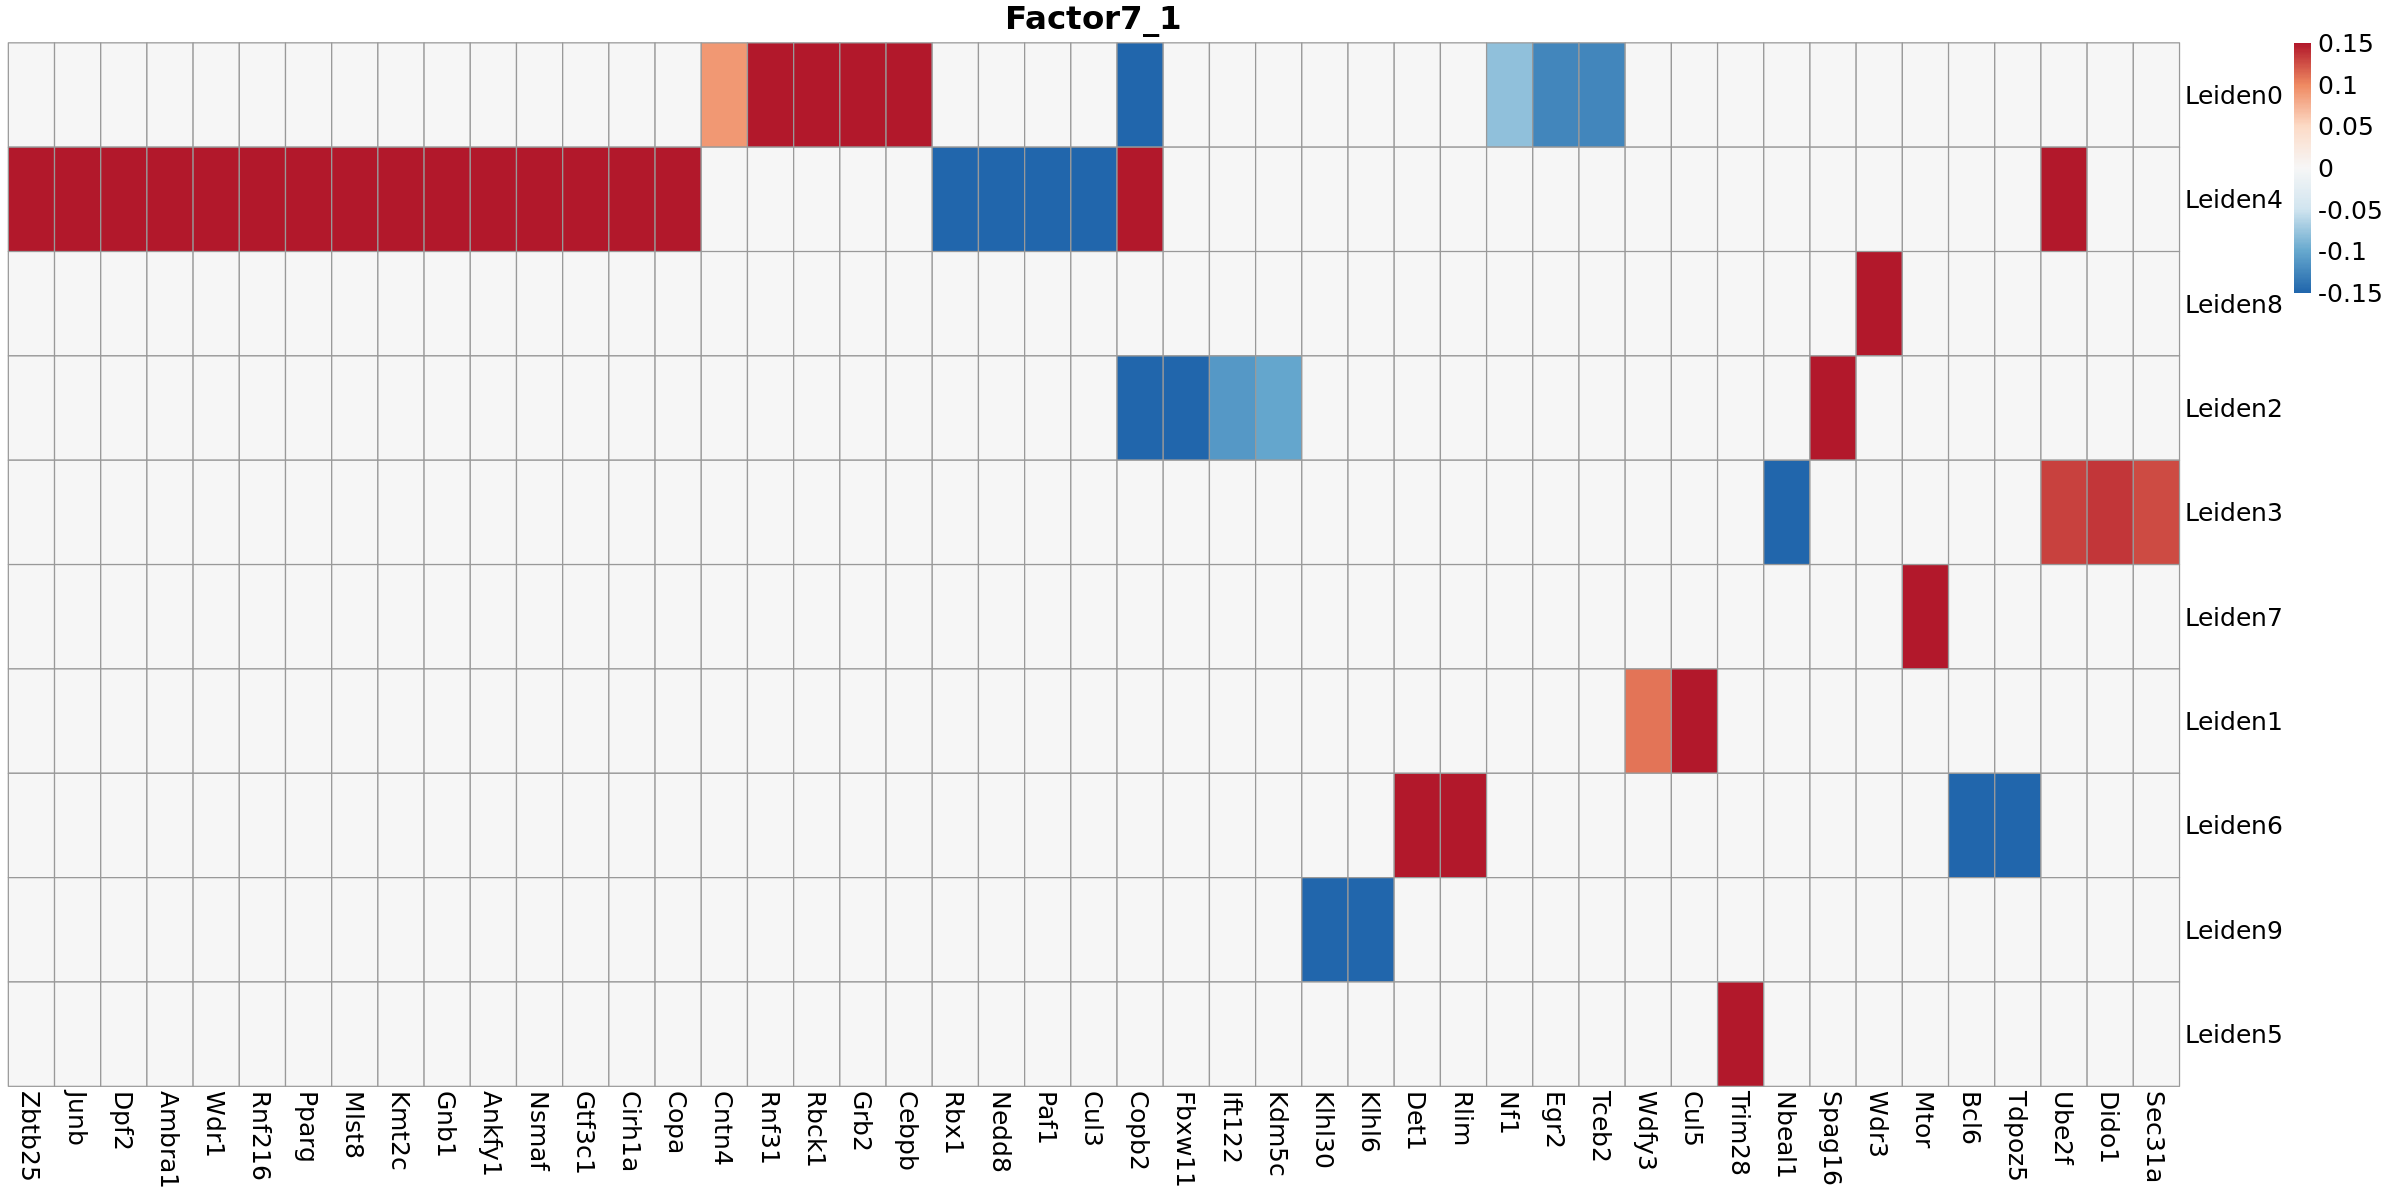

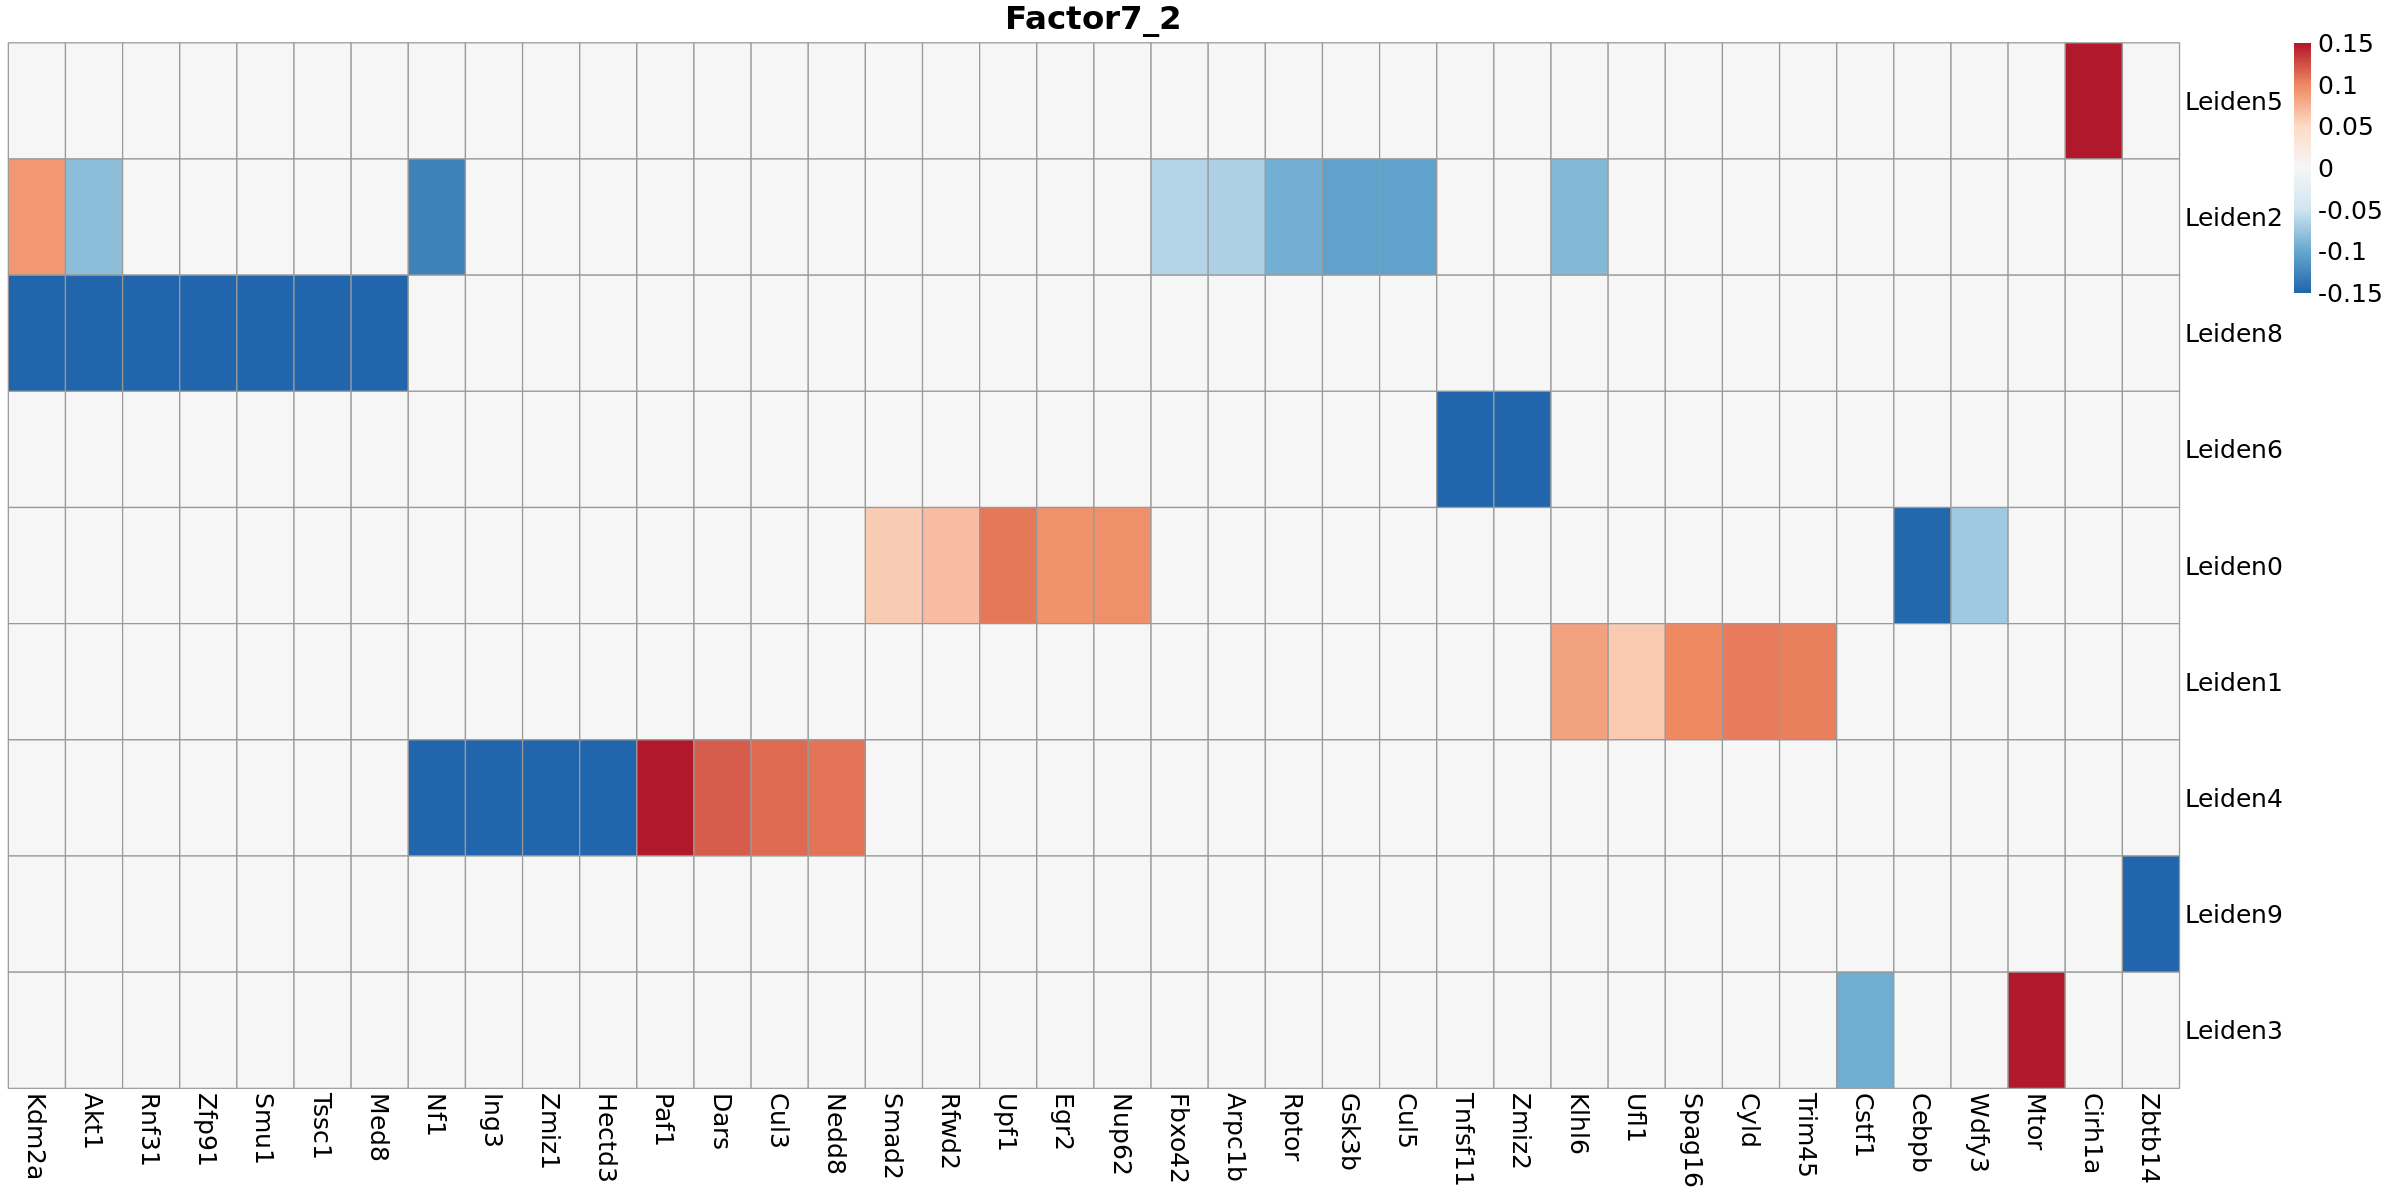

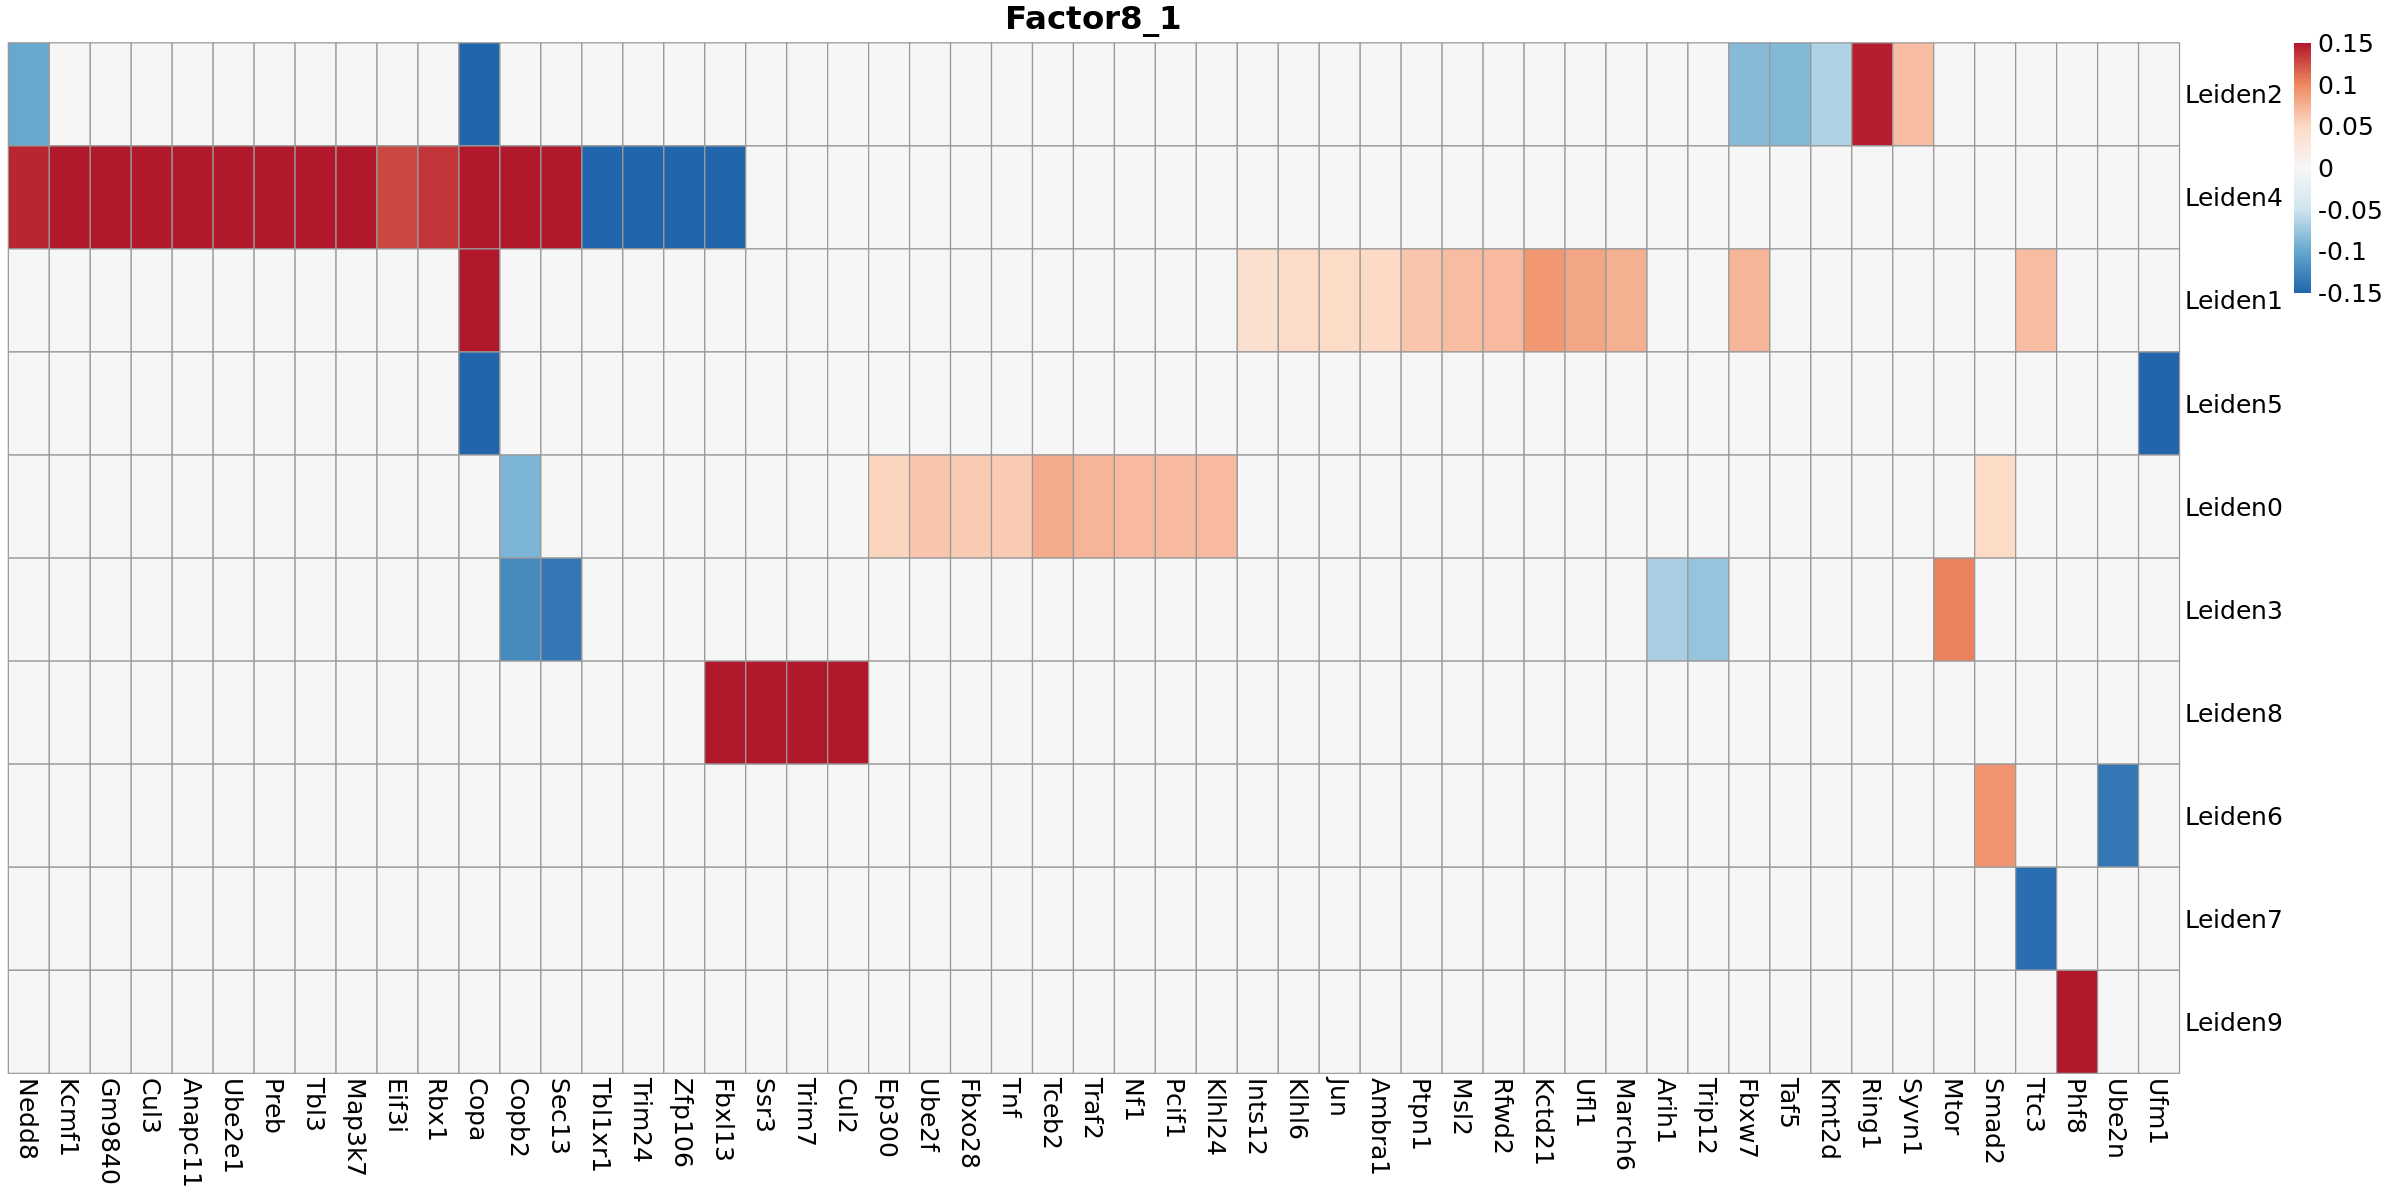

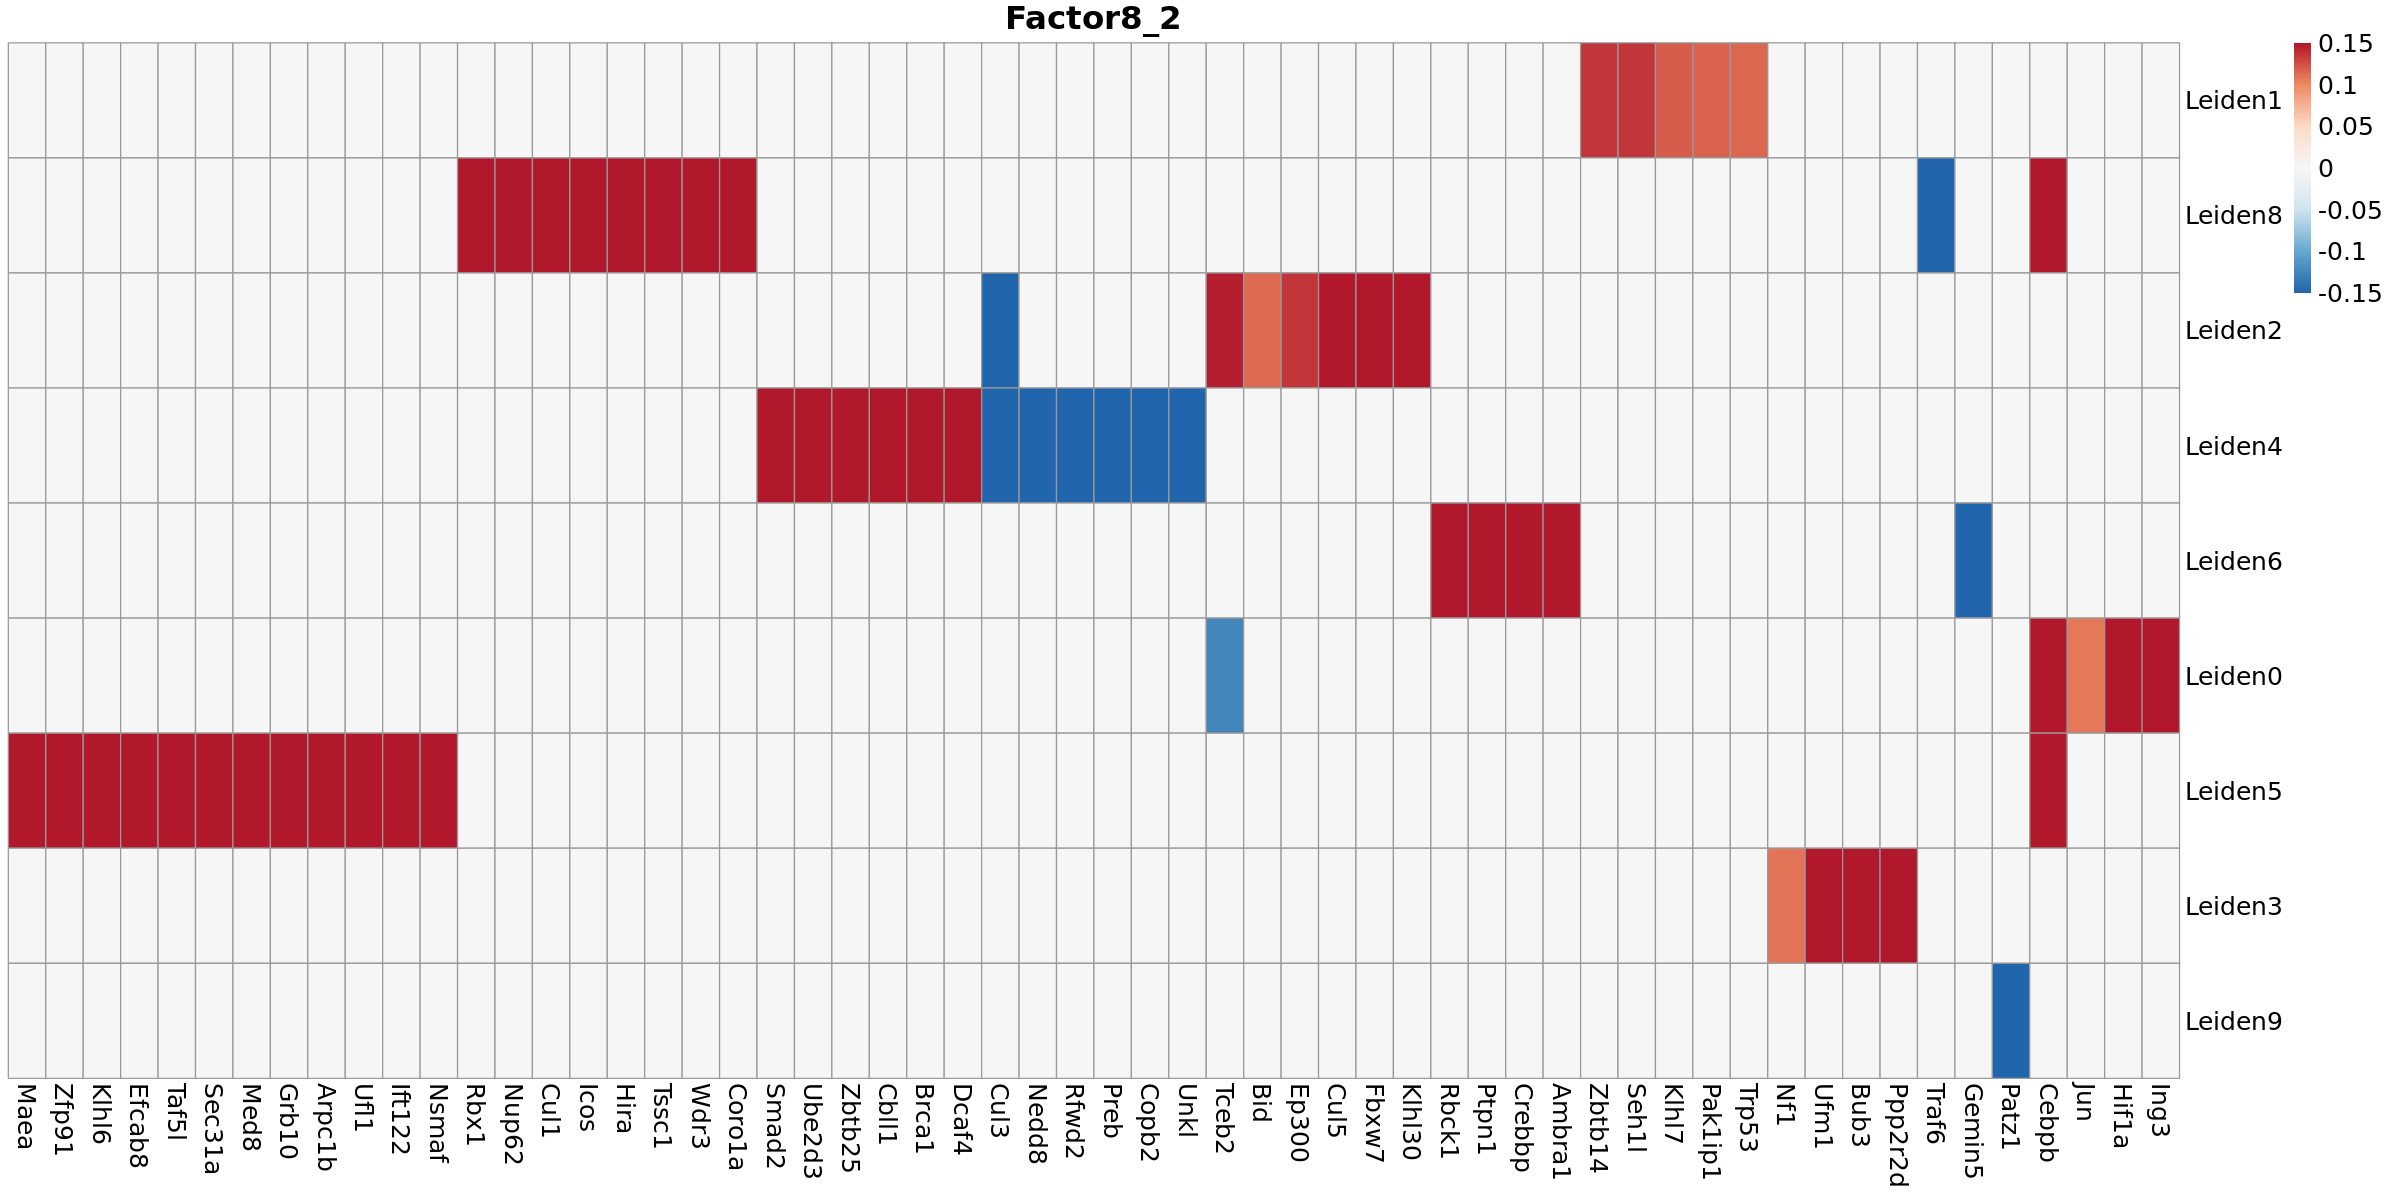

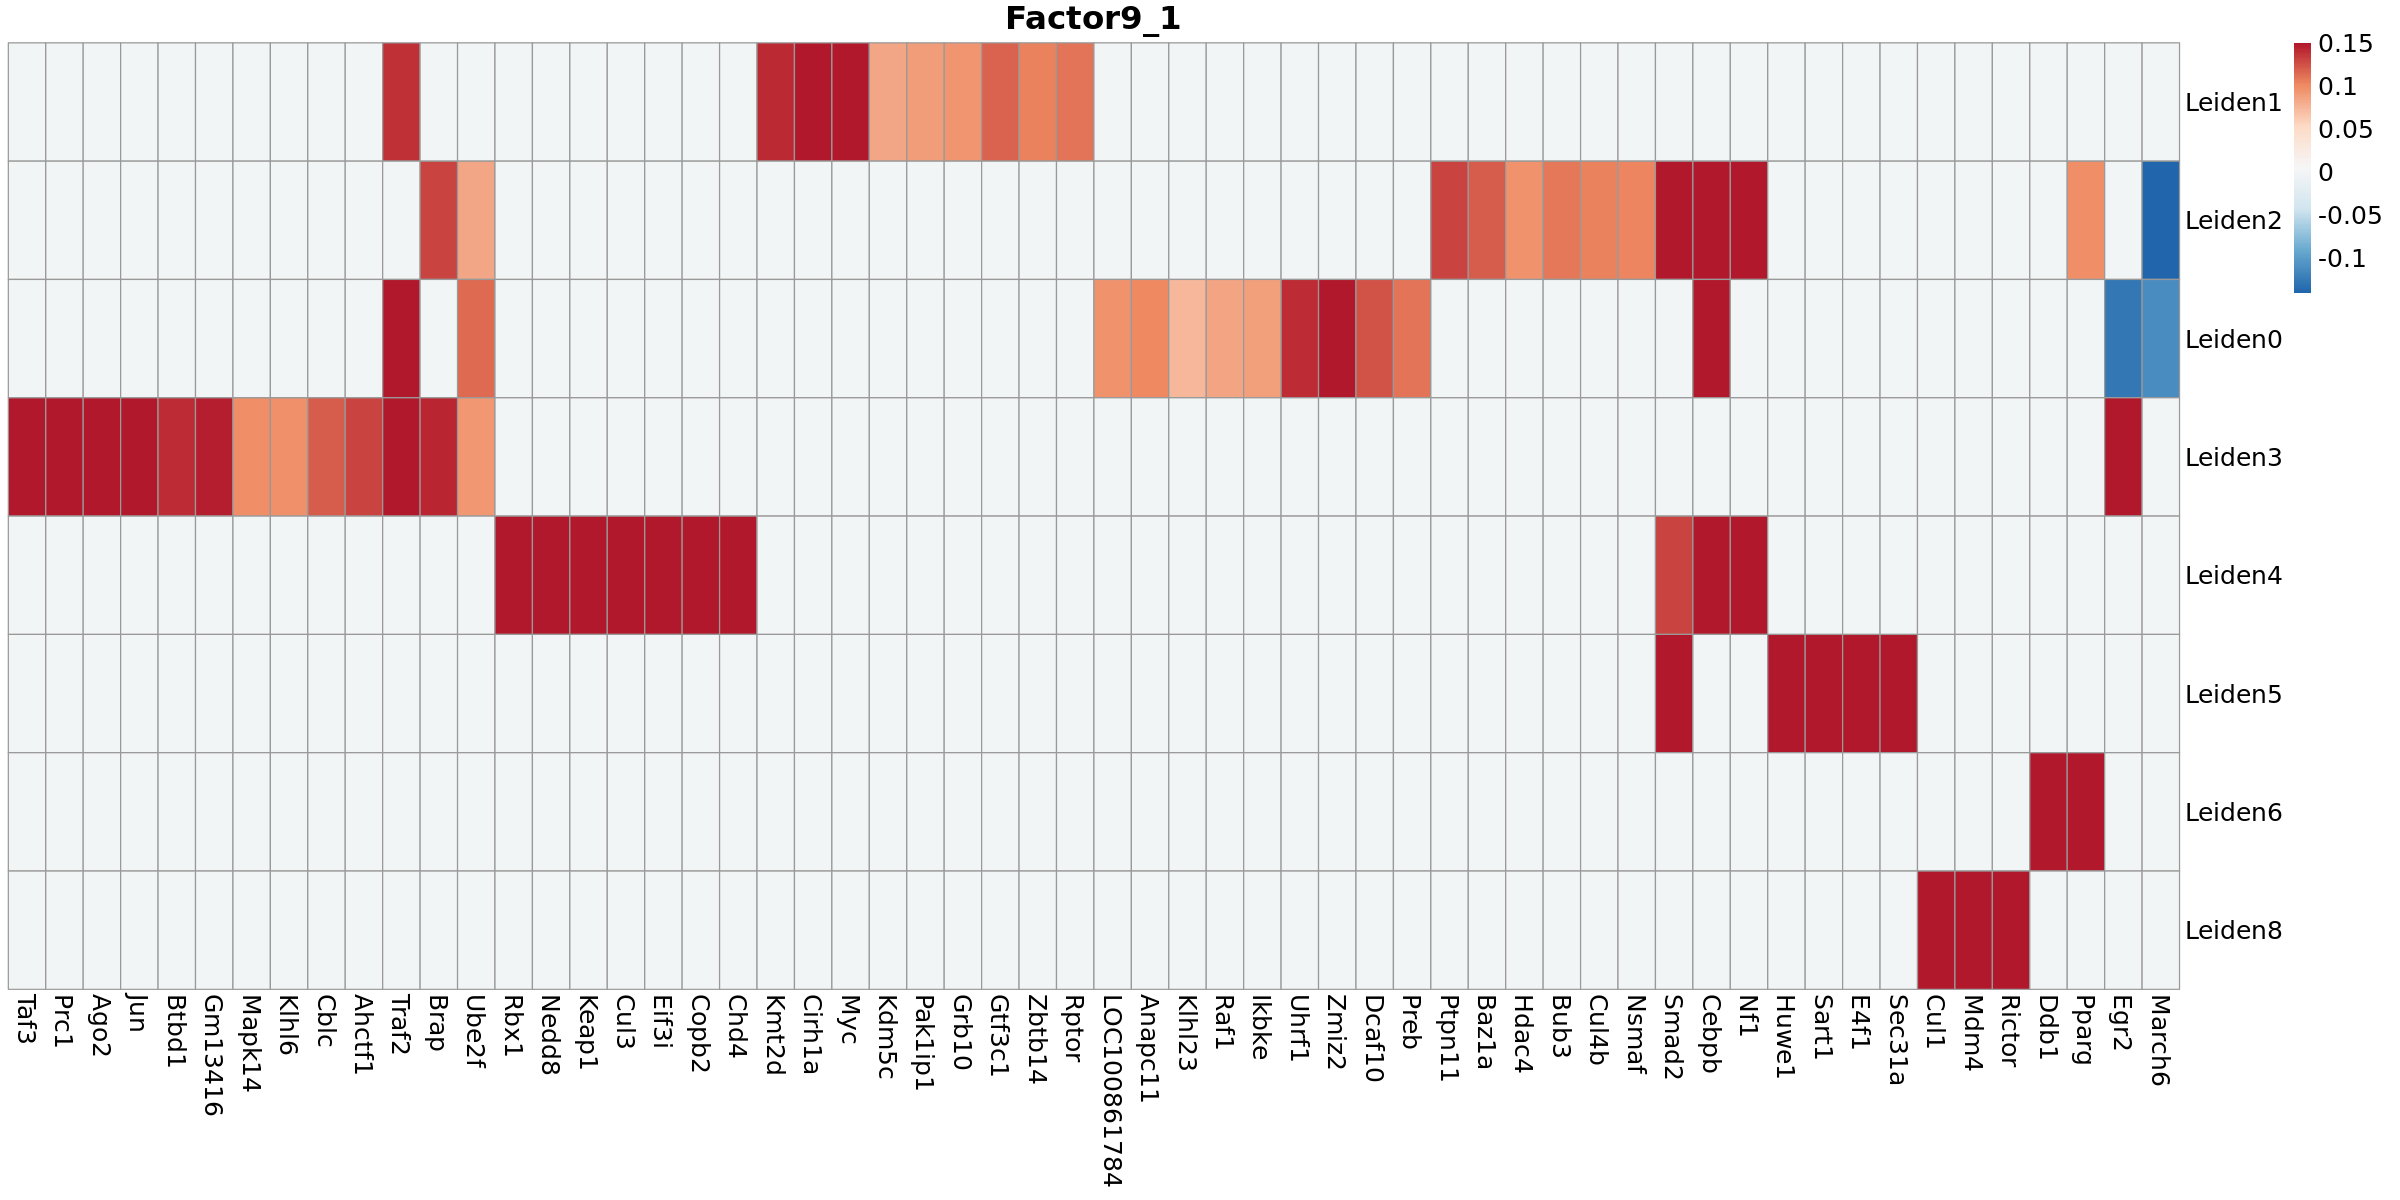

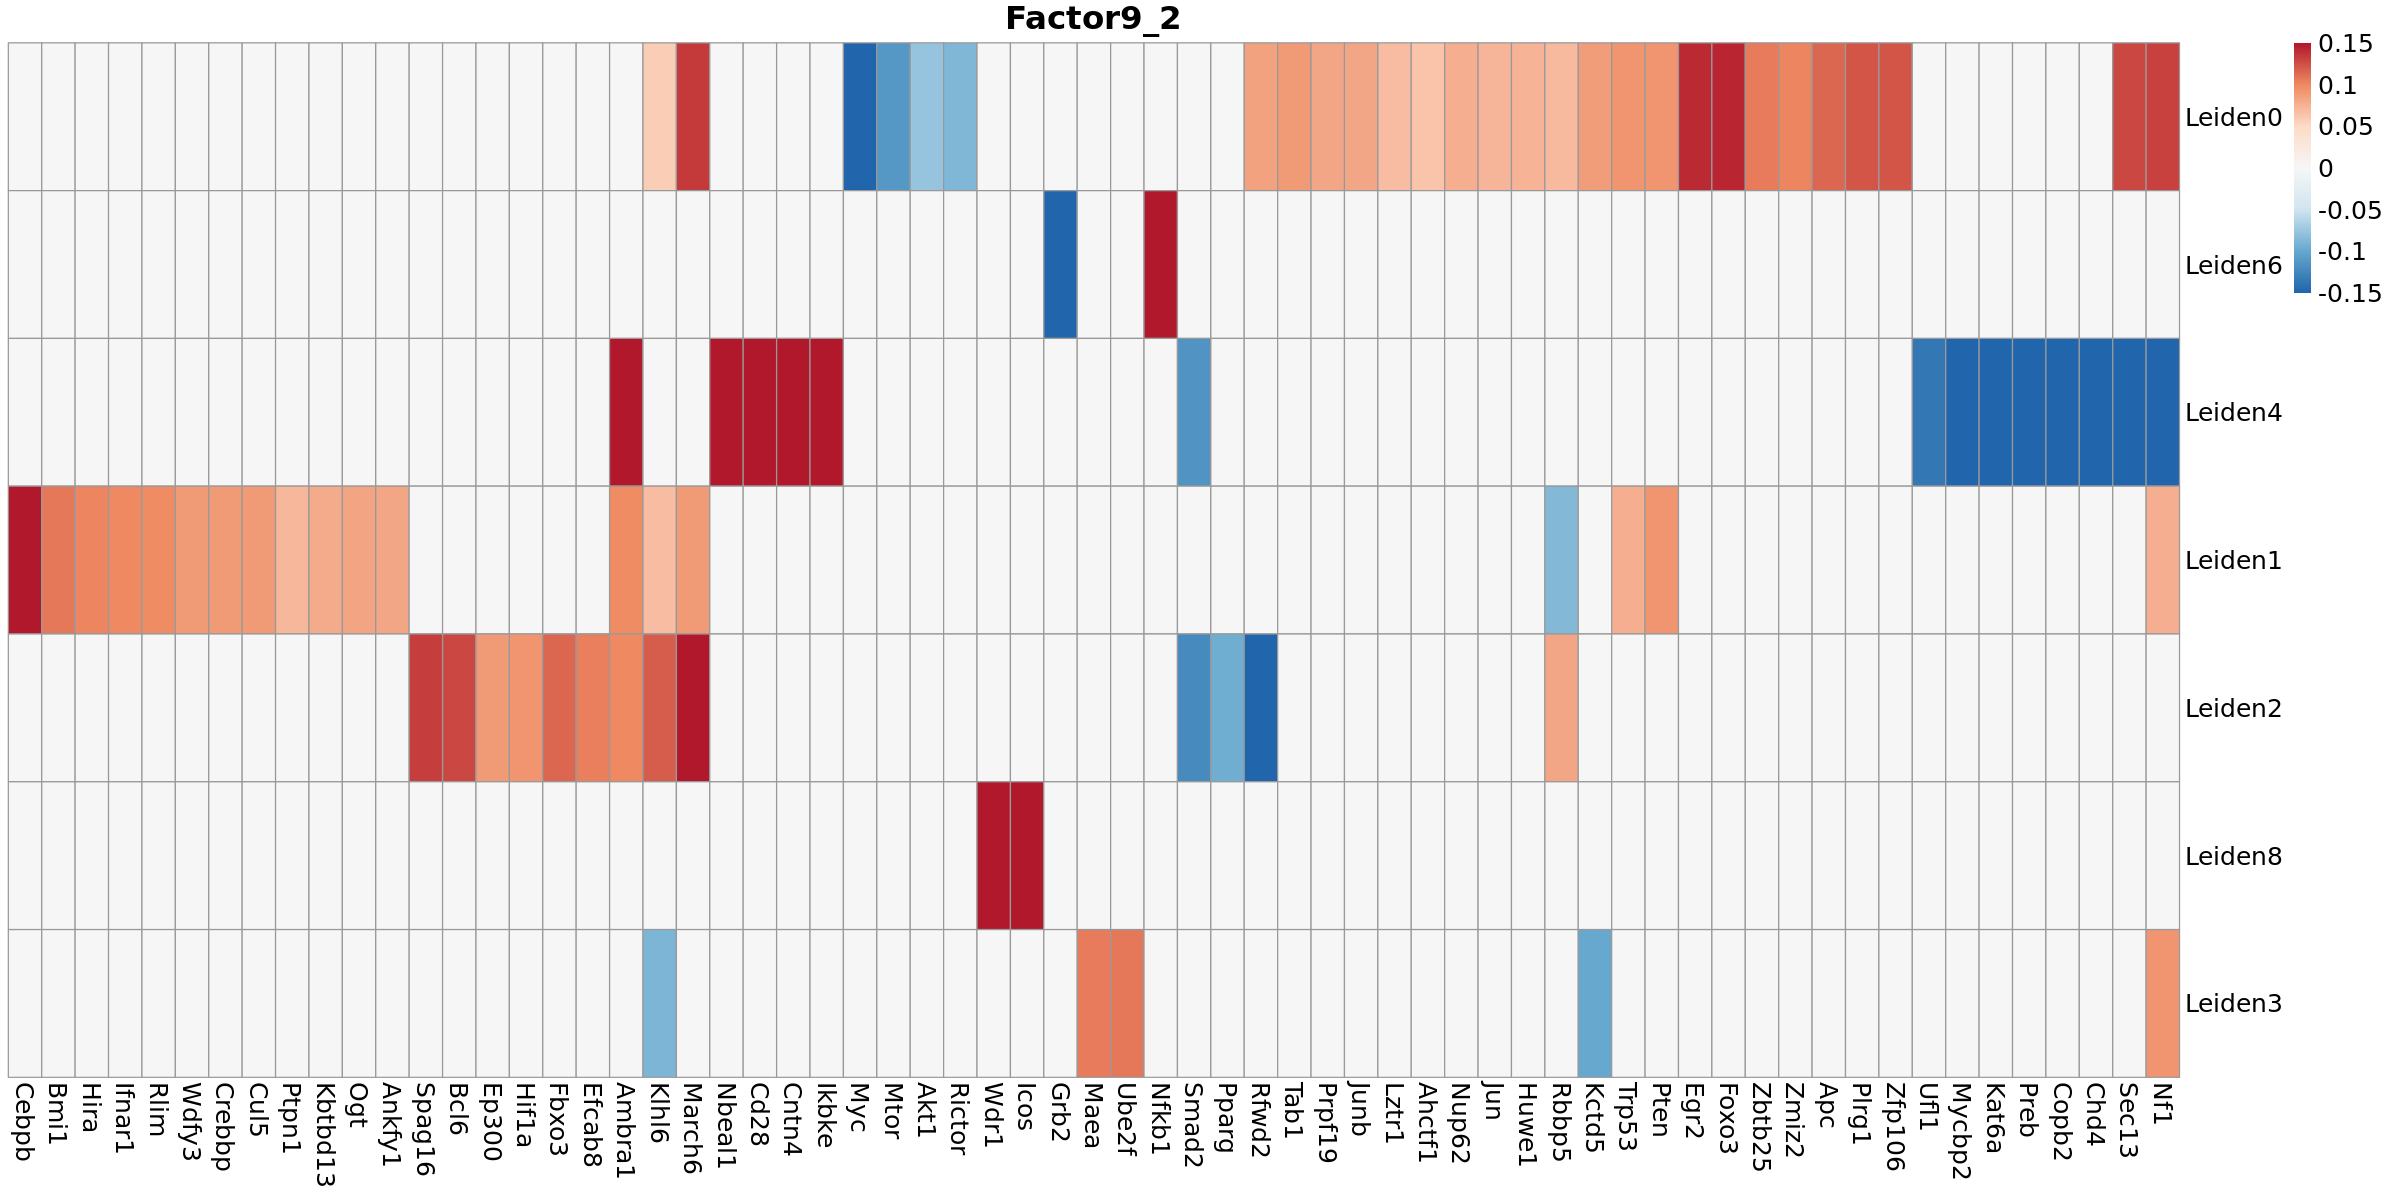

In [15]:
options(repr.plot.width=20, repr.plot.height=10)

sgnInteractionTermsSplitFactor = split(sgnInteractionTerms, f = sgnInteractionTerms$respGeneAn)

for(i in 1:length(sgnInteractionTermsSplitFactor)){
    clusterElem = sgnInteractionTermsSplitFactor[[i]]
    
      
    if(length(unique(clusterElem$GeneName)) > 4){

        myDat = data.frame(matrix(0, ncol=length(unique(clusterElem$GeneName)),
                          nrow=length(unique(clusterElem$Cluster))),
        stringsAsFactors = FALSE)

        colnames(myDat) = unique(clusterElem$GeneName)
        rownames(myDat) = unique(clusterElem$Cluster)

        for(j in 1:nrow(clusterElem)){
            myDat[clusterElem[j, "Cluster"],clusterElem[j, "GeneName"]] = clusterElem[j, "estimate"]

        }

        myDat[myDat > 0.15] = 0.15
        myDat[myDat < -0.15] = -0.15

        tryCatch(
            expr = {
                   pheatmap(myDat, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(200),
                     clustering_method = "ward.D", cluster_rows=FALSE,treeheight_col = 0, treeheight_row = 0,fontsize = 15,
                    main=paste0(names(sgnInteractionTermsSplitFactor)[[i]]))
            },
            error = function(e){ 
                print(e)
            },
            finally = {
                # (Optional)
                # Do this at the end before quitting the tryCatch structure...
            }
        ) 

    }

    
 


}